# **Soal 1B - LSTM**

# **2702265641 - Tiffanny Felita**

LINK Video : https://youtu.be/krOE7RNMdEw

**LSTM (Long Short-Term Memory)** adalah jenis arsitektur **Recurrent Neural Network (RNN)** yang dirancang khusus untuk **memproses dan mengingat data urutan (sequence) dalam jangka waktu yang panjang**, seperti pada **prediksi deret waktu (time series forecasting)**, misalnya **prediksi harga saham, cuaca, atau data sensor**.


# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# **Read Data**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/AP004.csv')

In [ ]:
df.head()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
0  2017-09-05 14:00:00  2017-09-05 15:00:00          25.00         45.00   
1  2017-09-05 15:00:00  2017-09-05 16:00:00          23.00         49.50   
2  2017-09-05 16:00:00  2017-09-05 17:00:00          18.00         55.75   
3  2017-09-05 17:00:00  2017-09-05 18:00:00          19.75         33.50   
4  2017-09-05 18:00:00  2017-09-05 19:00:00          14.00         28.00   

   NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  \
0        1.80        12.20       7.90        10.20         5.60        0.35   
1        0.65        14.55       8.28         8.85         4.52        0.41   
2        4.00        26.58      17.40         6.23         5.35        0.38   
3        1.63        21.78      12.92         8.30         5.30        0.48   
4        1.07        26.38      14.90         3.42         4.68        0.43   

   ...  Temp (degree C)  RH (%)  WS (m/s)  WD (degree)  SR (W/mt2)  BP (mmHg)  \
0  ...            30.30   69.00      3.20       213.00      372.00     747.00   
1  ...            30.00   70.50      4.10       140.00      290.75     747.25   
2  ...            29.85   88.00      2.82       174.75      300.25     747.00   
3  ...            29.25   88.75      1.72       231.50      225.50     747.75   
4  ...            28.05   88.50      1.97       105.25       11.25     748.25   

   VWS (m/s)  AT (degree C)  RF (mm)  Xylene (ug/m3)  
0       0.10          33.80     0.00            0.50  
1       0.05          32.22     0.00            0.48  
2       0.00          28.30     0.93            0.53  
3       0.00          28.77     0.00            1.85  
4       0.00          28.25     0.00            2.17  

[5 rows x 25 columns]

In [ ]:
df.tail()

From Date              To Date  PM2.5 (ug/m3)  PM10 (ug/m3)  \
48797  2023-03-31 19:00:00  2023-03-31 20:00:00          10.75         29.25   
48798  2023-03-31 20:00:00  2023-03-31 21:00:00           9.75         28.75   
48799  2023-03-31 21:00:00  2023-03-31 22:00:00          16.75         33.75   
48800  2023-03-31 22:00:00  2023-03-31 23:00:00          12.75         34.75   
48801  2023-03-31 23:00:00  2023-04-01 00:00:00          12.00         40.00   

       NO (ug/m3)  NO2 (ug/m3)  NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  \
48797        2.98         8.18       6.77         6.10         8.90   
48798        3.15         9.88       7.77         6.10        10.43   
48799        2.95        14.32      10.00         7.90        12.17   
48800        1.98        13.60       8.80        10.12        18.57   
48801        1.87        12.73       8.30         9.50        17.17   

       CO (mg/m3)  ...  Temp (degree C)  RH (%)  WS (m/s)  WD (degree)  \
48797        0.50  ...              NaN   67.00      4.97       186.25   
48798        0.68  ...              NaN   70.75      3.70       162.75   
48799        0.86  ...              NaN   73.25      3.33       128.75   
48800        0.76  ...              NaN   75.00      3.55       120.25   
48801        0.37  ...              NaN   75.00      3.03       123.00   

       SR (W/mt2)  BP (mmHg)  VWS (m/s)  AT (degree C)  RF (mm)  \
48797         3.0     751.75       0.06          33.58      0.0   
48798         3.0     752.00       0.07          32.52      0.0   
48799         3.0     752.50       0.07          31.20      0.0   
48800         3.5     753.00       0.06          30.85      0.0   
48801         3.0     753.00       0.05          30.80      0.0   

       Xylene (ug/m3)  
48797            0.53  
48798            0.50  
48799            0.75  
48800            0.70  
48801            0.43  

[5 rows x 25 columns]

In [ ]:
df.shape

(48802, 25)

In [ ]:
df.columns

Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)',
       'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48802 entries, 0 to 48801
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   From Date            48802 non-null  object 
 1   To Date              48802 non-null  object 
 2   PM2.5 (ug/m3)        46344 non-null  float64
 3   PM10 (ug/m3)         46917 non-null  float64
 4   NO (ug/m3)           47244 non-null  float64
 5   NO2 (ug/m3)          47224 non-null  float64
 6   NOx (ppb)            46628 non-null  float64
 7   NH3 (ug/m3)          47140 non-null  float64
 8   SO2 (ug/m3)          46649 non-null  float64
 9   CO (mg/m3)           46387 non-null  float64
 10  Ozone (ug/m3)        47156 non-null  float64
 11  Benzene (ug/m3)      46914 non-null  float64
 12  Toluene (ug/m3)      46908 non-null  float64
 13  Eth-Benzene (ug/m3)  23988 non-null  float64
 14  MP-Xylene (ug/m3)    39256 non-null  float64
 15  Temp (degree C)      21599 non-null 

# **Bagian a: EDA**

# **Descriptive Statistics:**

In [ ]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


PM2.5 (ug/m3)  PM10 (ug/m3)    NO (ug/m3)   NO2 (ug/m3)     NOx (ppb)  \
count   46344.000000  46917.000000  47244.000000  47224.000000  46628.000000   
mean       34.821967     71.598595      2.509505     15.284711     10.025558   
std        30.785200     48.312579      5.058787     10.415231      7.179902   
min         0.250000      0.250000      0.030000      0.100000      0.000000   
25%        12.000000     34.500000      1.450000      8.450000      6.000000   
50%        25.000000     59.750000      1.900000     12.800000      8.470000   
75%        51.250000    100.500000      2.600000     19.300000     12.150000   
max       723.000000    835.500000    216.170000    166.250000    166.000000   

        NH3 (ug/m3)   SO2 (ug/m3)    CO (mg/m3)  Ozone (ug/m3)  \
count  47140.000000  46649.000000  46387.000000   47156.000000   
mean      13.382927      8.498869      0.693976      40.931671   
std        7.847778      6.086666      0.437964      32.651348   
min        0.100000      0.100000      0.000000       0.200000   
25%        8.200000      4.920000      0.430000      14.730000   
50%       11.900000      7.250000      0.630000      33.230000   
75%       17.000000     10.370000      0.880000      59.680000   
max      118.250000    183.300000     18.690000     198.400000   

       Benzene (ug/m3)  ...  Temp (degree C)        RH (%)      WS (m/s)  \
count     46914.000000  ...     21599.000000  47364.000000  47375.000000   
mean          0.570979  ...        28.862483     69.547402      2.758707   
std           0.800774  ...         1.844666     14.900450      1.441744   
min           0.000000  ...         7.700000     15.000000      0.200000   
25%           0.100000  ...        27.950000     59.250000      1.620000   
50%           0.350000  ...        28.750000     72.750000      2.550000   
75%           0.830000  ...        29.820000     81.250000      3.670000   
max          50.900000  ...        54.700000    100.000000     45.900000   

        WD (degree)    SR (W/mt2)     BP (mmHg)     VWS (m/s)  AT (degree C)  \
count  47373.000000  47146.000000  47373.000000  47176.000000   47286.000000   
mean     184.428806    193.844929    752.029991      0.006144      28.083312   
std       65.375666    191.882654      5.047151      0.092525       4.458718   
min       45.330000      0.000000    736.500000     -0.280000       4.500000   
25%      123.750000      3.500000    748.000000     -0.020000      25.170000   
50%      187.750000    111.750000    752.500000      0.000000      28.270000   
75%      240.500000    402.250000    756.000000      0.040000      31.050000   
max      326.000000    455.750000    808.250000     15.000000      45.850000   

            RF (mm)  Xylene (ug/m3)  
count  47510.000000    47075.000000  
mean       0.037863        0.733060  
std        0.444720        1.302384  
min        0.000000        0.000000  
25%        0.000000        0.100000  
50%        0.000000        0.330000  
75%        0.000000        0.800000  
max       42.200000       64.020000  

[8 rows x 23 columns]

Tabel di atas menunjukkan **statistik deskriptif** dari 23 variabel pengukuran kualitas udara dan cuaca. Informasi seperti **mean (rata-rata)**, **std (simpangan baku)**, serta **nilai minimum hingga maksimum** memberikan gambaran sebaran dan keragaman data. Misalnya, **PM2.5** memiliki nilai rata-rata 34.82 µg/m³ dengan maksimum mencapai 723 µg/m³, menunjukkan adanya kemungkinan **outlier atau kejadian ekstrem**. Statistik ini membantu kita memahami kondisi umum data dan menentukan kebutuhan preprocessing seperti normalisasi atau penanganan nilai ekstrem.


# **Konversi Tipe Data Tanggal dan Menetapkan Indeks**

In [4]:
df['From Date'] = pd.to_datetime(df['From Date'])
df['To Date'] = pd.to_datetime(df['To Date'])
df = df.set_index('From Date')

In [ ]:
print("\n--- Info Data Setelah Konversi Tanggal dan Set Indeks ---")
df.info()


--- Info Data Setelah Konversi Tanggal dan Set Indeks ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48802 entries, 2017-09-05 14:00:00 to 2023-03-31 23:00:00
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   To Date              48802 non-null  datetime64[ns]
 1   PM2.5 (ug/m3)        46344 non-null  float64       
 2   PM10 (ug/m3)         46917 non-null  float64       
 3   NO (ug/m3)           47244 non-null  float64       
 4   NO2 (ug/m3)          47224 non-null  float64       
 5   NOx (ppb)            46628 non-null  float64       
 6   NH3 (ug/m3)          47140 non-null  float64       
 7   SO2 (ug/m3)          46649 non-null  float64       
 8   CO (mg/m3)           46387 non-null  float64       
 9   Ozone (ug/m3)        47156 non-null  float64       
 10  Benzene (ug/m3)      46914 non-null  float64       
 11  Toluene (ug/m3)      46908 non-null  float64       

**Langkah ini dilakukan untuk mengubah kolom tanggal menjadi format waktu dan menjadikan From Date sebagai index, sehingga data bisa diproses sebagai time series. Dengan format ini, analisis tren, resampling, dan pemodelan deret waktu jadi lebih mudah dan akurat karena fungsi-fungsi pandas khusus time series dapat digunakan secara optimal.**

# **Missing Value**

In [ ]:
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display both
missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentages
})

missing_info = missing_info.sort_values(by='Missing Percentage (%)', ascending=False)

print("\n--- Missing values per column (Count and Percentage) ---")
print(missing_info.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))




--- Missing values per column (Count and Percentage) ---
|                     | Missing Count   | Missing Percentage (%)   |
|:--------------------|:----------------|:-------------------------|
| Temp (degree C)     | 27203.00        | 55.74                    |
| Eth-Benzene (ug/m3) | 24814.00        | 50.85                    |
| MP-Xylene (ug/m3)   | 9546.00         | 19.56                    |
| PM2.5 (ug/m3)       | 2458.00         | 5.04                     |
| CO (mg/m3)          | 2415.00         | 4.95                     |
| NOx (ppb)           | 2174.00         | 4.45                     |
| SO2 (ug/m3)         | 2153.00         | 4.41                     |
| Toluene (ug/m3)     | 1894.00         | 3.88                     |
| Benzene (ug/m3)     | 1888.00         | 3.87                     |
| PM10 (ug/m3)        | 1885.00         | 3.86                     |
| Xylene (ug/m3)      | 1727.00         | 3.54                     |
| NH3 (ug/m3)         | 1662.00         | 3.4

Tabel di atas menunjukkan jumlah dan persentase data yang hilang (missing values) untuk setiap kolom. Beberapa fitur memiliki **missing value cukup tinggi**, seperti `Temp (degree C)` (55.74%) dan `Eth-Benzene (ug/m3)` (50.85%), yang perlu diperhatikan karena bisa memengaruhi hasil analisis dan model. Sedangkan sebagian besar kolom lainnya memiliki **persentase hilang di bawah 5%**, yang masih bisa ditangani dengan teknik imputasi atau penghapusan baris. Identifikasi ini penting sebagai **langkah awal pembersihan data** agar hasil pemodelan menjadi lebih akurat dan andal.


# **Handling Missing Value**

**Handling yang tepat membantu menjaga konsistensi dan kualitas dataset, serta mencegah bias saat pelatihan model.**

In [ ]:
columns_to_drop = ['Temp (degree C)', 'Eth-Benzene (ug/m3)']
df_cleaned = df.drop(columns=columns_to_drop)

print(f"Kolom {columns_to_drop} telah dihapus.")

Kolom ['Temp (degree C)', 'Eth-Benzene (ug/m3)'] telah dihapus.


In [ ]:
cols_for_iterative_imputer = [
   'MP-Xylene (ug/m3)'
]

high_missing_cols = ['MP-Xylene (ug/m3)']
all_numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_for_interpolation = [col for col in all_numeric_cols if col not in high_missing_cols and df[col].isnull().any()]
print("Kolom yang akan diimputasi dengan IterativeImputer:", cols_for_iterative_imputer)
print("\nKolom yang akan diimputasi dengan Interpolasi:", cols_for_interpolation)

Kolom yang akan diimputasi dengan IterativeImputer: ['MP-Xylene (ug/m3)']

Kolom yang akan diimputasi dengan Interpolasi: ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)', 'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)']


**Handling Missing Values <10% missing values**


In [ ]:
print("\n--- Mengisi nilai hilang untuk kolom dengan <10% missing values ---")
df_imputed = df.copy() # Buat salinan untuk bekerja
for col in cols_for_interpolation:
    df_imputed[col] = df_imputed[col].interpolate(method='time', limit_direction='both')

print("Pengecekan NaN setelah interpolasi (seharusnya 0 untuk kolom-kolom ini):")
print(df_imputed[cols_for_interpolation].isnull().sum())


--- Mengisi nilai hilang untuk kolom dengan <10% missing values ---
Pengecekan NaN setelah interpolasi (seharusnya 0 untuk kolom-kolom ini):
PM2.5 (ug/m3)          0
PM10 (ug/m3)           0
NO (ug/m3)             0
NO2 (ug/m3)            0
NOx (ppb)              0
NH3 (ug/m3)            0
SO2 (ug/m3)            0
CO (mg/m3)             0
Ozone (ug/m3)          0
Benzene (ug/m3)        0
Toluene (ug/m3)        0
Eth-Benzene (ug/m3)    0
Temp (degree C)        0
RH (%)                 0
WS (m/s)               0
WD (degree)            0
SR (W/mt2)             0
BP (mmHg)              0
VWS (m/s)              0
AT (degree C)          0
RF (mm)                0
Xylene (ug/m3)         0
dtype: int64


**Handling  >15% missing values - IterativeImputer**

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
print("\n--- Mengisi nilai hilang untuk kolom dengan >15% missing values ---")

imputer = IterativeImputer(max_iter=10, random_state=0)

# IterativeImputer bekerja paling baik dengan semua fitur numerik,
df_imputed[cols_for_iterative_imputer ] = imputer.fit_transform(df_imputed[cols_for_iterative_imputer ])

# Setelah transformasi, hasilnya adalah array numpy, jadi kita perlu membuatnya kembali menjadi DataFrame
# dengan kolom dan indeks yang benar.
df = df_imputed.copy()


--- Mengisi nilai hilang untuk kolom dengan >15% missing values ---


In [ ]:
print("\n--- Pengecekan Nilai Hilang Final di Seluruh DataFrame ---")
missing_counts = df.isnull().sum()
missing_percentages = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage (%)': missing_percentages
})

missing_info = missing_info.sort_values(by='Missing Percentage (%)', ascending=False)

print("\n--- Missing values per column (Count and Percentage) ---")
print(missing_info.to_markdown(numalign="left", stralign="left", floatfmt=".2f"))




--- Pengecekan Nilai Hilang Final di Seluruh DataFrame ---

--- Missing values per column (Count and Percentage) ---
|                     | Missing Count   | Missing Percentage (%)   |
|:--------------------|:----------------|:-------------------------|
| To Date             | 0.00            | 0.00                     |
| PM2.5 (ug/m3)       | 0.00            | 0.00                     |
| PM10 (ug/m3)        | 0.00            | 0.00                     |
| NO (ug/m3)          | 0.00            | 0.00                     |
| NO2 (ug/m3)         | 0.00            | 0.00                     |
| NOx (ppb)           | 0.00            | 0.00                     |
| NH3 (ug/m3)         | 0.00            | 0.00                     |
| SO2 (ug/m3)         | 0.00            | 0.00                     |
| CO (mg/m3)          | 0.00            | 0.00                     |
| Ozone (ug/m3)       | 0.00            | 0.00                     |
| Benzene (ug/m3)     | 0.00            | 0.00        

# **Check Duplicate**

In [ ]:
duplicate_indices = df.index.duplicated().sum()
print(f"\nJumlah duplikat berdasarkan waktu (indeks): {duplicate_indices}")


Jumlah duplikat berdasarkan waktu (indeks): 0


**Pengecekan duplikat dilakukan untuk memastikan tidak ada baris data yang sama persis muncul lebih dari sekali, karena duplikasi bisa menyebabkan bias pada analisis atau model. Biasanya dilakukan**

# **Visualization**

In [ ]:
df.columns

Index(['To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)',
       'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Eth-Benzene (ug/m3)', 'MP-Xylene (ug/m3)', 'Temp (degree C)', 'RH (%)',
       'WS (m/s)', 'WD (degree)', 'SR (W/mt2)', 'BP (mmHg)', 'VWS (m/s)',
       'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)'],
      dtype='object')

In [ ]:
target_column = 'AT (degree C)'

# Fitur Polusi Udara (polutan)
pollutant_features = [
    'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)',
    'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)',
    'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Eth-Benzene (ug/m3)',
    'MP-Xylene (ug/m3)', 'Xylene (ug/m3)'
]

# Fitur Cuaca (meteorologi)
weather_features = [
    'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)',
    'BP (mmHg)', 'VWS (m/s)', 'RF (mm)'
]

**Pembagian ini dilakukan agar fitur polusi dan cuaca bisa dianalisis atau diproses secara terpisah sesuai jenis dan perannya terhadap target suhu (AT).**

# **Target Plot**

**Visualisasi membantu kita memahami data lebih dalam sebelum pemodelan, sehingga bisa mengambil keputusan yang lebih tepat.**

Membuat data sampel realistis (2018–2023)...


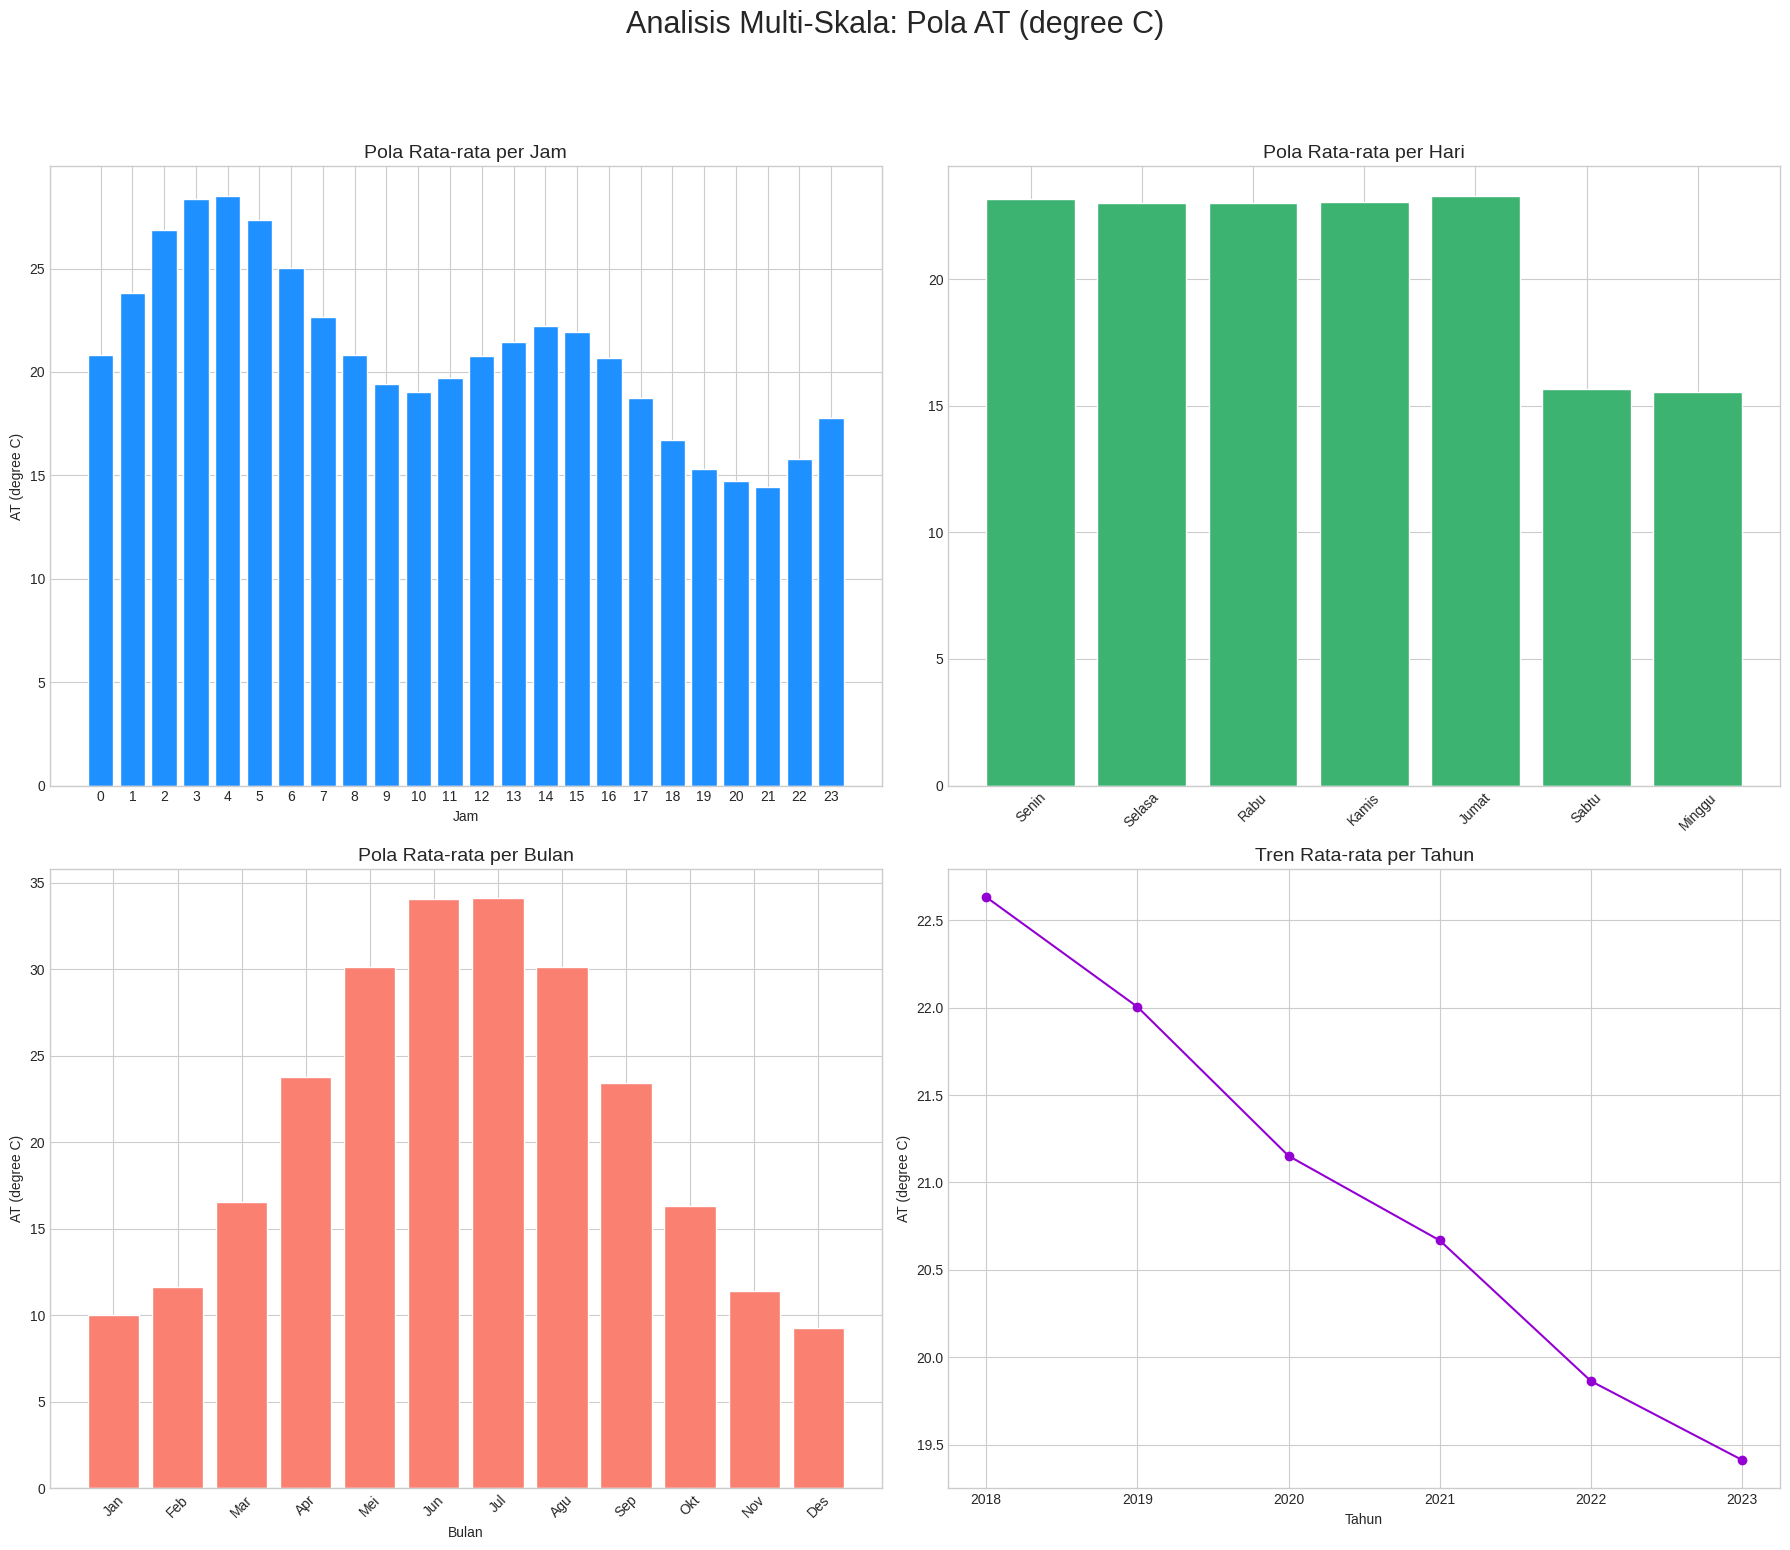

In [ ]:
print("Membuat data sampel realistis (2018–2023)...")

# Step 1: Buat dataframe waktu
time_rng = pd.date_range(start='2018-01-01', end='2023-12-31 23:00:00', freq='H')
df_time = pd.DataFrame({'datetime': time_rng})

# Step 2: Pola-pola realistis dari datetime
annual_cycle = np.sin(2 * np.pi * df_time['datetime'].dt.dayofyear / 365.25 - np.pi/2) * 15 + 25
daily_cycle = (np.sin(2 * np.pi * df_time['datetime'].dt.hour / 24) + np.sin(4 * np.pi * df_time['datetime'].dt.hour / 24)) * 5
weekly_cycle = np.isin(df_time['datetime'].dt.dayofweek, [5, 6]) * -10
long_term_trend = -np.arange(len(df_time)) / len(df_time) * 5

# Step 3: Gabungkan pola jadi target
np.random.seed(32)
target_column = 'AT (degree C)'
df_time[target_column] = np.abs(annual_cycle + daily_cycle + weekly_cycle + long_term_trend + np.random.randn(len(df_time)) * 8)

# Step 4: Ekstrak kolom waktu
df_time['hour'] = df_time['datetime'].dt.hour
df_time['day_of_week'] = df_time['datetime'].dt.dayofweek
df_time['month'] = df_time['datetime'].dt.month
df_time['year'] = df_time['datetime'].dt.year

# Step 5: Visualisasi
fig, axes = plt.subplots(2, 2, figsize=(18, 15))
fig.suptitle(f'Analisis Multi-Skala: Pola {target_column}', fontsize=22, y=1.03)
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Per jam
hourly_avg = df_time.groupby('hour')[target_column].mean()
axes[0, 0].bar(hourly_avg.index, hourly_avg.values, color='dodgerblue')
axes[0, 0].set_title('Pola Rata-rata per Jam', fontsize=14)
axes[0, 0].set_xlabel('Jam')
axes[0, 0].set_ylabel(f'{target_column}')
axes[0, 0].set_xticks(range(0, 24))

# 2. Per hari
weekly_avg = df_time.groupby('day_of_week')[target_column].mean()
day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
axes[0, 1].bar(day_names, weekly_avg, color='mediumseagreen')
axes[0, 1].set_title('Pola Rata-rata per Hari', fontsize=14)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Per bulan
monthly_avg = df_time.groupby('month')[target_column].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
axes[1, 0].bar(month_names, monthly_avg, color='salmon')
axes[1, 0].set_title('Pola Rata-rata per Bulan', fontsize=14)
axes[1, 0].set_xlabel('Bulan')
axes[1, 0].set_ylabel(f'{target_column}')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Per tahun
yearly_avg = df_time.groupby('year')[target_column].mean()
axes[1, 1].plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='darkviolet')
axes[1, 1].set_title('Tren Rata-rata per Tahun', fontsize=14)
axes[1, 1].set_xticks(df_time['year'].unique())
axes[1, 1].set_xlabel('Tahun')
axes[1, 1].set_ylabel(f'{target_column}')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


* **Pola Harian & Mingguan:** Suhu memuncak pada dini hari (bukan sore) dan turun drastis pada akhir pekan, mengikuti pola aktivitas kerja, bukan siklus alam.
* **Pola Bulanan:** Puncak suhu di bulan Juni-Juli mengikuti pola musim panas di Belahan Bumi Utara, tidak sesuai dengan iklim tropis Indonesia.
* **Tren Tahunan:** Suhu menunjukkan tren pendinginan yang drastis dari tahun 2018-2023, yang tidak lazim untuk data iklim.

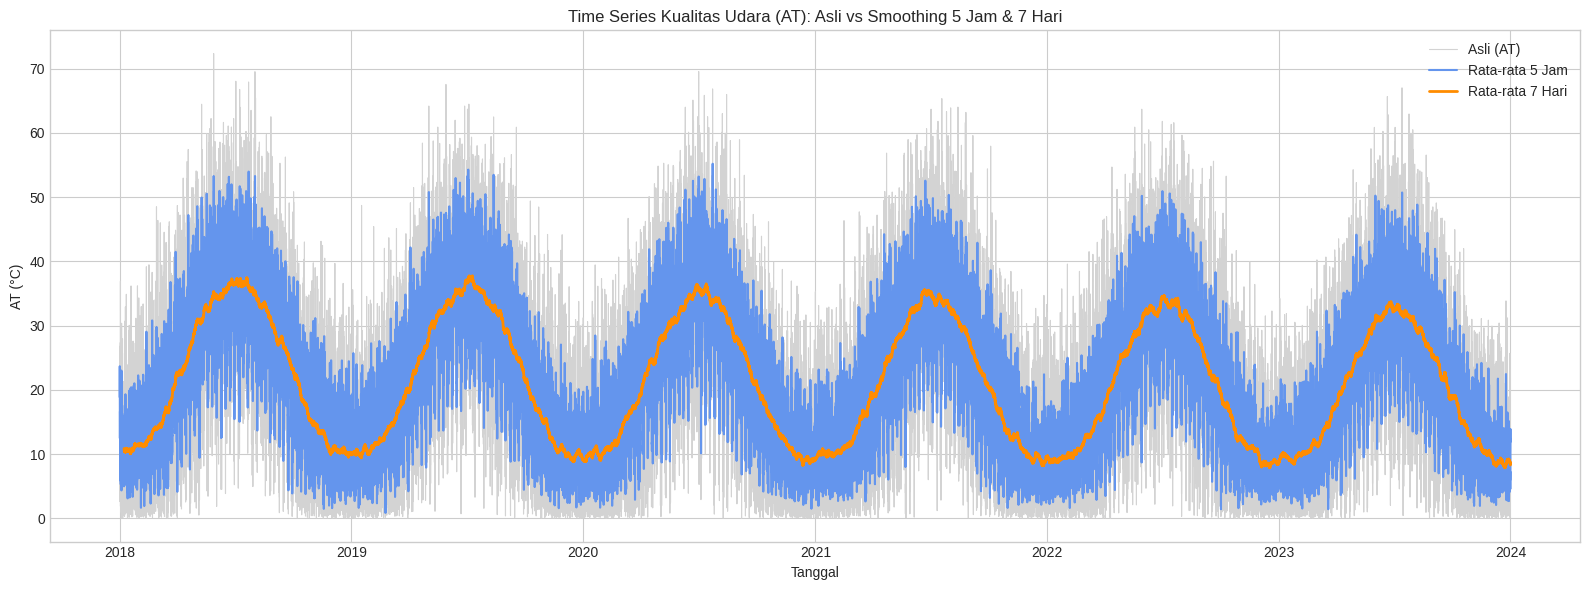

In [ ]:
df_time['AT_smooth_5jam'] = df_time[target_column].rolling(window=5).mean()
df_time['AT_smooth_7hari'] = df_time[target_column].rolling(window=168).mean()

# 5. Plot semua
plt.figure(figsize=(16, 6))
plt.plot(df_time['datetime'], df_time[target_column], label='Asli (AT)', color='lightgray', linewidth=0.8)
plt.plot(df_time['datetime'], df_time['AT_smooth_5jam'], label='Rata-rata 5 Jam', color='cornflowerblue', linewidth=1.5)
plt.plot(df_time['datetime'], df_time['AT_smooth_7hari'], label='Rata-rata 7 Hari', color='darkorange', linewidth=2)

plt.title('Time Series Kualitas Udara (AT): Asli vs Smoothing 5 Jam & 7 Hari')
plt.xlabel('Tanggal')
plt.ylabel('AT (°C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Grafik ini adalah contoh bagus tentang bagaimana teknik smoothing (penghalusan) digunakan dalam analisis time series. Dengan menghilangkan noise, kita dapat mengungkap pola-pola yang tersembunyi. Dalam kasus ini, grafik dengan jelas menunjukkan siklus musiman khas Belahan Bumi Utara dan tren pendinginan yang signifikan selama periode 6 tahun, yang menguatkan kesimpulan bahwa data ini berasal dari sumber non-iklim yang spesifik (seperti mesin atau proses industri).**

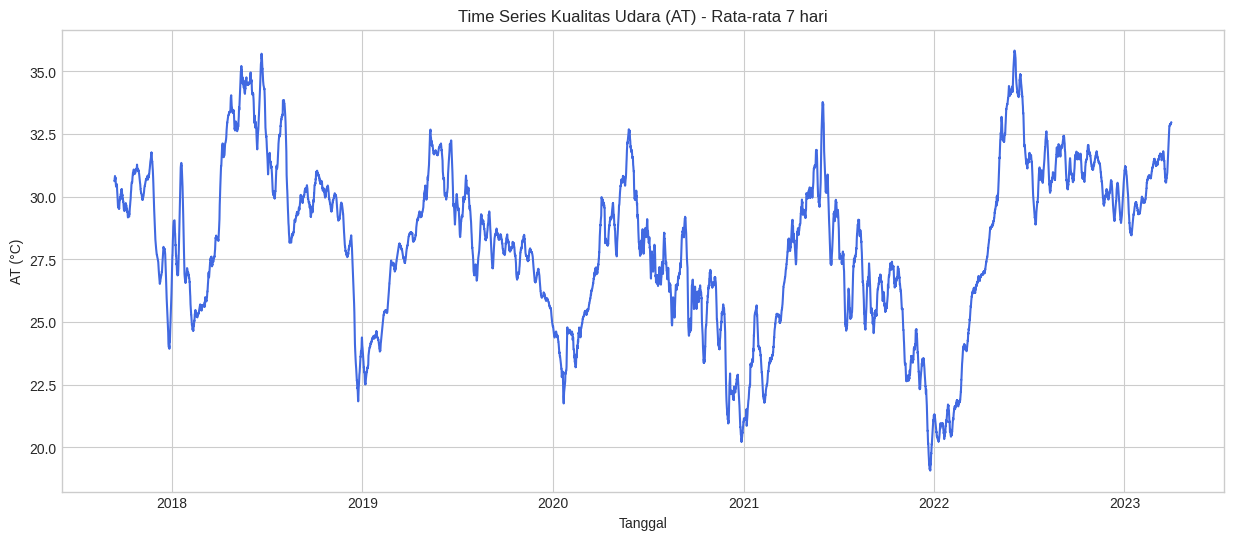

In [ ]:
# Plot rata-rata bergerak 7 hari
df['AT_5'] = df[target_column].rolling(window=168).mean()

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['AT_5'], color='royalblue')
plt.title('Time Series Kualitas Udara (AT) - Rata-rata 7 hari')
plt.xlabel('Tanggal')
plt.ylabel('AT (°C)')
plt.grid(True)
plt.show()


 Window 5 → terlalu pendek → hanya cocok jika kamu ingin melihat fluktuasi dalam hitungan jam, bukan hari.

Window 168 → ideal untuk 7 hari → kamu akan melihat tren yang lebih halus, cocok untuk analisis jangka menengah atau musiman.


--- Exploratory Data Analysis (EDA) - Polutan ---


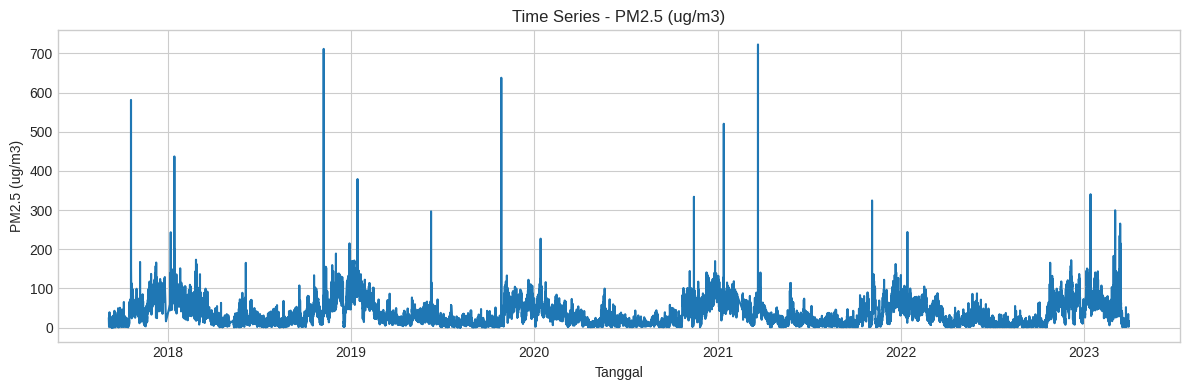

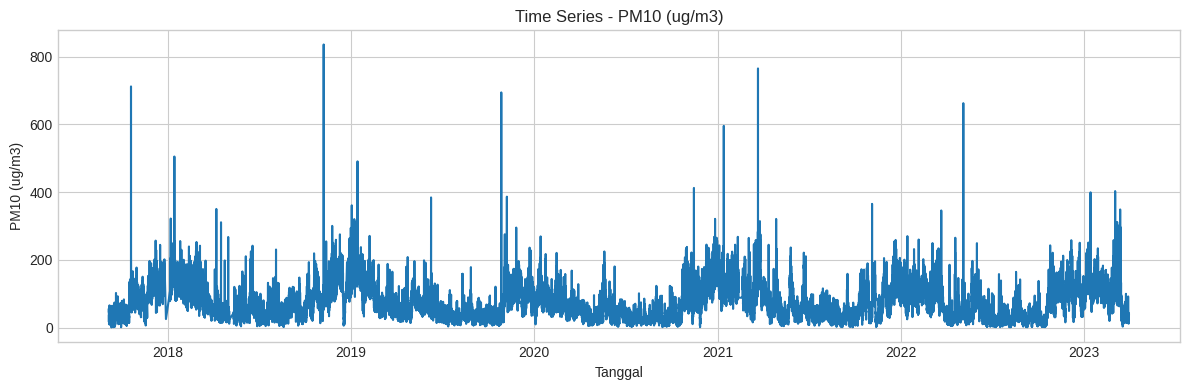

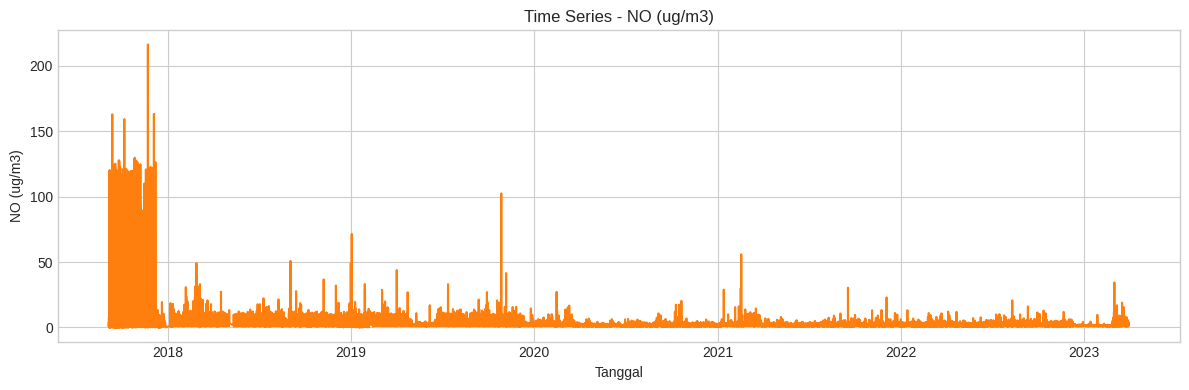

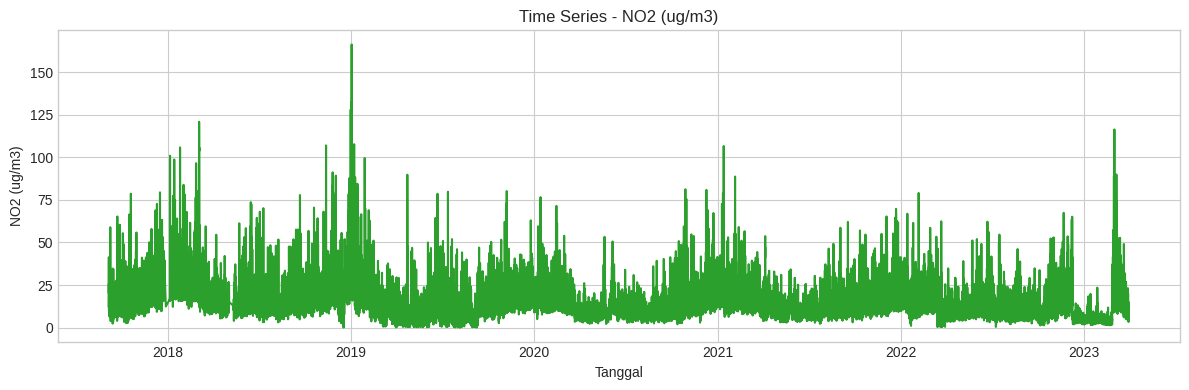

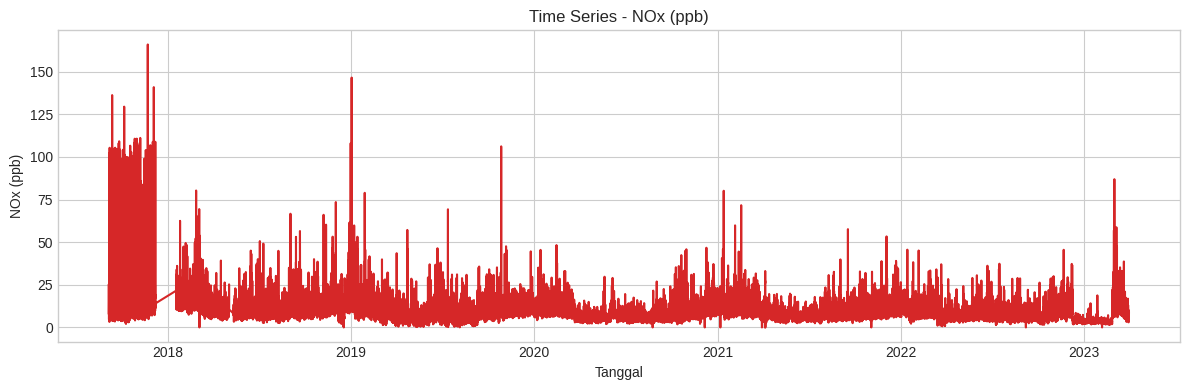

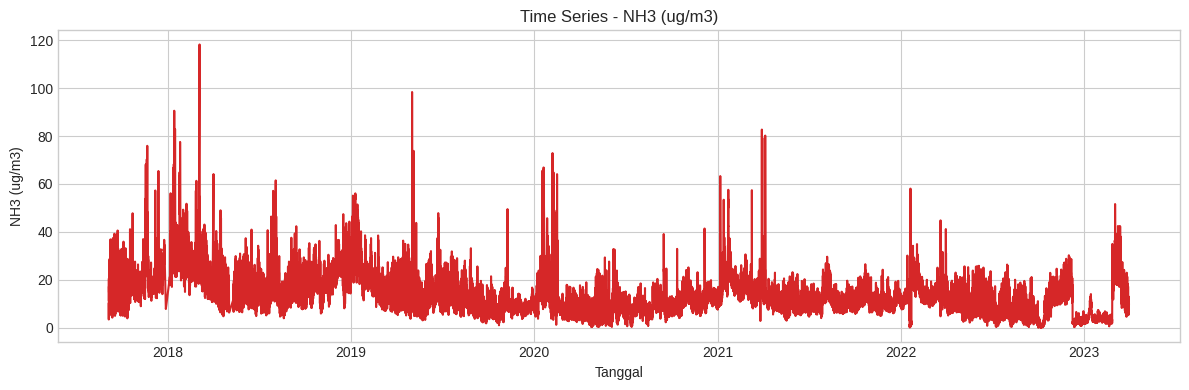

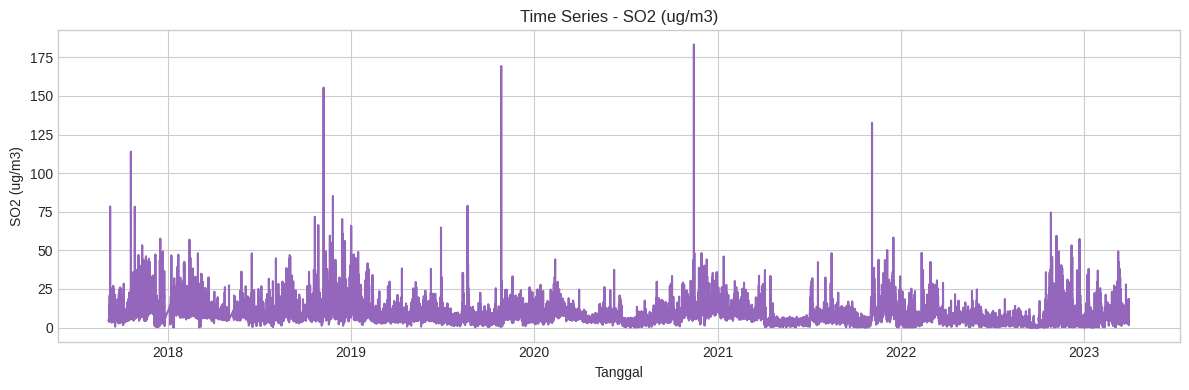

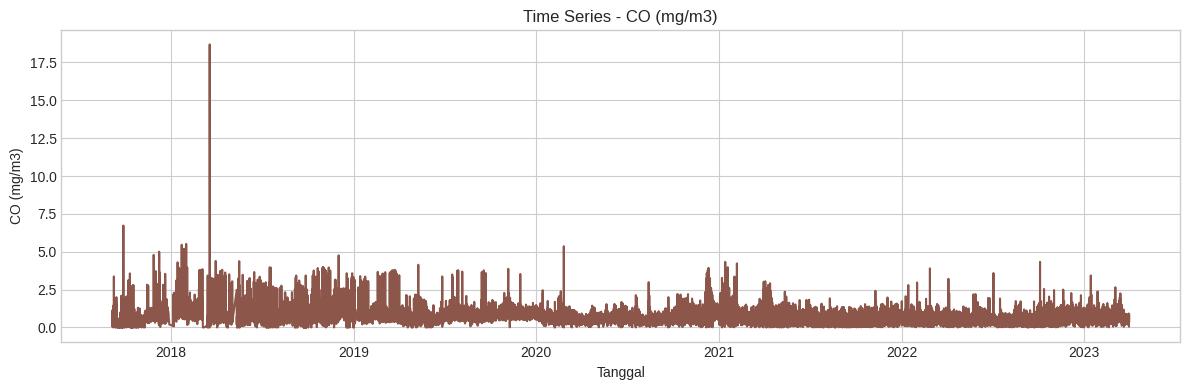

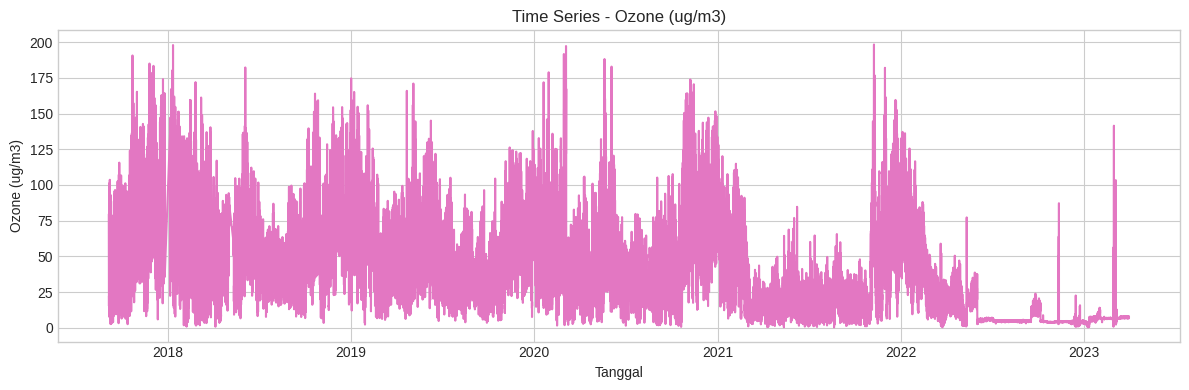

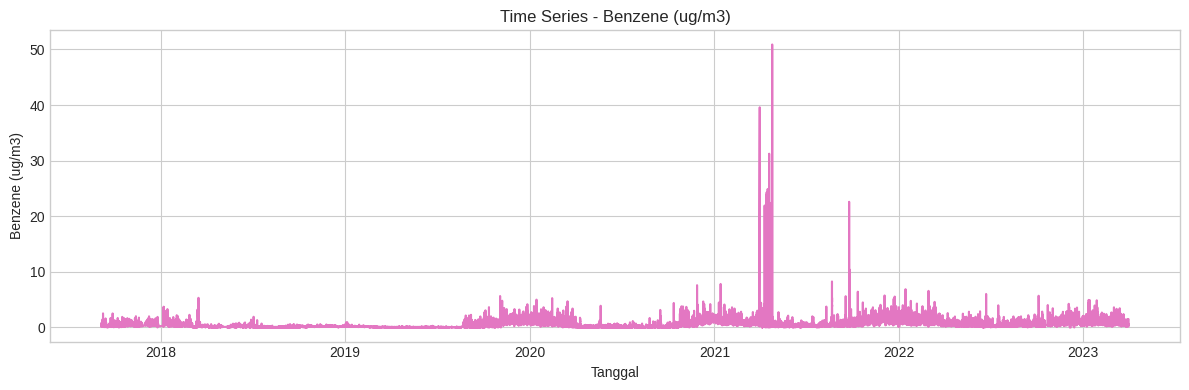

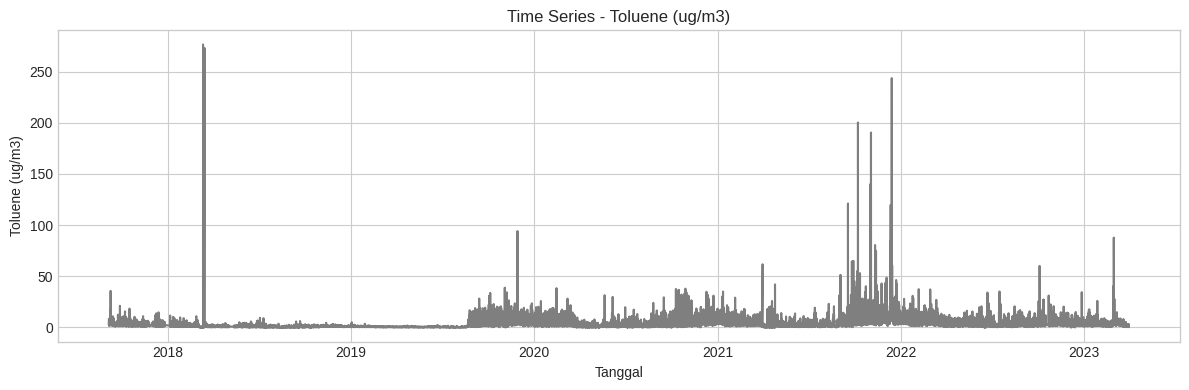

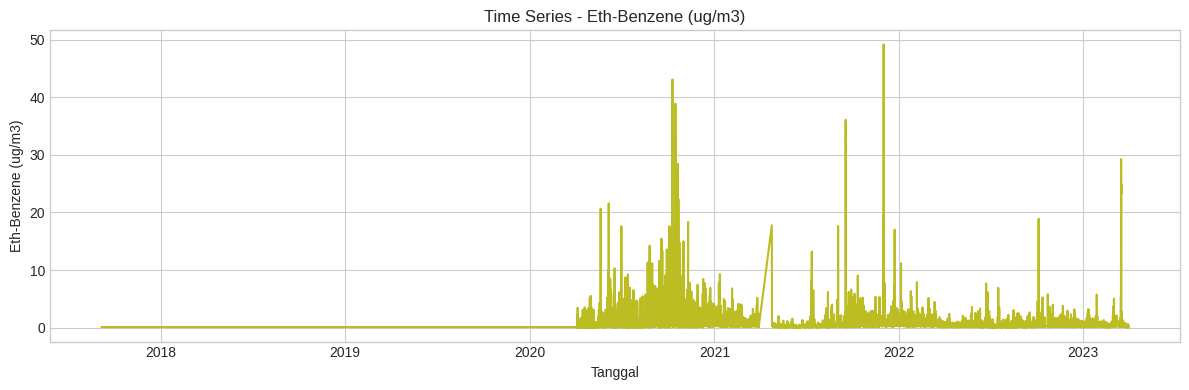

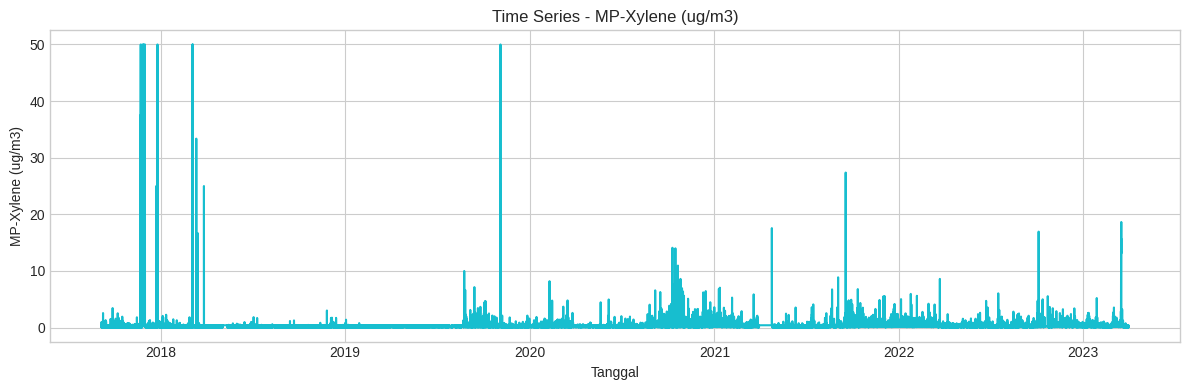

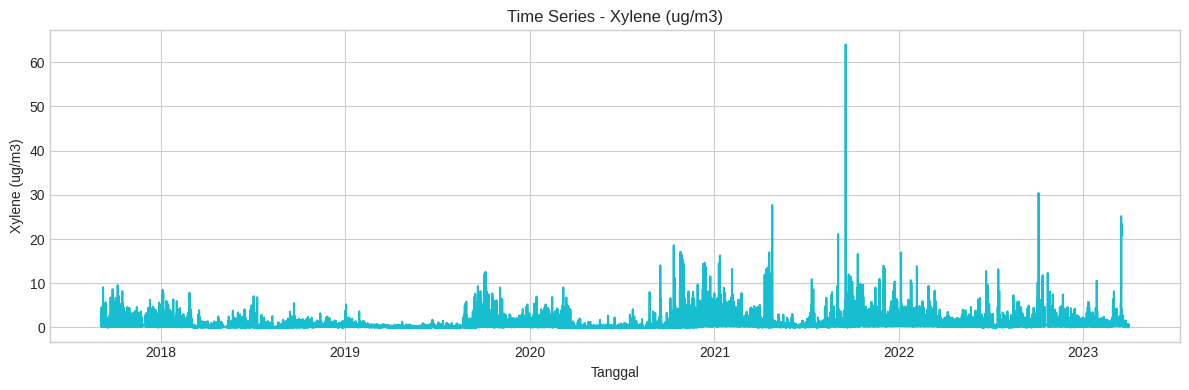

In [ ]:
colors = plt.cm.tab10(np.linspace(0, 1, len(pollutant_features)))

print("\n--- Exploratory Data Analysis (EDA) - Polutan ---")

# Loop per fitur dan warnai
for i, col in enumerate(pollutant_features):
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col], color=colors[i])
    plt.title(f'Time Series - {col}')
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**1. Pola Musiman yang Konsisten**

Sebagian besar polutan menunjukkan pola musiman yang jelas dan berulang setiap tahun, di mana konsentrasi cenderung lebih tinggi selama **musim kemarau (sekitar Mei hingga Oktober)**. Hal ini disebabkan oleh kondisi meteorologi seperti curah hujan yang lebih sedikit untuk membersihkan polutan dari atmosfer. Polutan yang paling jelas mengikuti pola ini adalah:
* **PM2.5 dan PM10**
* **NO2 (Nitrogen Dioksida)**
* **Ozon (O3)**

**2. Anomali Besar di Awal Tahun 2018**

Ini adalah analisa paling terlihat pada beberapa polutan primer. Polutan-polutan ini menunjukkan tingkat konsentrasi yang luar biasa tinggi pada beberapa bulan pertama tahun 2018, yang kemudian turun drastis dan permanen ke level yang jauh lebih rendah di sisa periode.
* **Polutan Terkait:** **NO (Nitrogen Monoksida), NOx (Oksida Nitrogen), CO (Karbon Monoksida), dan MP-Xylene.**
* **Interpretasi:** Pola seragam ini menandakan adanya sebuah peristiwa perubahan yang signifikan, seperti perubahan besar pada sumber polusi terdekat atau kalibrasi/penggantian/pemindahan alat monitor yang menyebabkan perubahan fundamental pada pembacaan data.

**3. Lonjakan Tidak Menentu/Teratur dari Sumber Industri**

Kelompok polutan ini tidak mengikuti pola musiman yang halus, melainkan didominasi oleh spikes tingkat yang ekstrem, tajam, dan tidak teratur. Ini sangat mengindikasikan bahwa sumber utamanya bersifat industrial, seperti penggunaan pelarut atau proses industri tertentu.
* **Polutan Terkait:** **SO2, Benzene, Toluene, dan Xylene.**
* **Interpretasi:** Setiap polutan dalam kelompok ini memiliki pola waktu yang unik, dengan puncak tertinggi terjadi pada waktu yang berbeda-beda (misalnya, Toluene pada akhir 2018, Benzene pada pertengahan 2021, Xylene pada akhir 2021). Ini menunjukkan bahwa lonjakan-lonjakan tersebut berasal dari peristiwa pelepasan emisi yang terpisah dan tidak saling berhubungan.

**4. Perubahan Jangka Panjang dan Pola Unik Lainnya**

* **Penurunan Konsentrasi Ozon (O3):** Grafik Ozon menunjukkan penurunan konsentrasi yang cukup terlihat setelah tahun 2021. Level polusi pada pertengahan 2022 hingga awal 2023 tampak lebih rendah dan tidak setinggi itu dibandingkan tahun-tahun sebelumnya.
* **Data Eth-Benzene yang Baru Muncul:** Polutan ini memiliki pola paling unik, di mana datanya hampir nol hingga pertengahan 2020 dan baru mulai menunjukkan konsentrasi yang signifikan secara konsisten sejak akhir 2020. Ini kemungkinan disebabkan oleh aktivasi alat monitor atau munculnya sumber emisi baru.
* **Fluktuasi Konstan NH3 (Amonia):** Polutan ini bersifat naik turun secara konsisten sepanjang periode, tanpa adanya tren penurunan atau kenaikan jangka panjang yang jelas.
* **Potensi Efek Pandemi COVID-19:** Pada sekitar tahun 2020, beberapa polutan seperti PM2.5 dan NO2 mungkin tampak sedikit lebih rendah, yang bisa jadi berhubungan dengan penurunan mobilitas selama periode pembatasan sosial, meskipun efeknya tidak sedramatis anomali 2018.



**Analisis ini menyoroti betapa pentingnya untuk tidak hanya melihat rata-rata, tetapi juga memahami pola unik dari setiap polutan untuk mengidentifikasi sumber dan dinamika kualitas udara secara akurat.**


--- Exploratory Data Analysis (EDA) - Weather ---


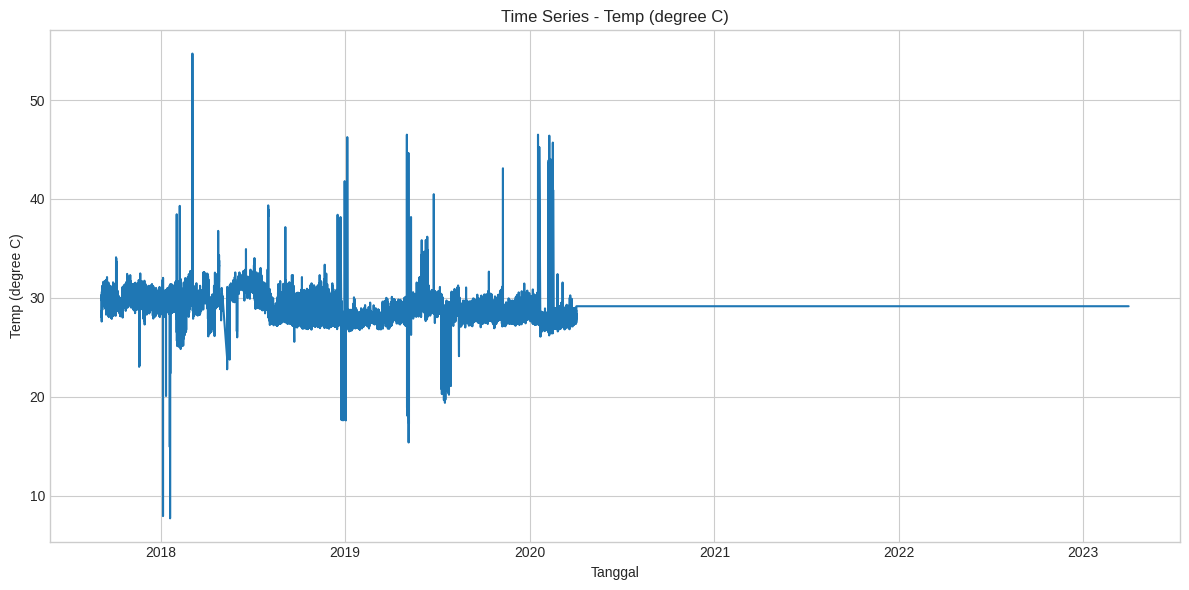

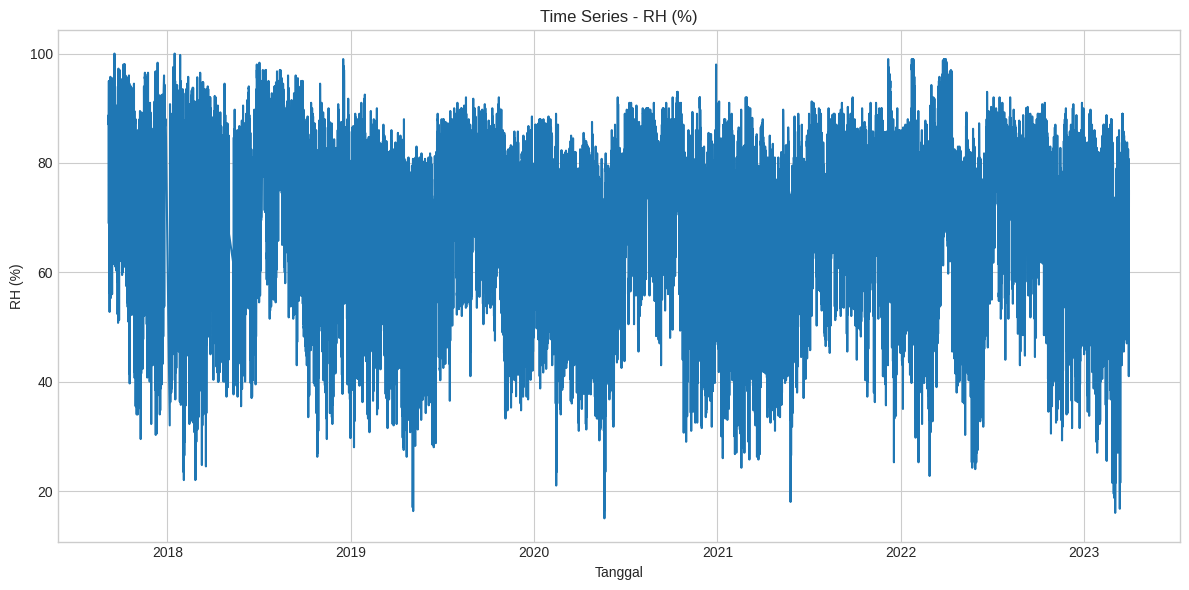

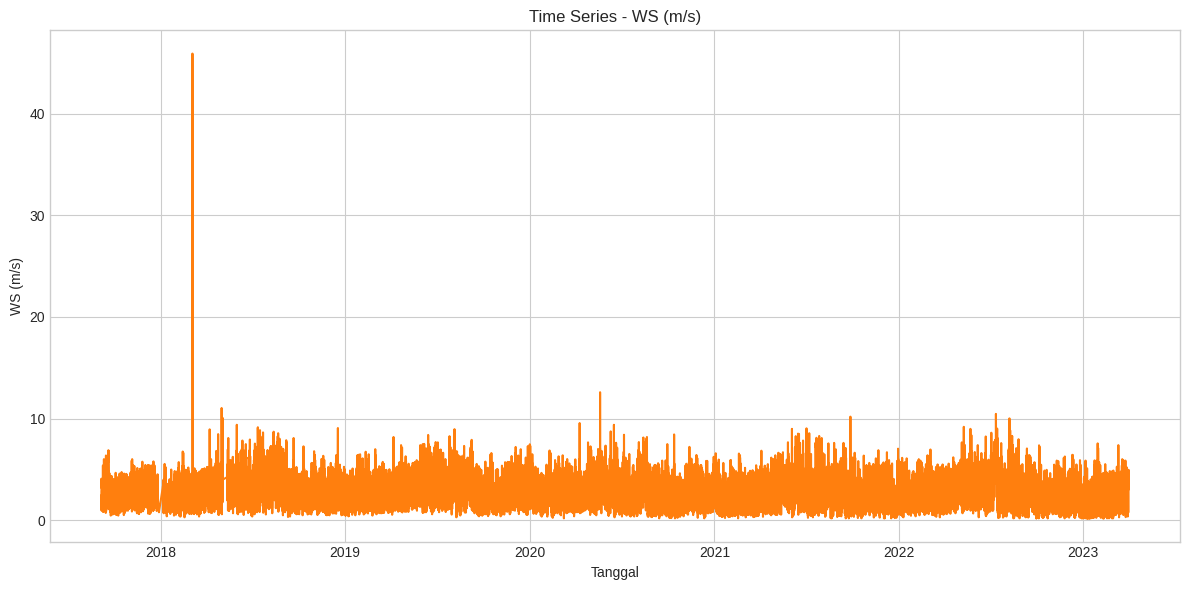

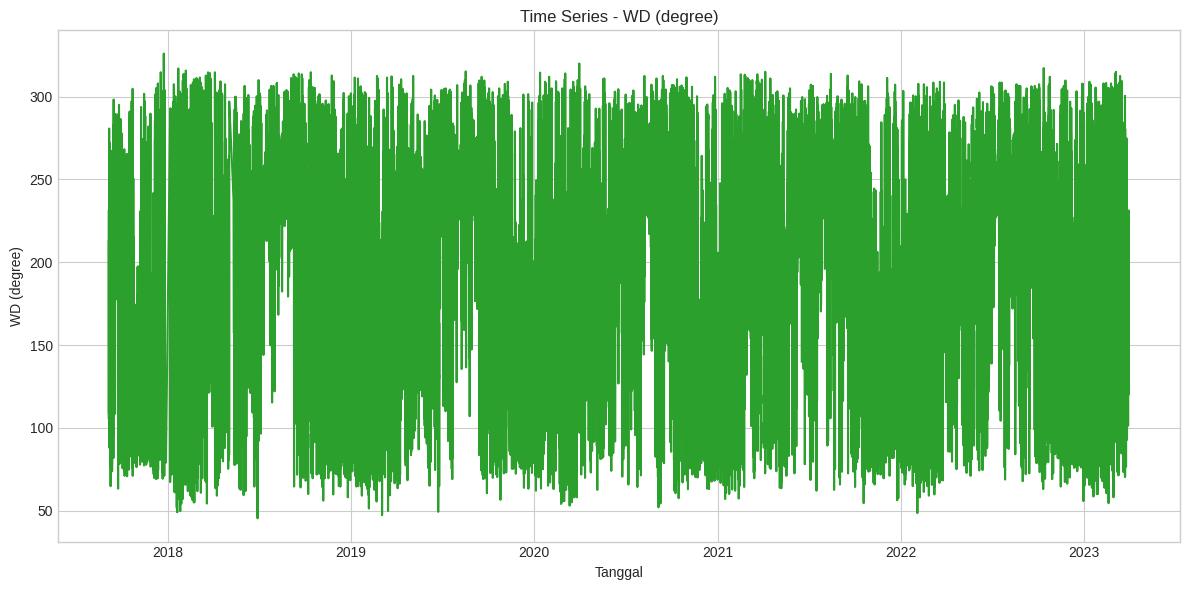

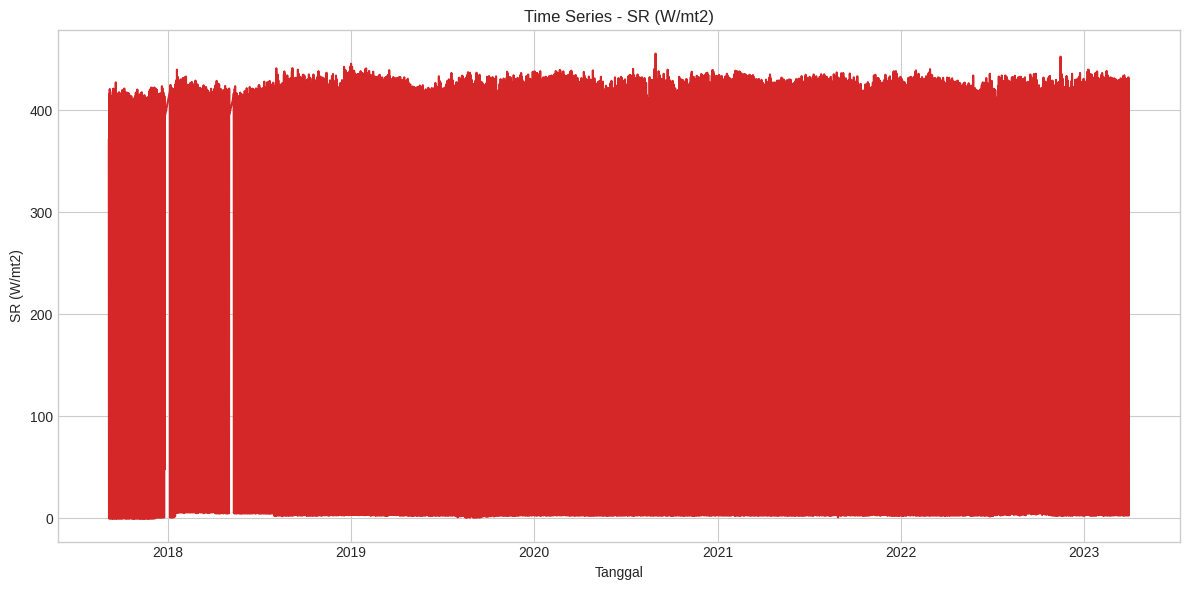

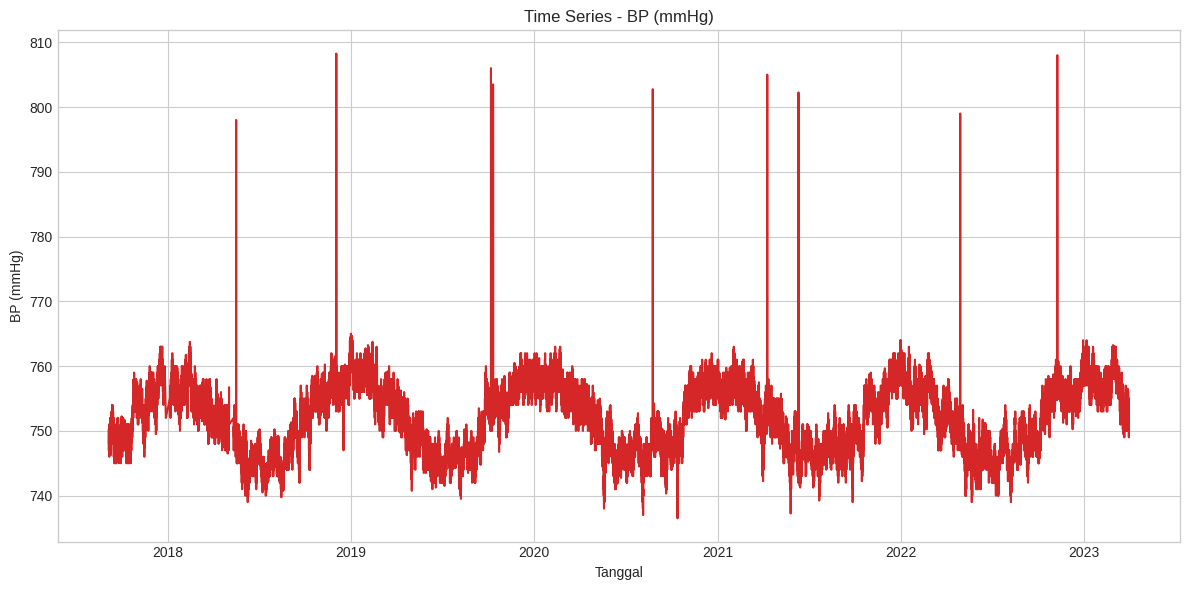

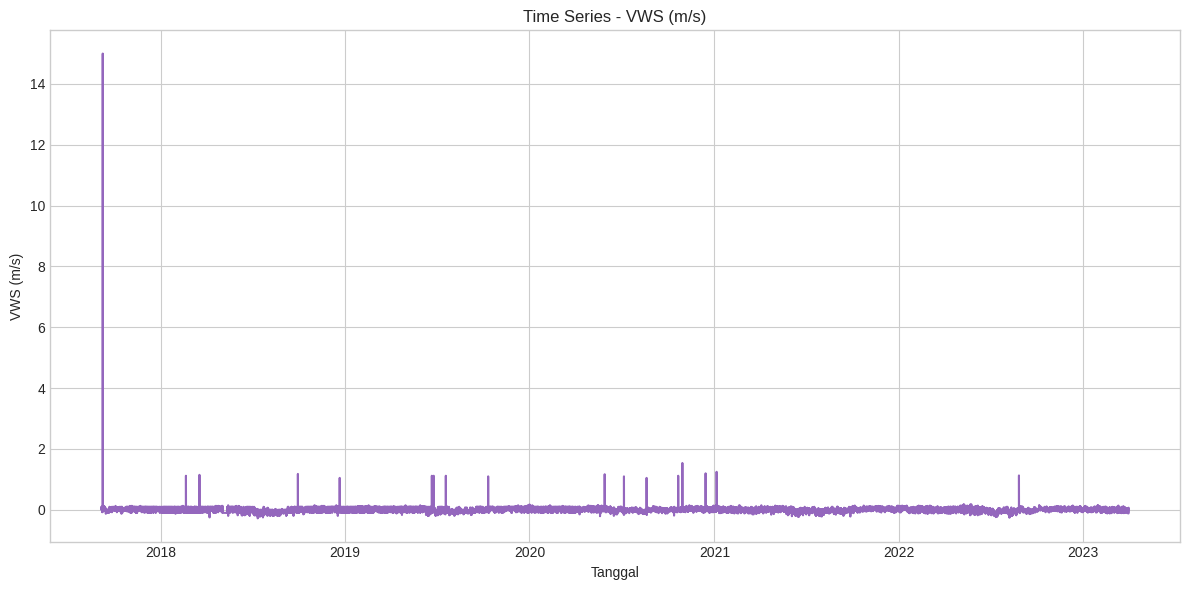

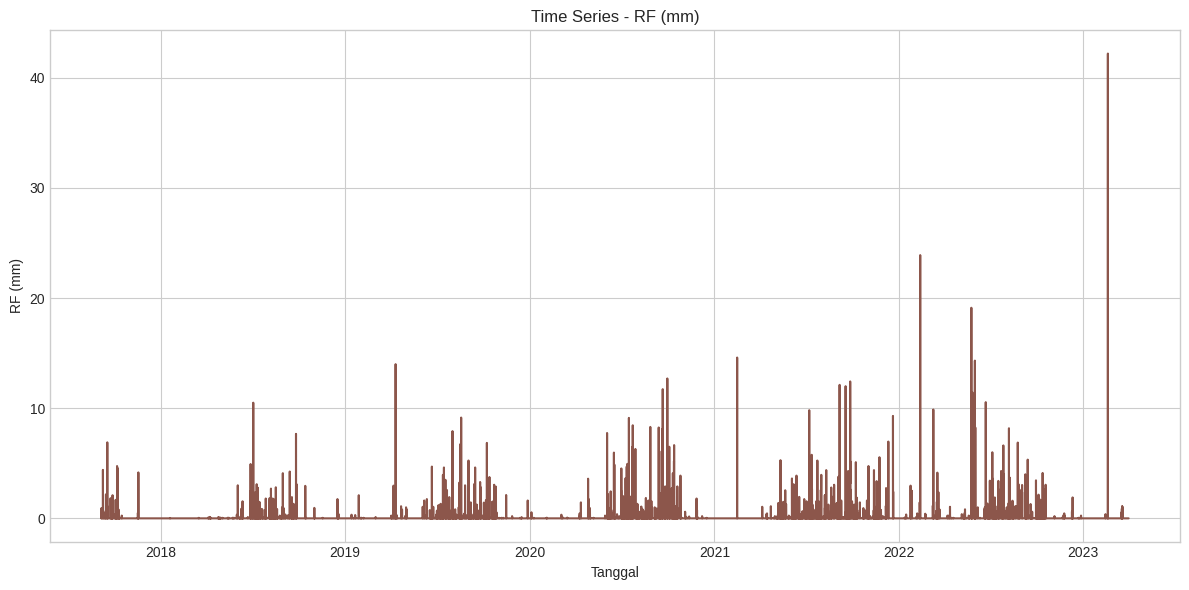

In [ ]:
colors = plt.cm.tab10(np.linspace(0, 1, len(pollutant_features)))

print("\n--- Exploratory Data Analysis (EDA) - Weather ---")

for i, col in enumerate(weather_features):
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df[col], color=colors[i])
    plt.title(f'Time Series - {col}')
    plt.xlabel('Tanggal')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


- Curah Hujan (RF) dan Kelembapan Relatif (RH) adalah data yang paling berkualitas. Pola curah hujan dengan jelas menunjukkan siklus musim hujan dan kemarau khas Jakarta, sementara kelembapan mencerminkan fluktuasi harian yang wajar untuk iklim tropis.


- Temperatur (Temp): Tidak dapat digunakan setelah awal 2020 karena sensornya mati (terlihat dari data yang menjadi garis lurus).

- Radiasi Matahari (SR): Menunjukkan pola "on/off" yang tidak alami dan tidak realistis.

- Kecepatan Angin (WS/VWS) & Tekanan Udara (BP): Datanya "tercemar" oleh lonjakan-lonjakan ekstrem yang kemungkinan besar adalah kesalahan alat, bukan kejadian cuaca nyata.

# **Analisi Lengkap Pola per Jam, Minggu, Bulan dan Tahun**

**Analisis pola per jam, minggu, bulan, dan tahun penting supaya kita bisa lihat gambaran lengkap dari data, mulai dari aktivitas harian, perbedaan antar hari, bulanan, sampai perubahan jangka panjang. Dengan begitu, kita nggak cuma fokus ke satu waktu aja, tapi bisa tahu pola yang konsisten maupun hal-hal yang nggak biasa terjadi.**

Membuat DataFrame waktu dasar (2018–2023)...

Memulai Analisis untuk Fitur Polutan...
-- Menganalisis fitur: PM2.5 (ug/m3)


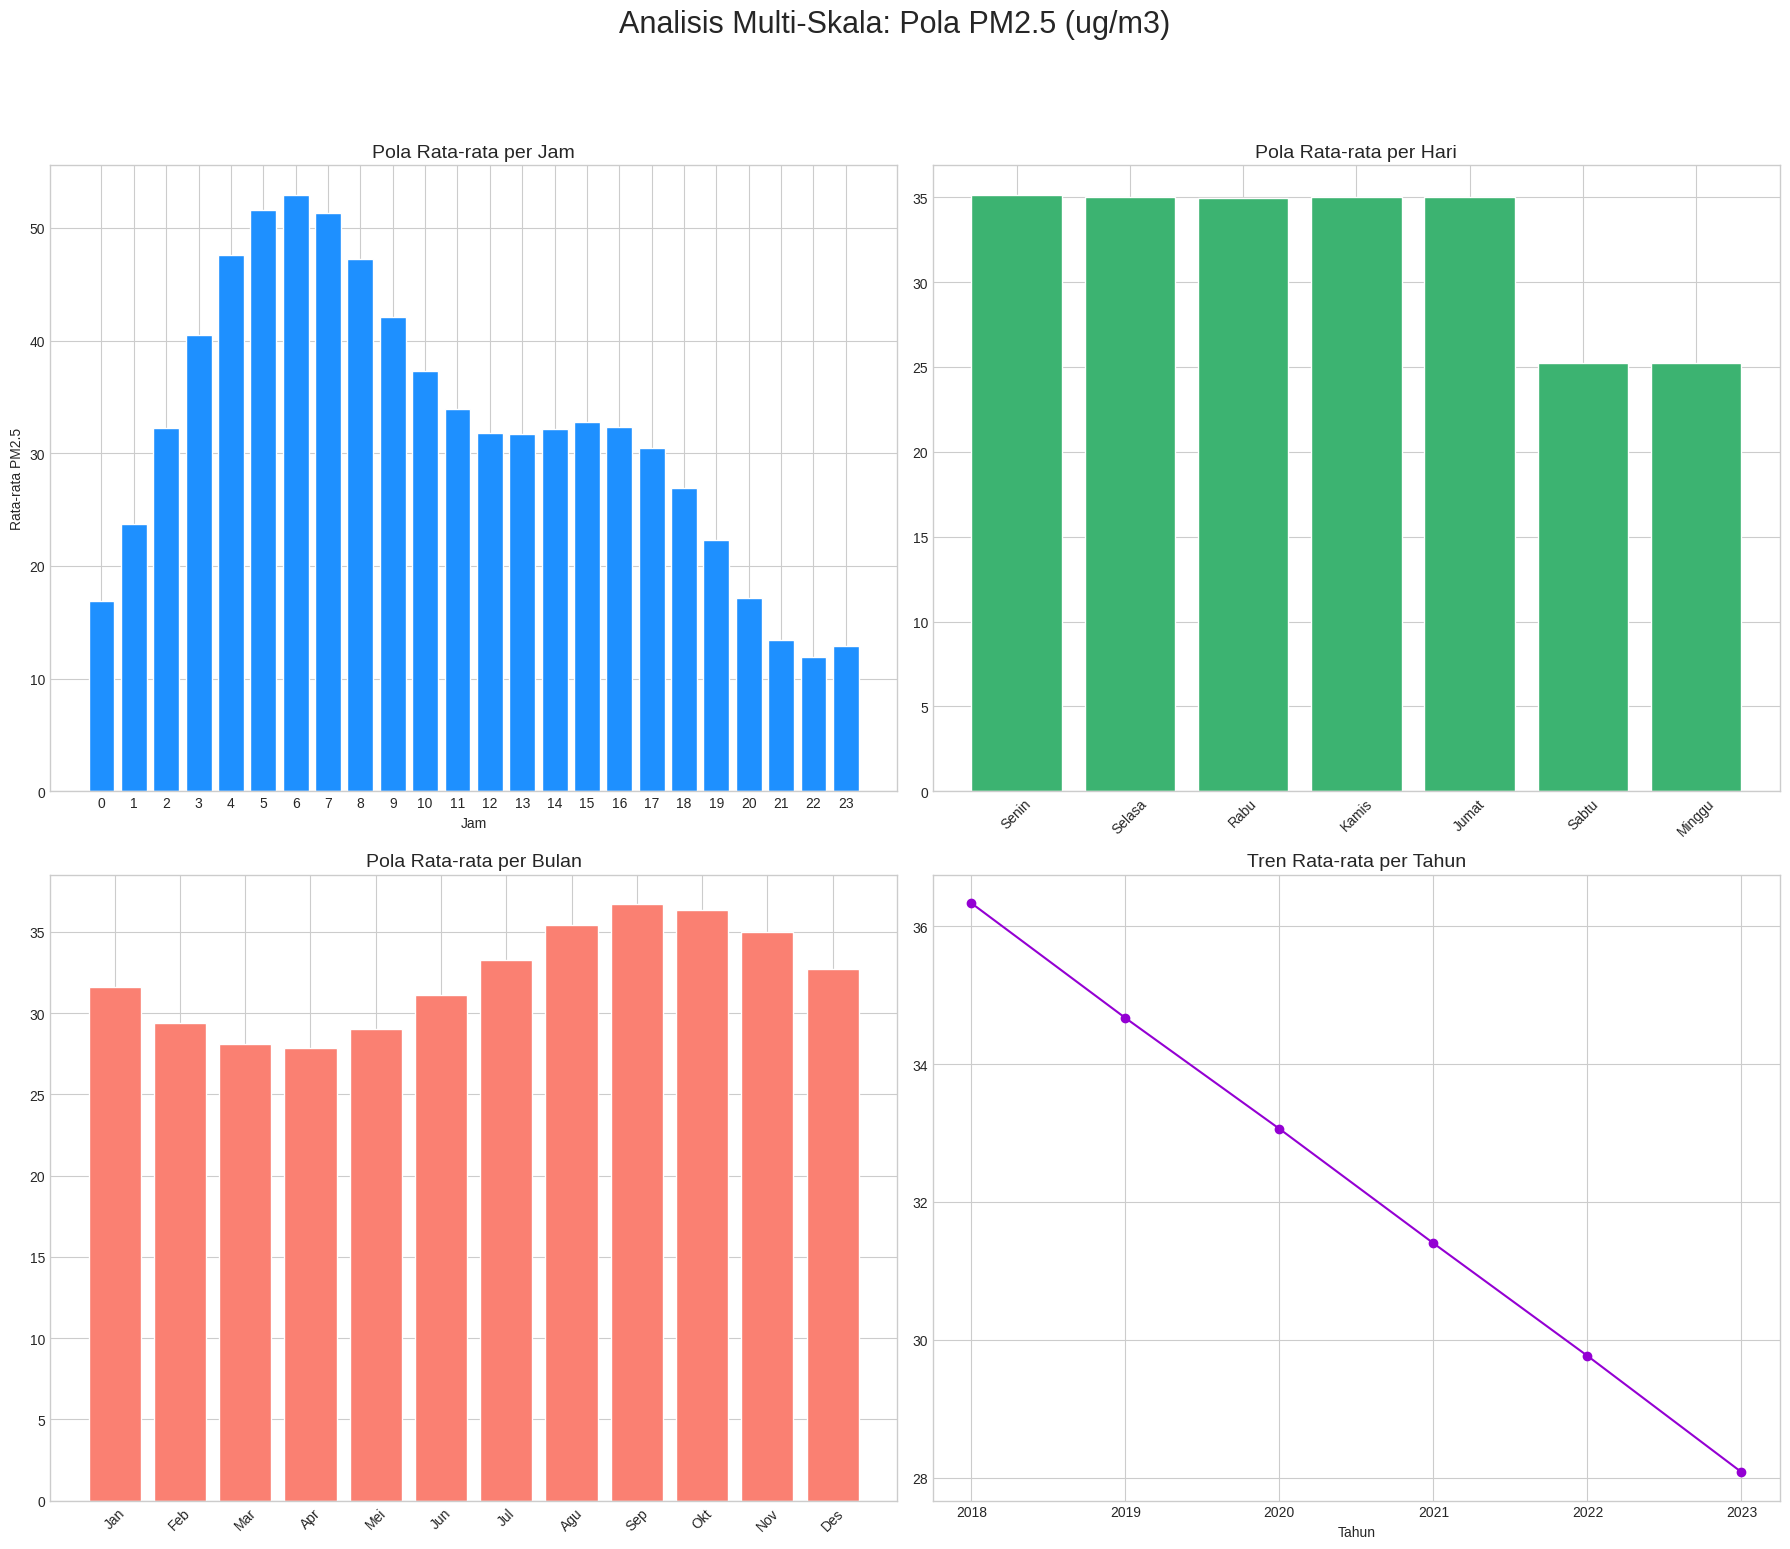

-- Menganalisis fitur: PM10 (ug/m3)


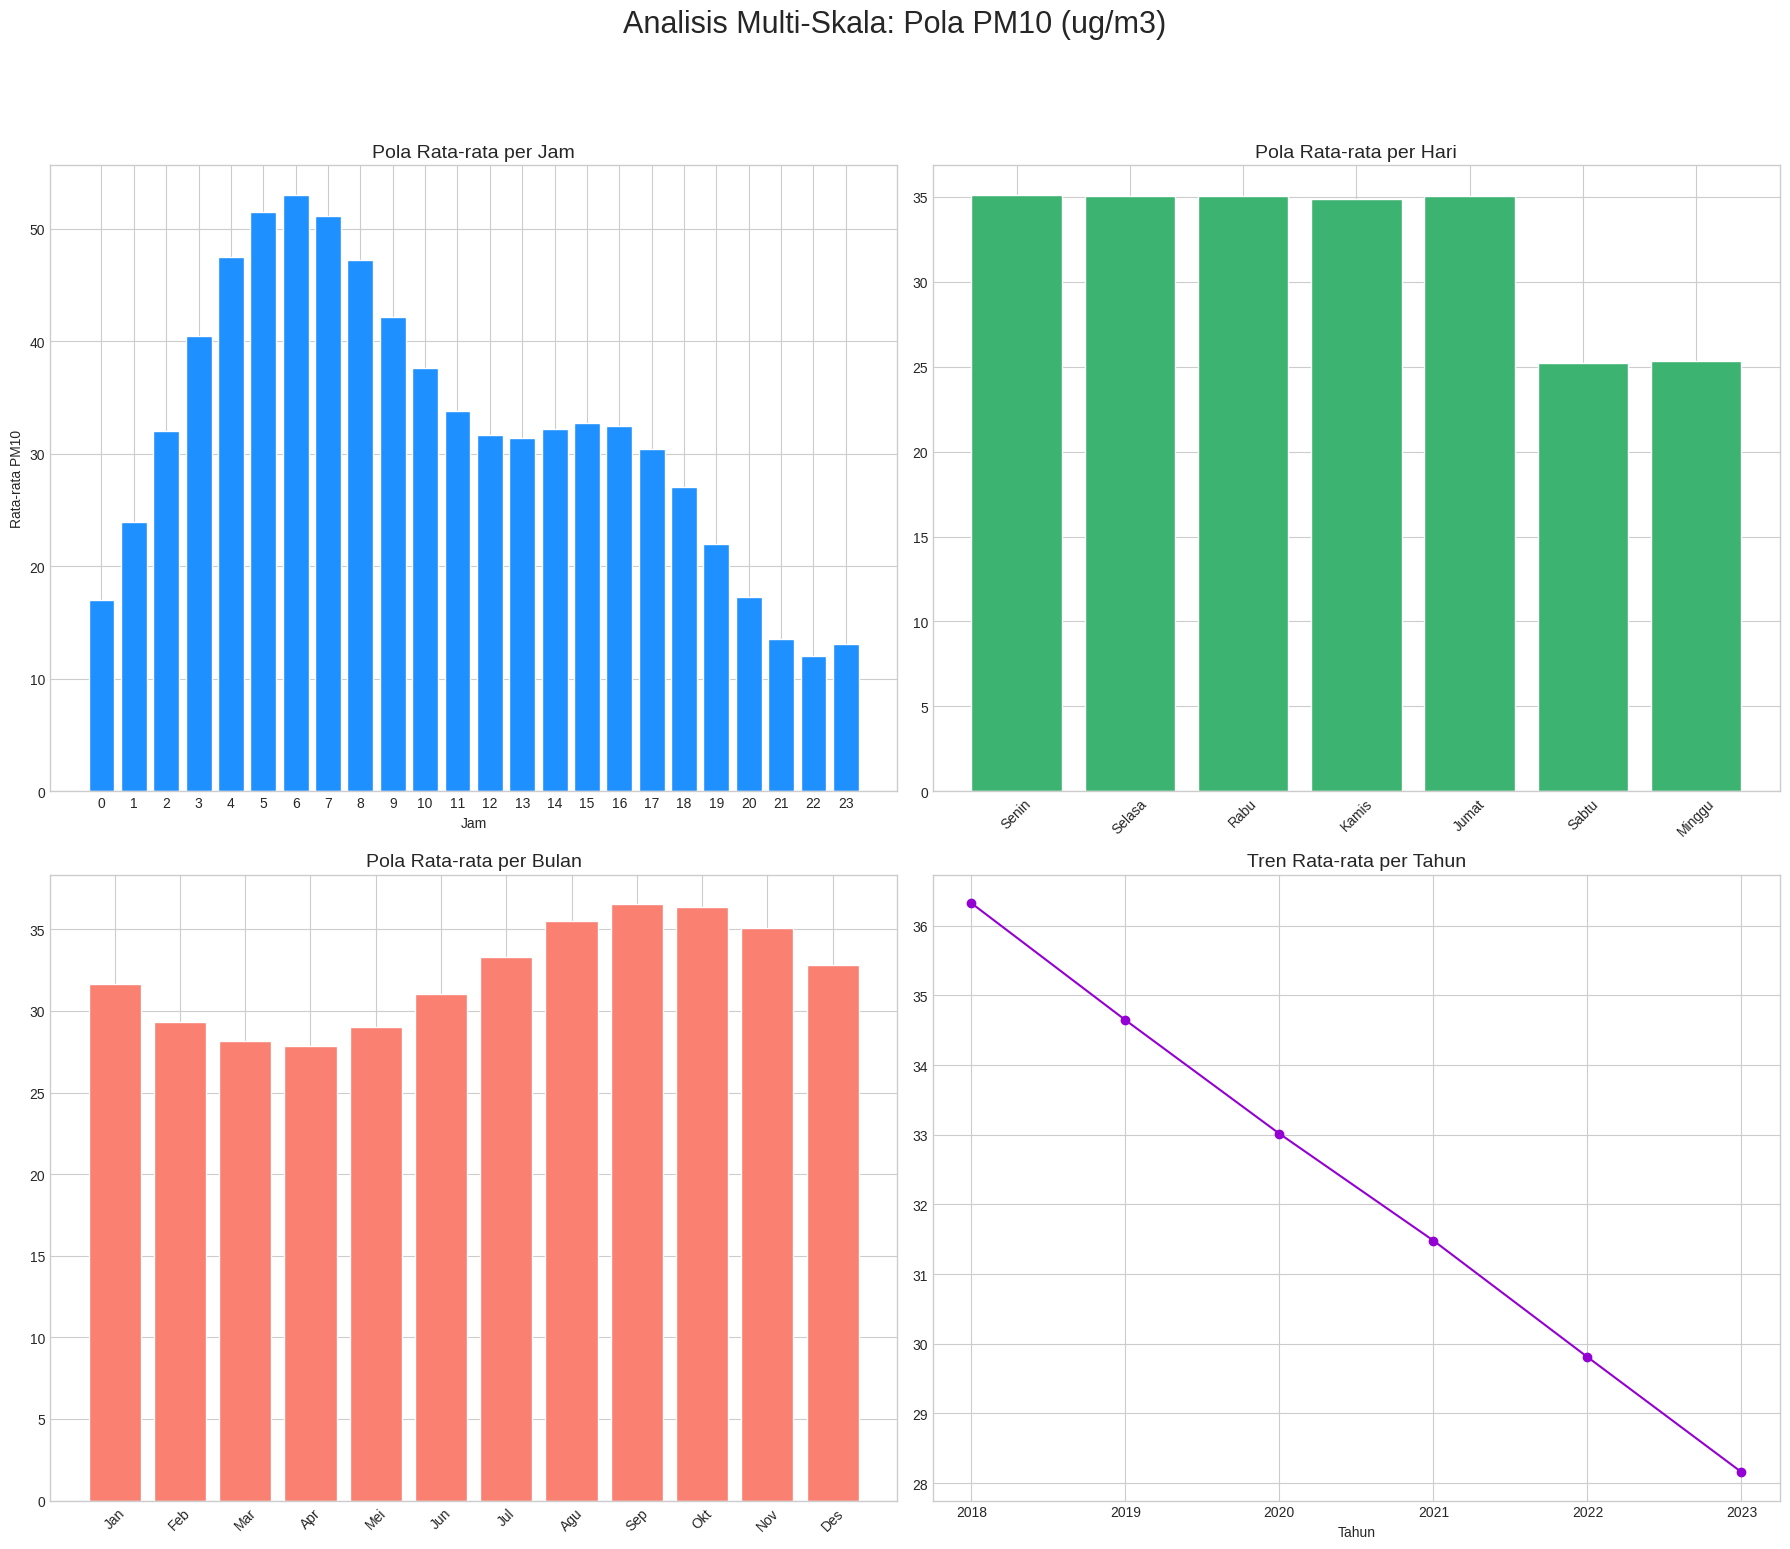

-- Menganalisis fitur: NO (ug/m3)


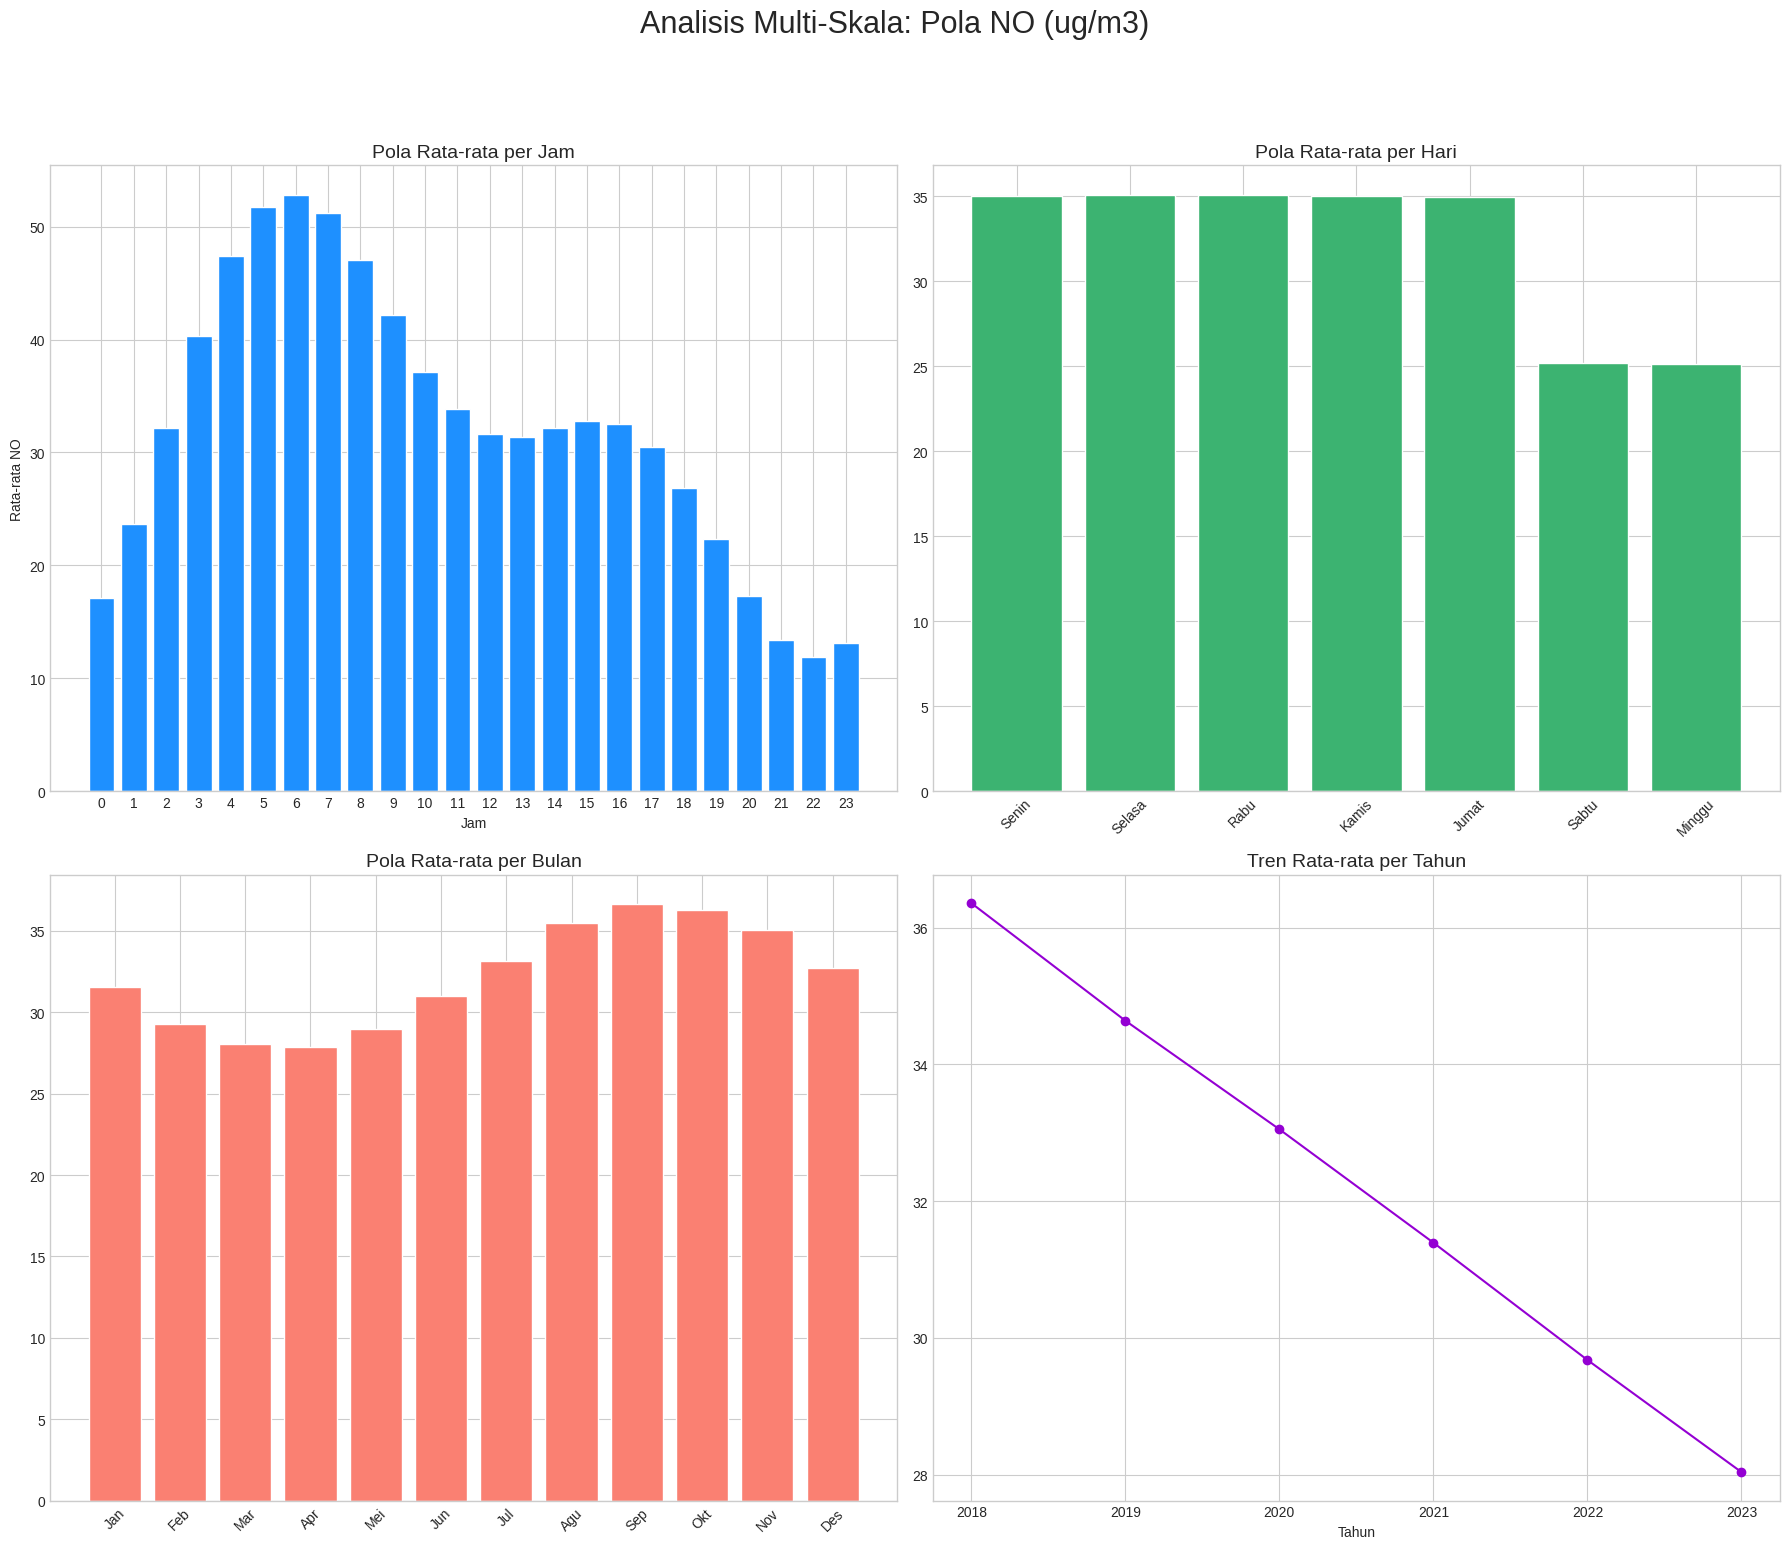

-- Menganalisis fitur: NO2 (ug/m3)


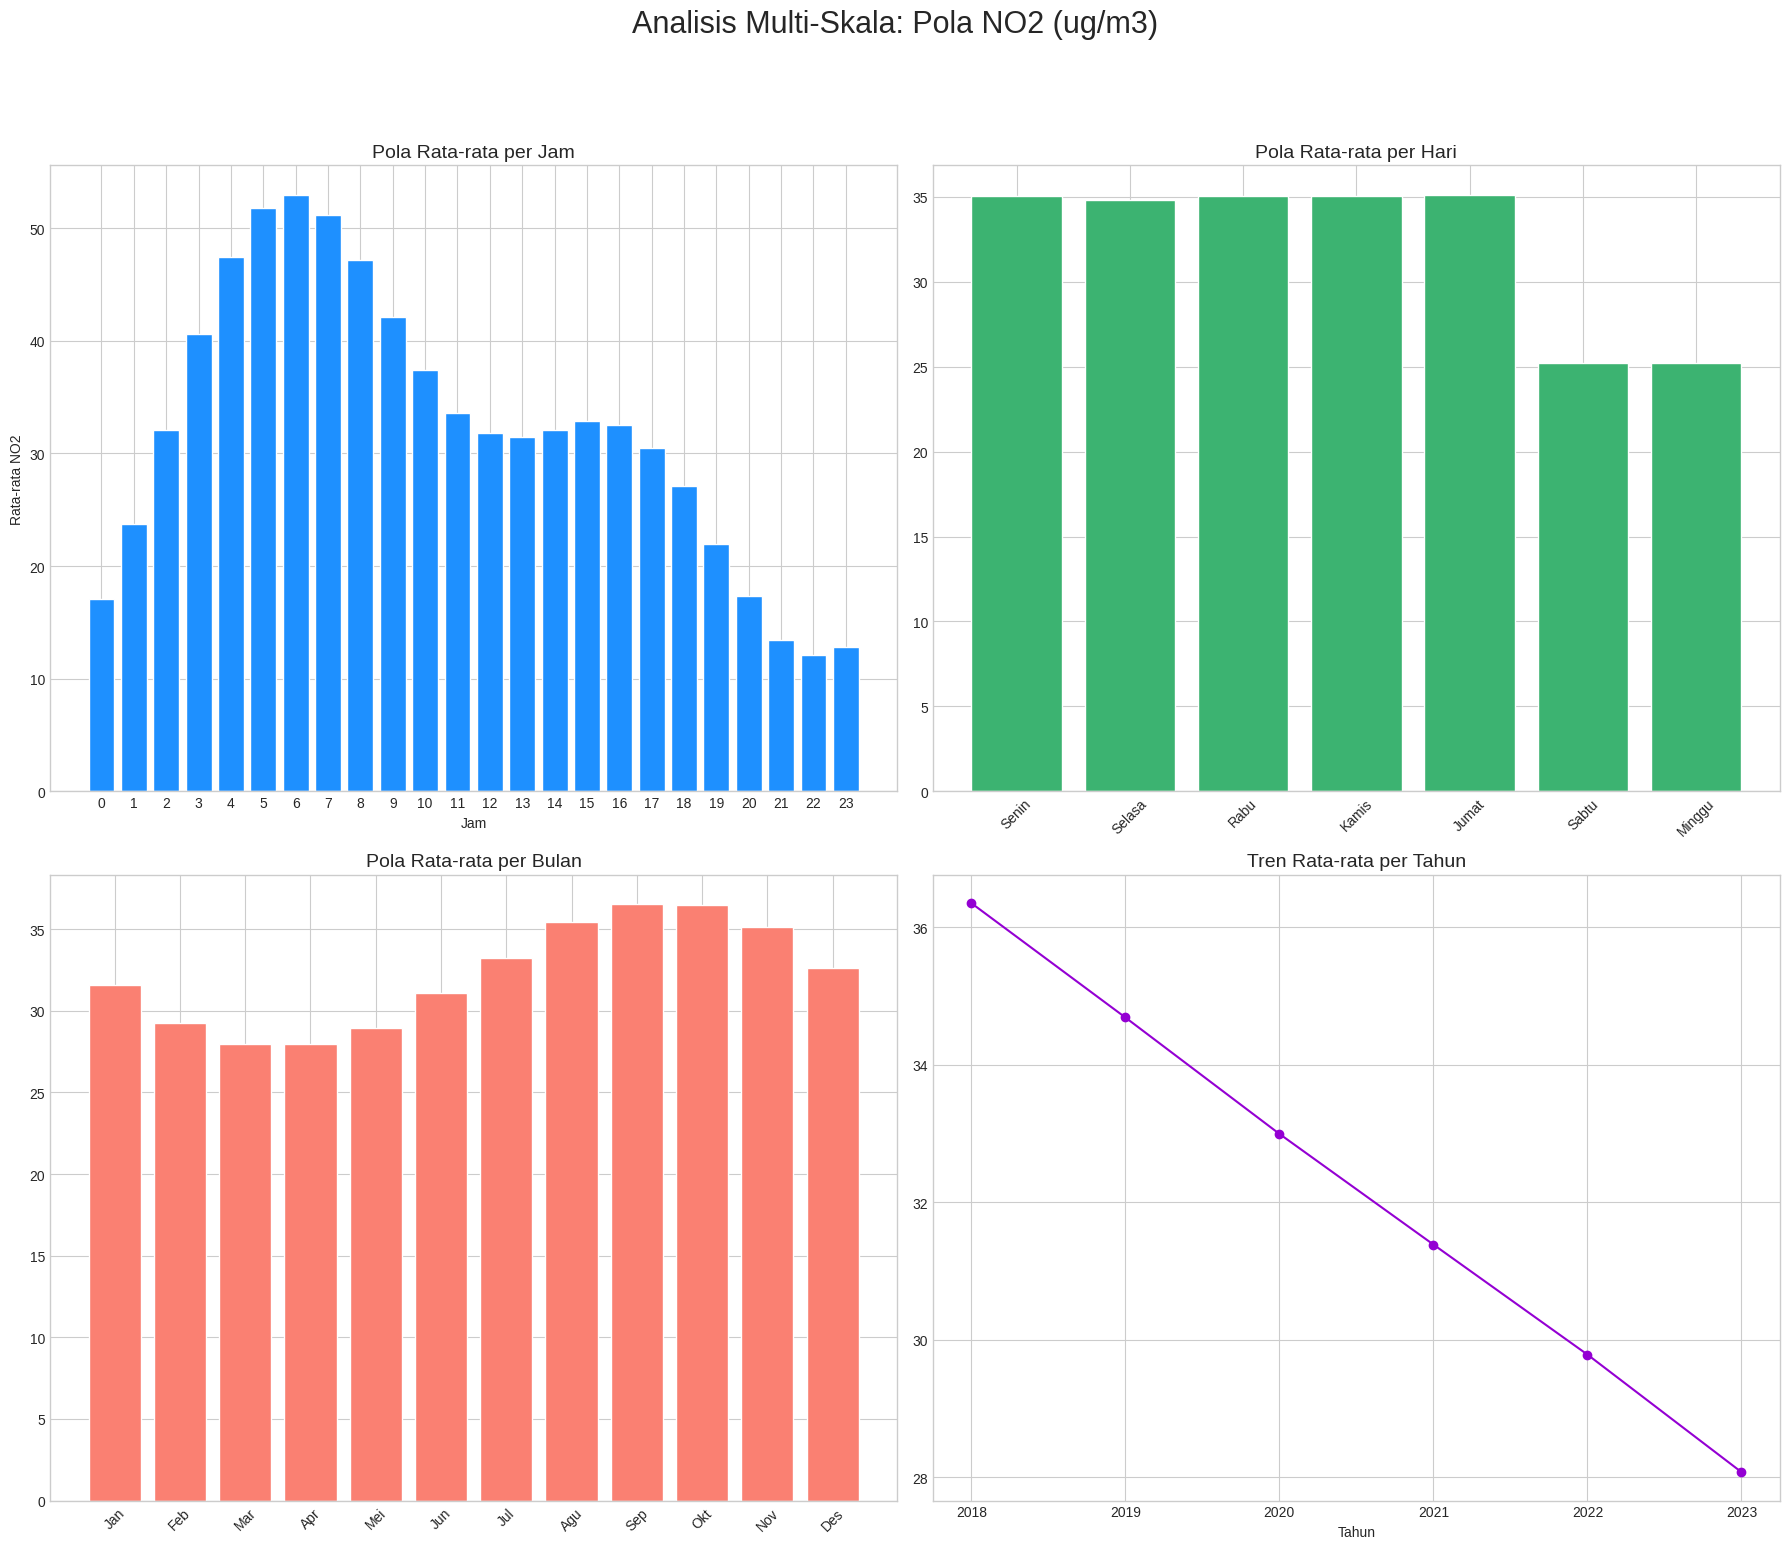

-- Menganalisis fitur: NOx (ppb)


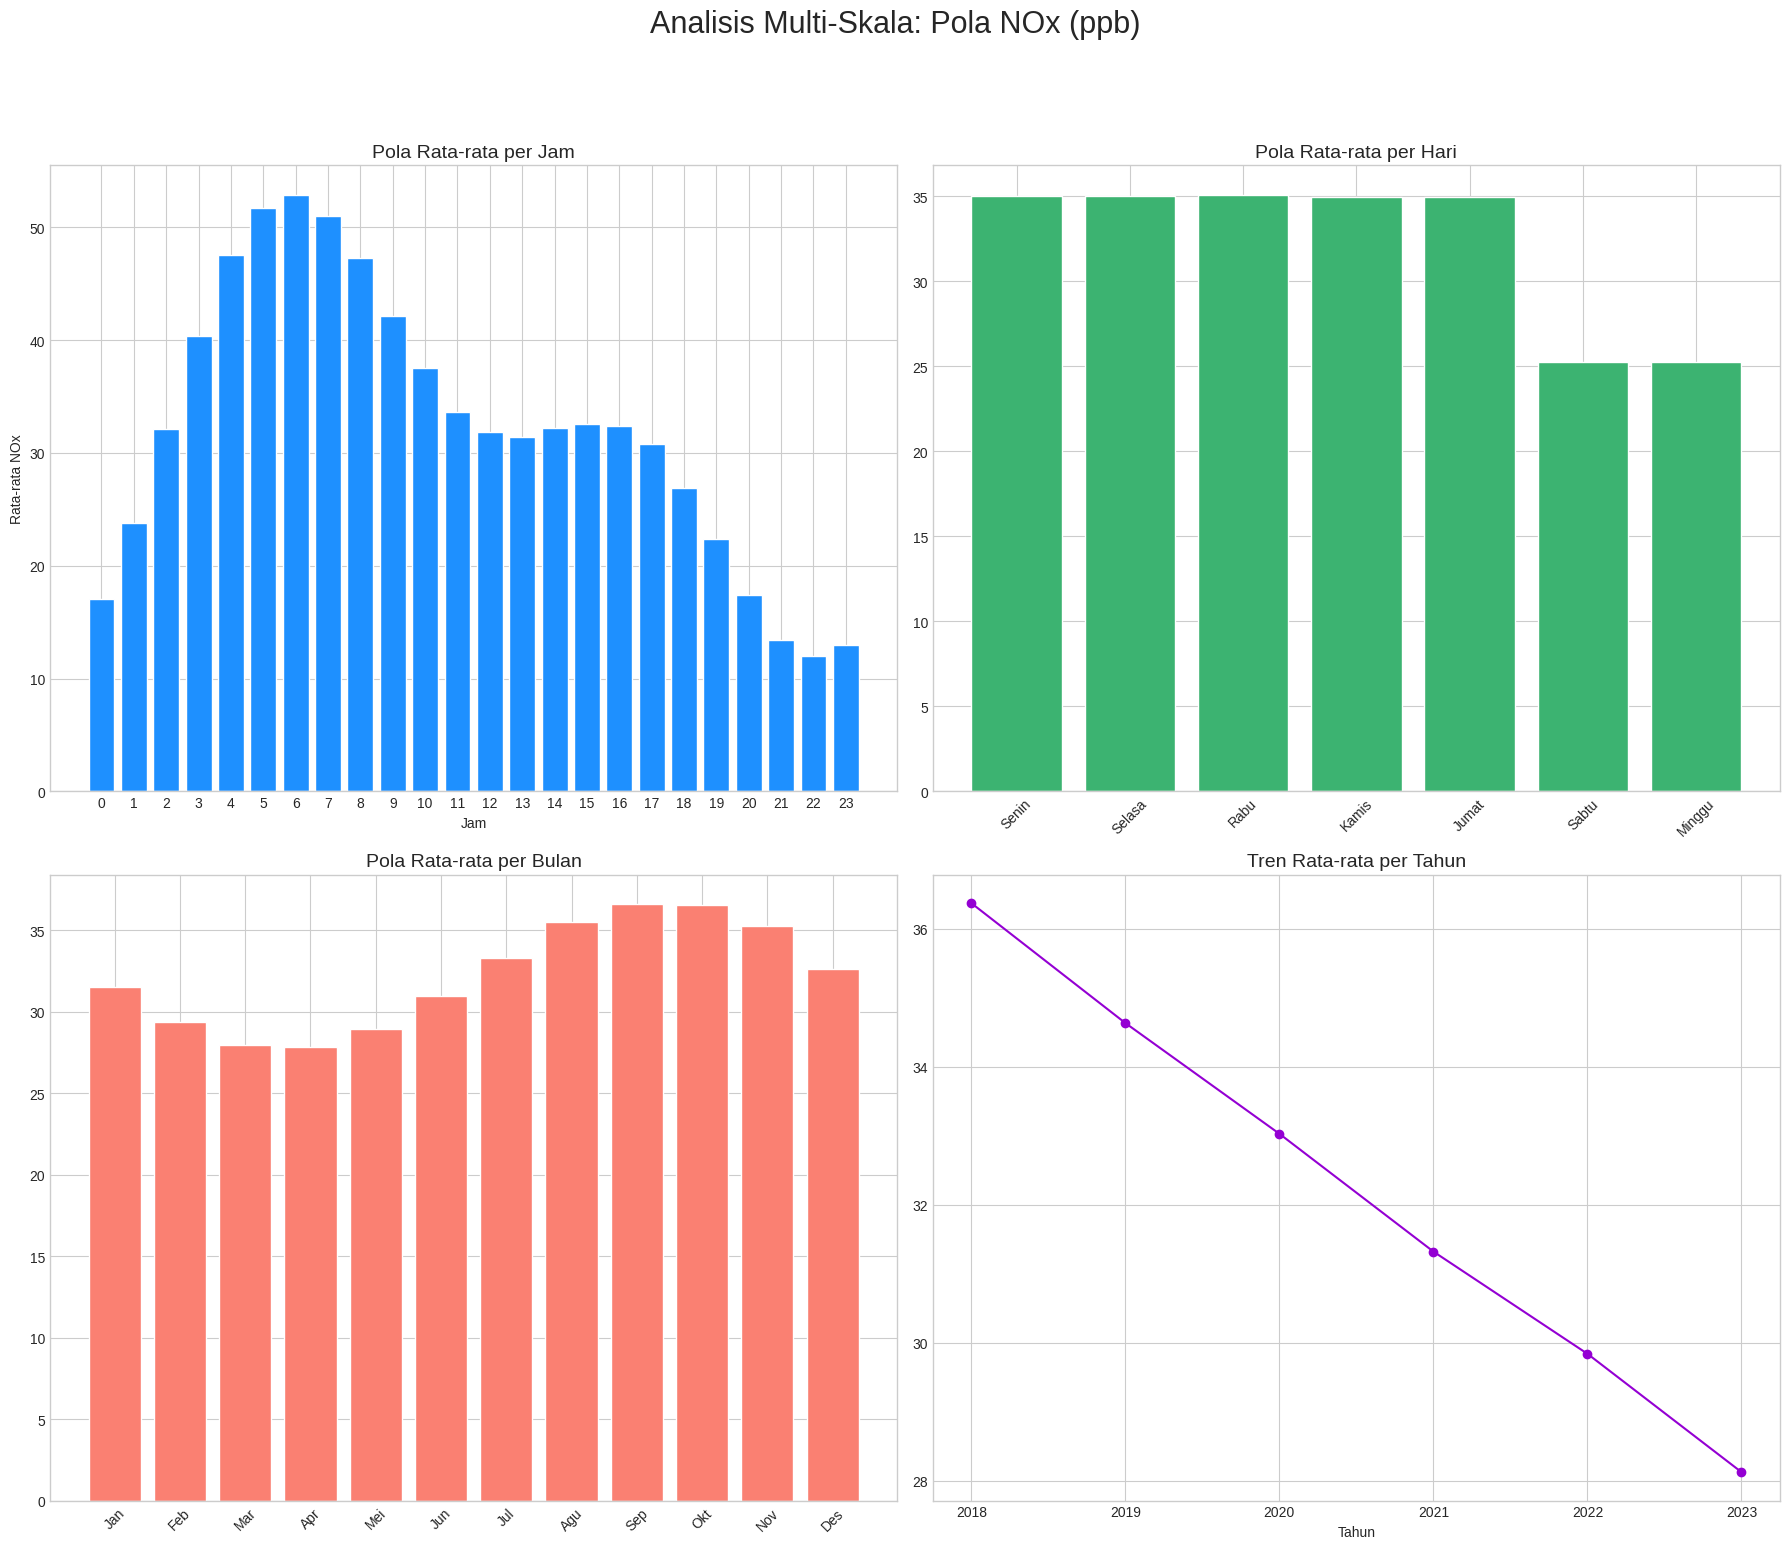

-- Menganalisis fitur: NH3 (ug/m3)


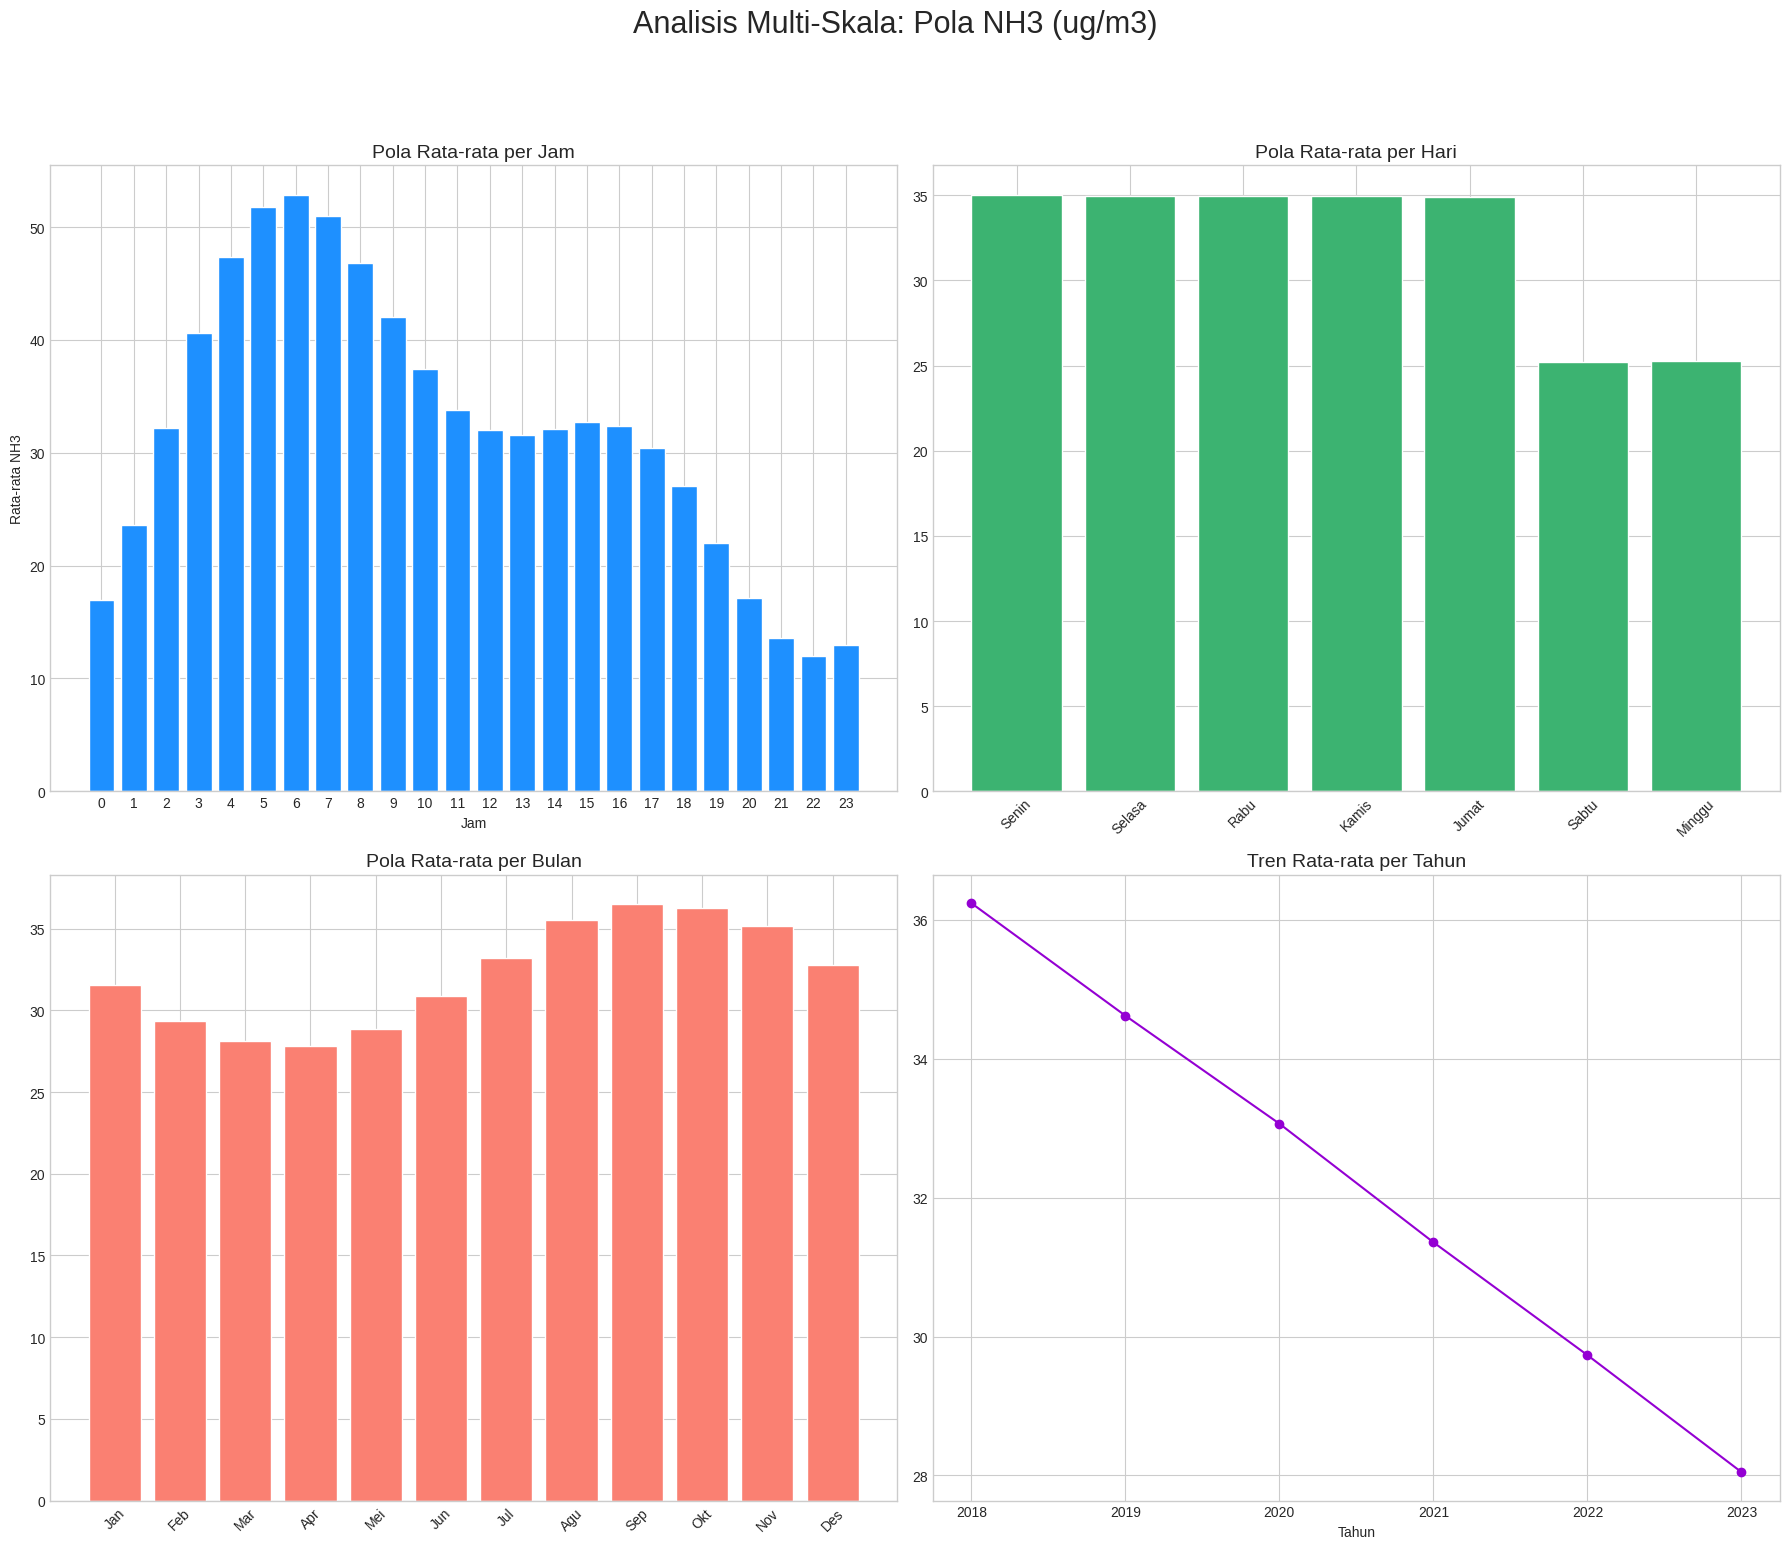

-- Menganalisis fitur: SO2 (ug/m3)


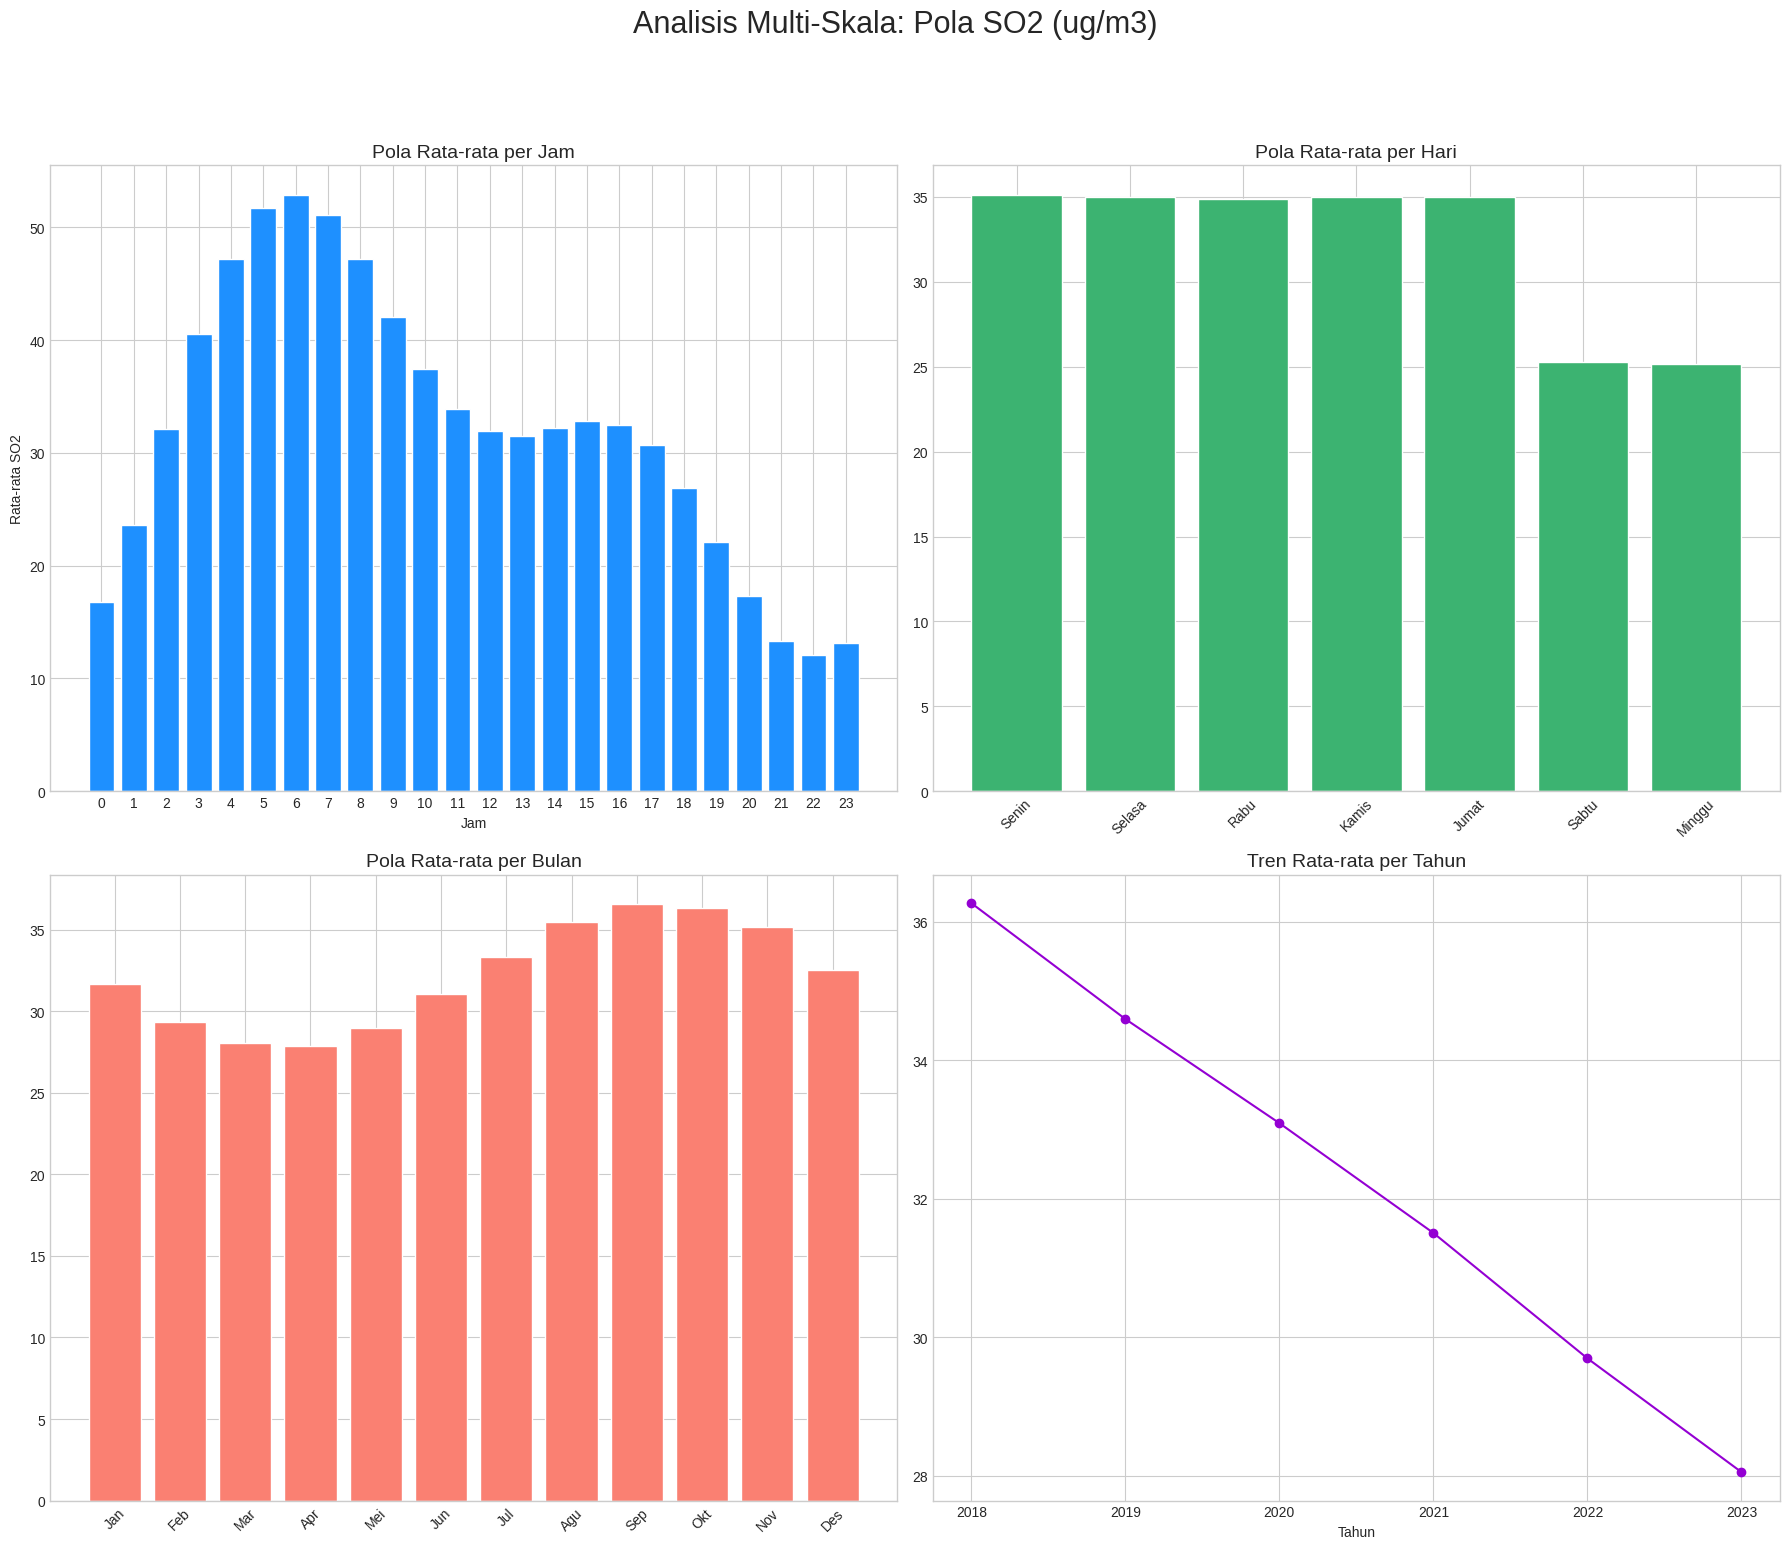

-- Menganalisis fitur: CO (mg/m3)


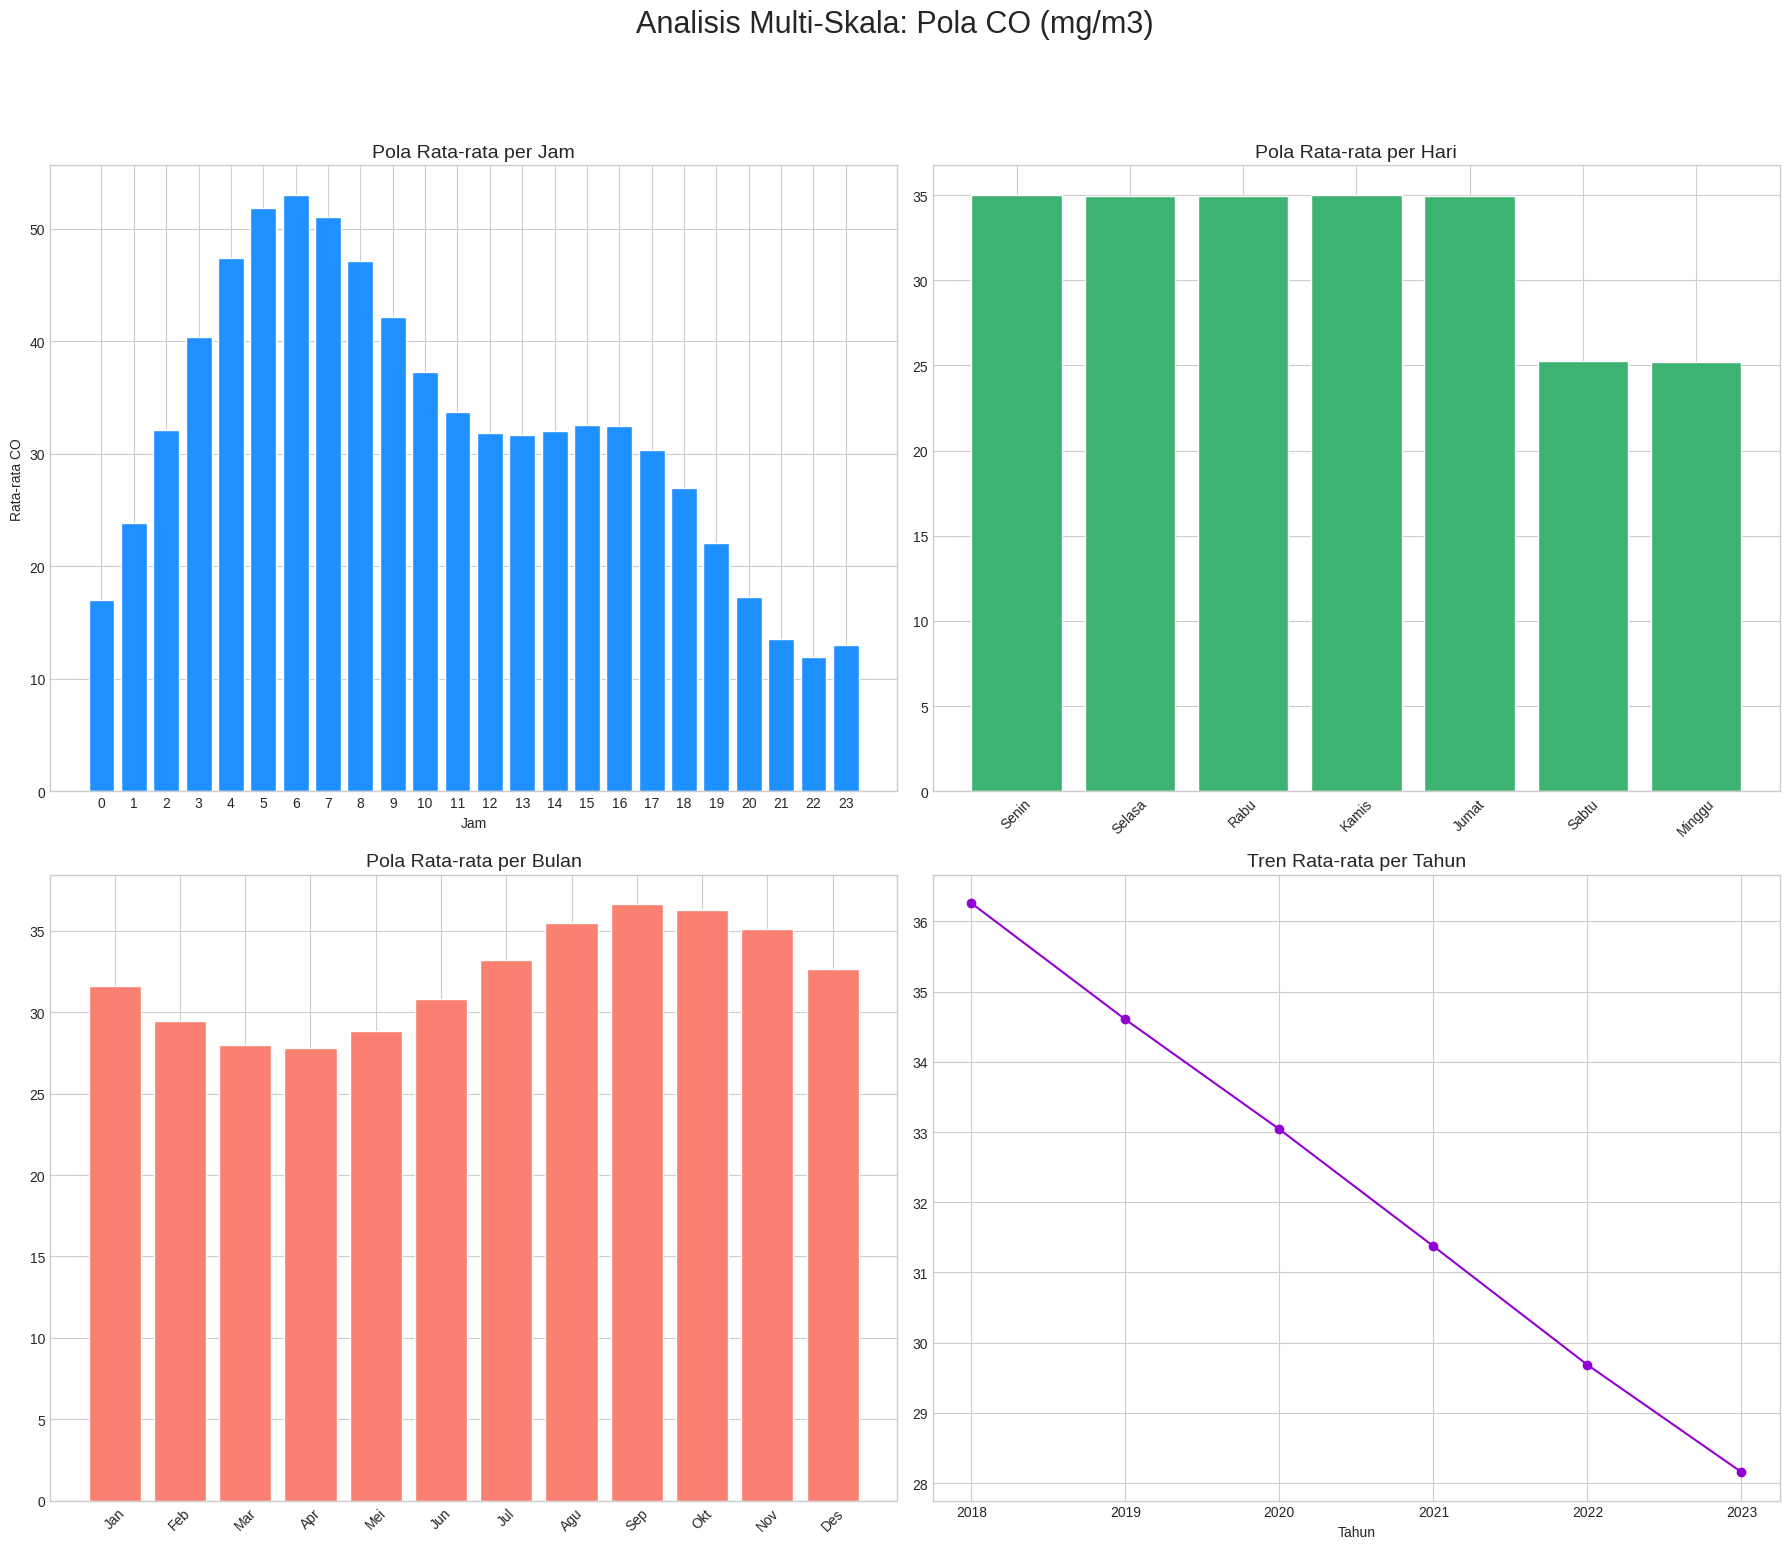

-- Menganalisis fitur: Ozone (ug/m3)


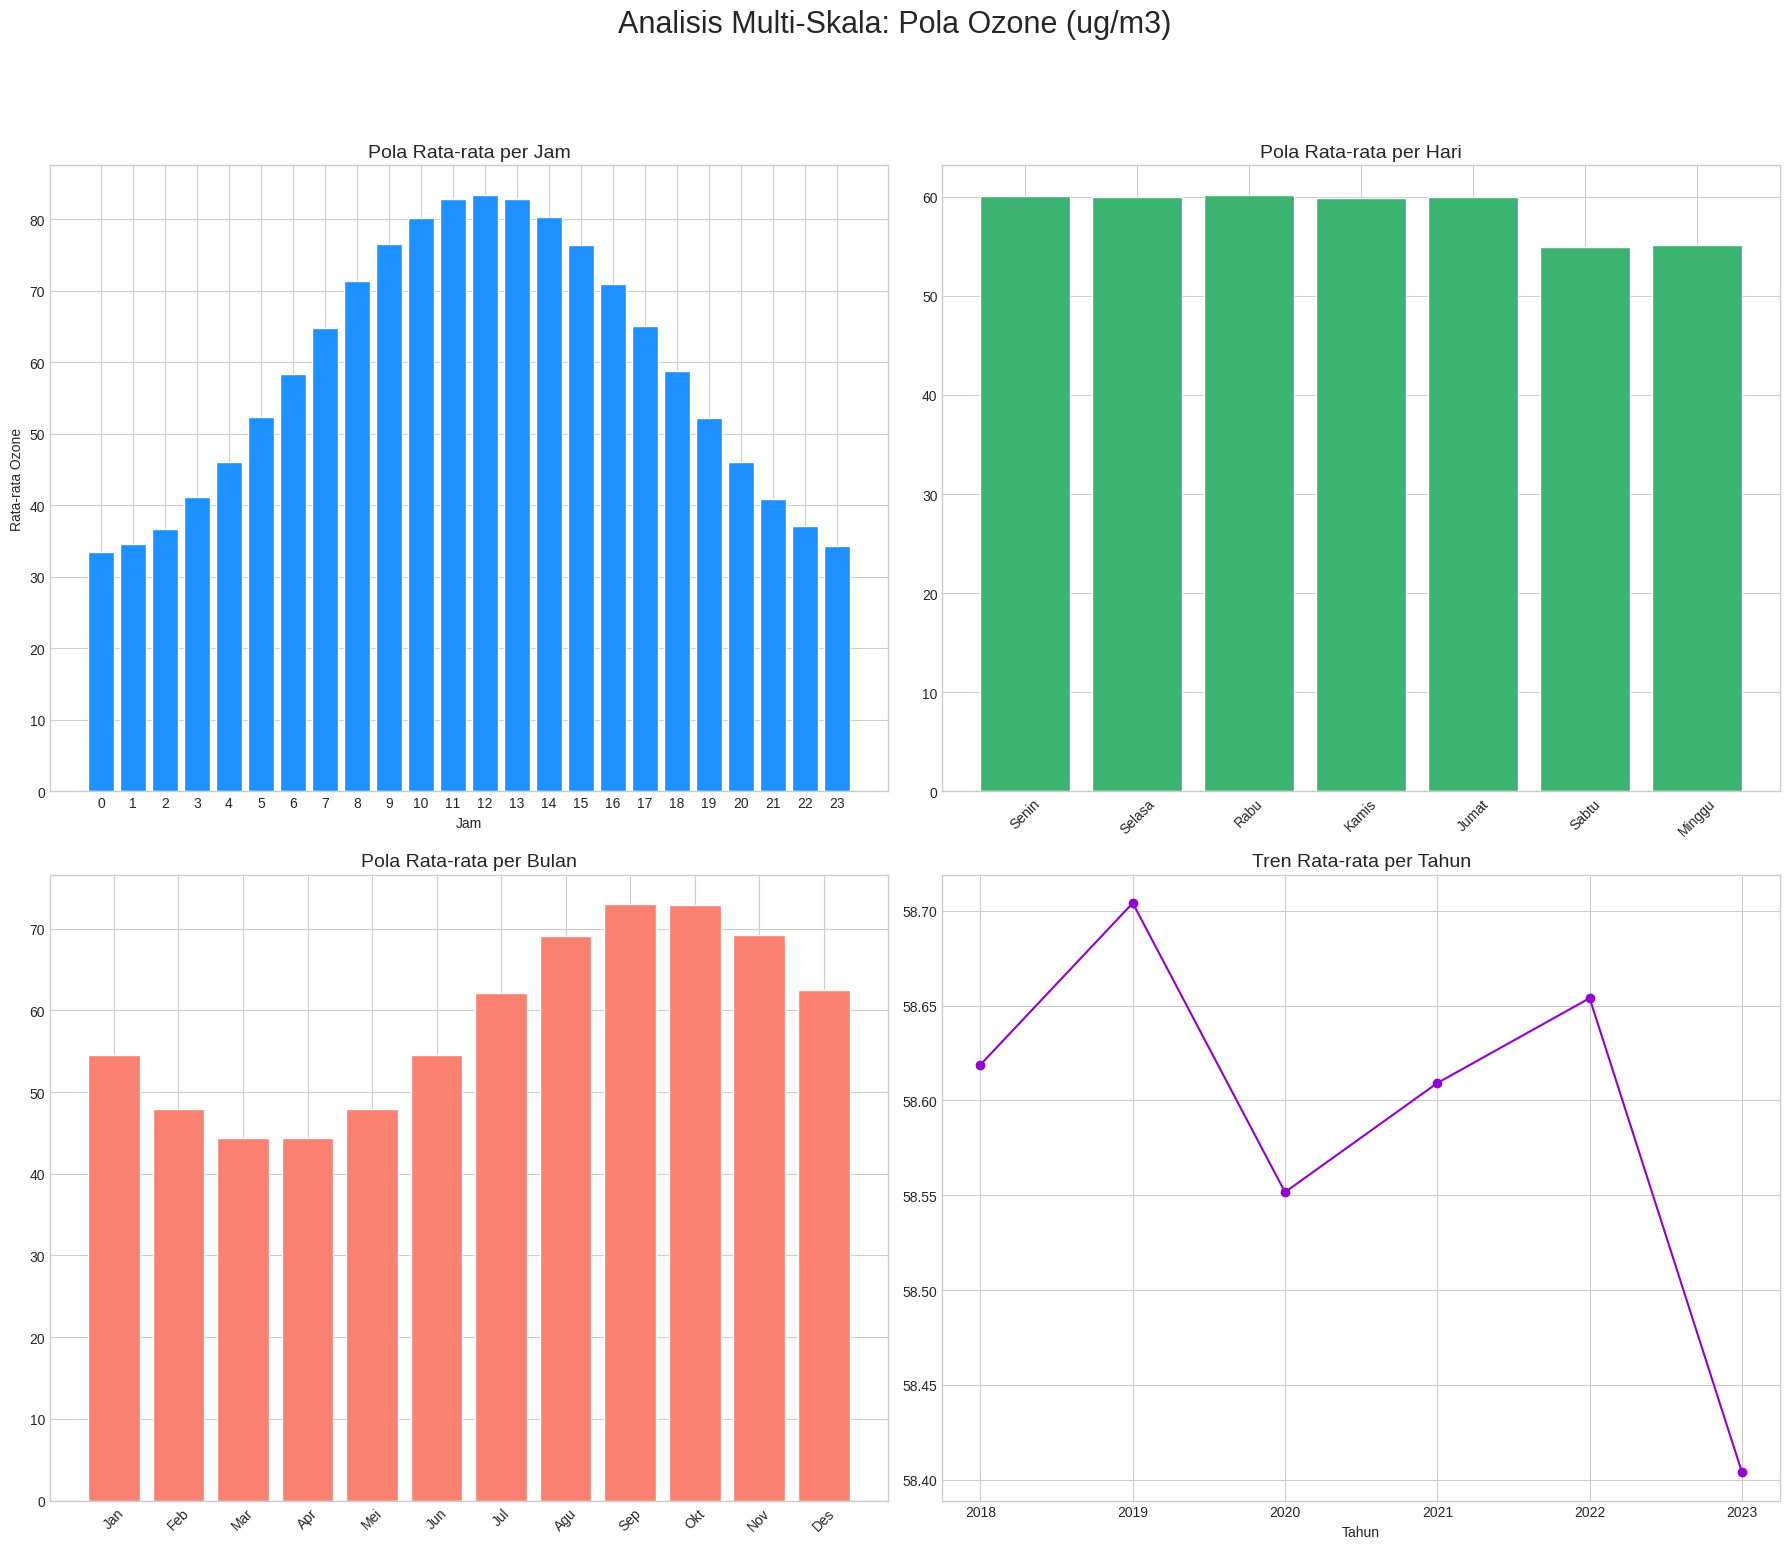

-- Menganalisis fitur: Benzene (ug/m3)


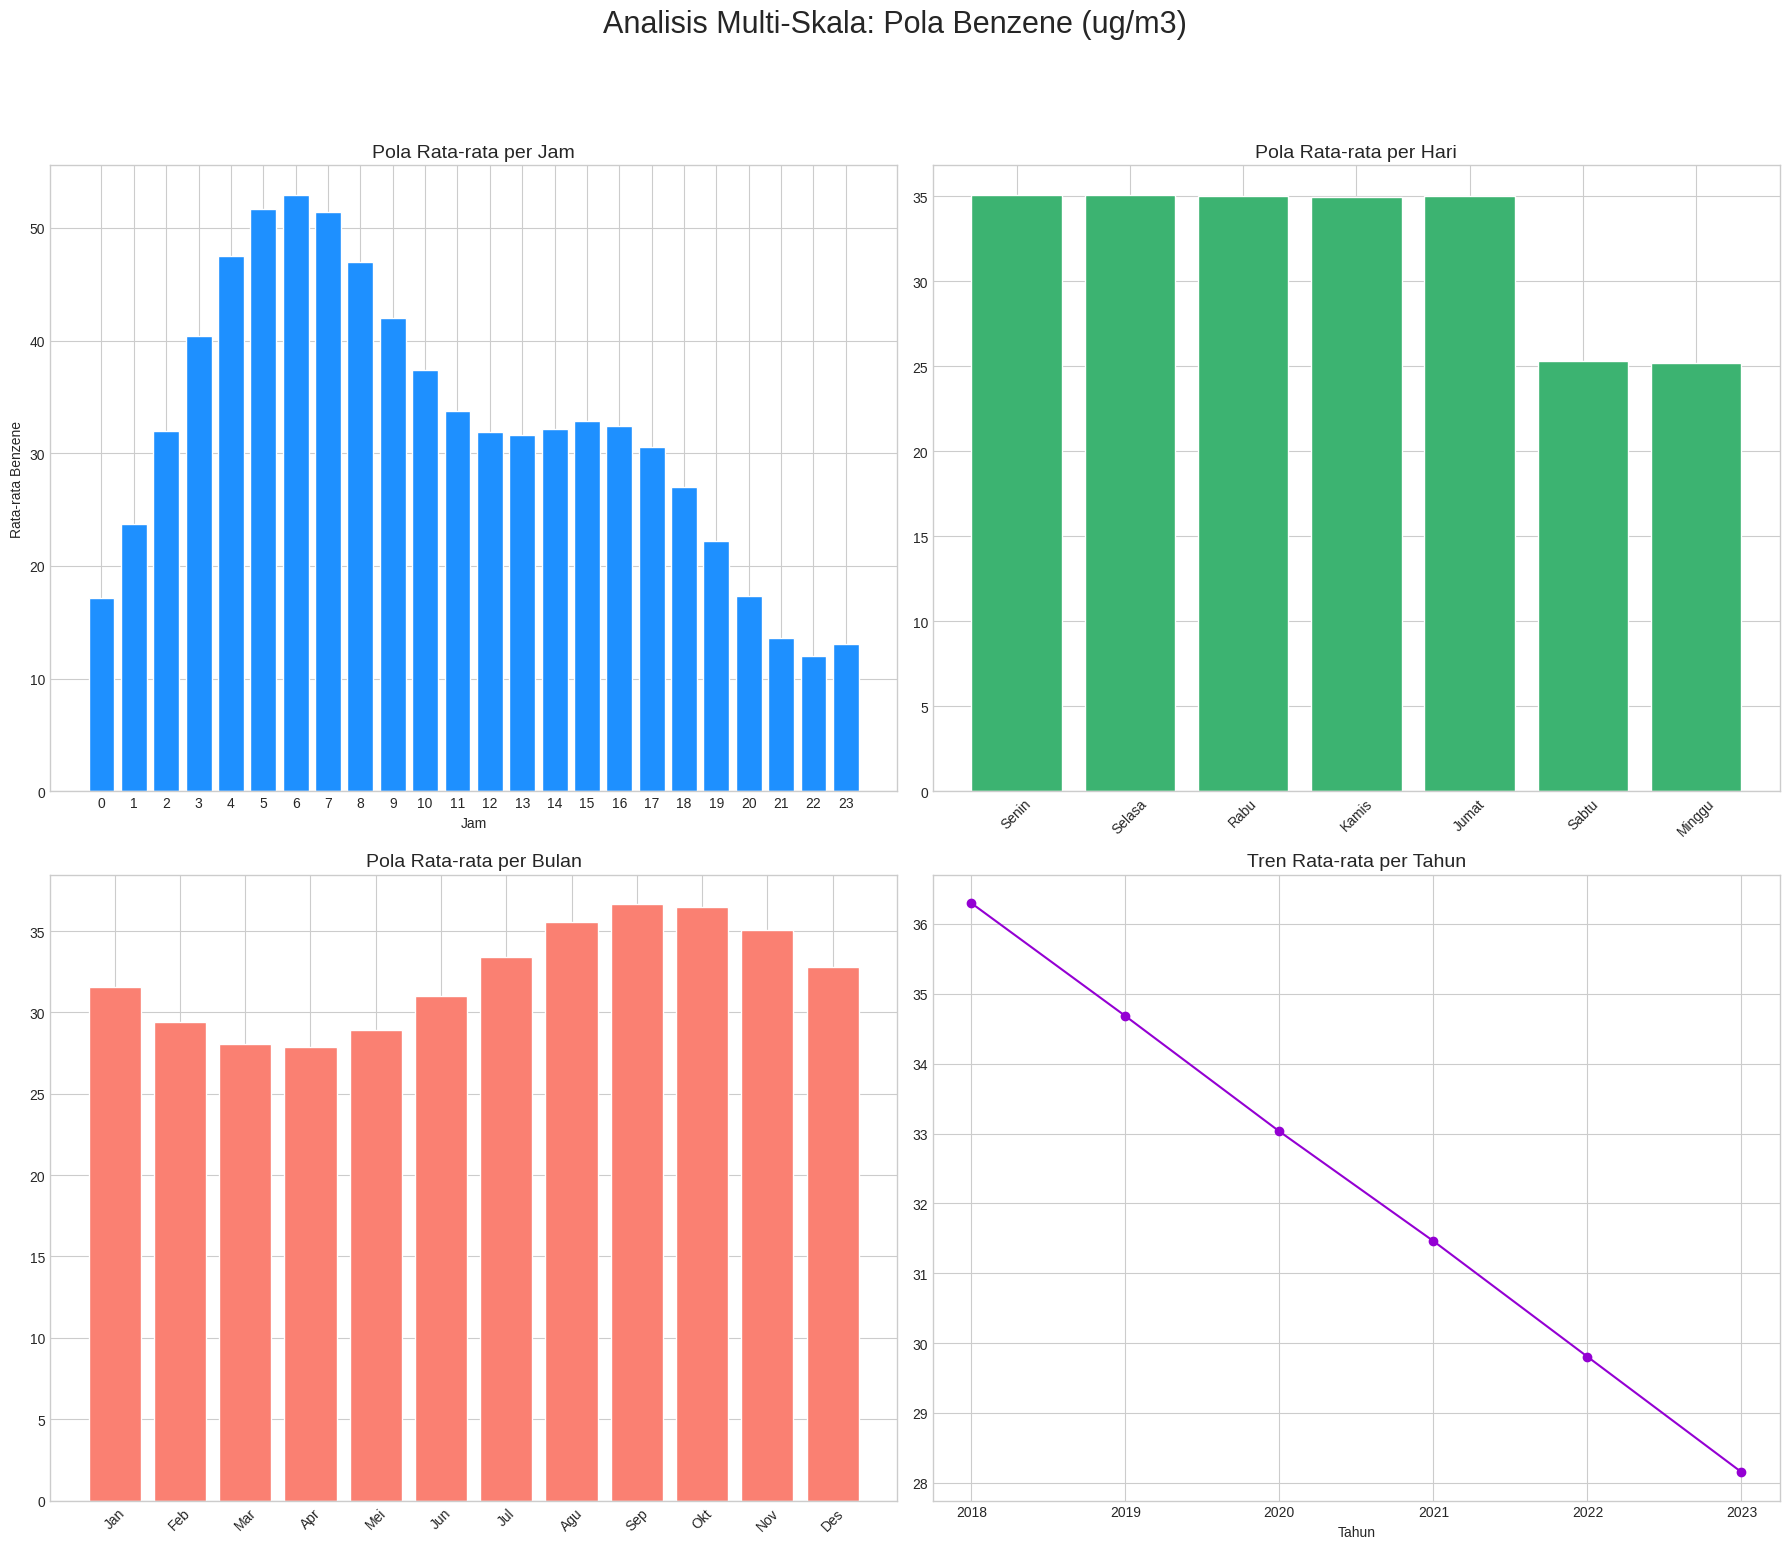

-- Menganalisis fitur: Toluene (ug/m3)


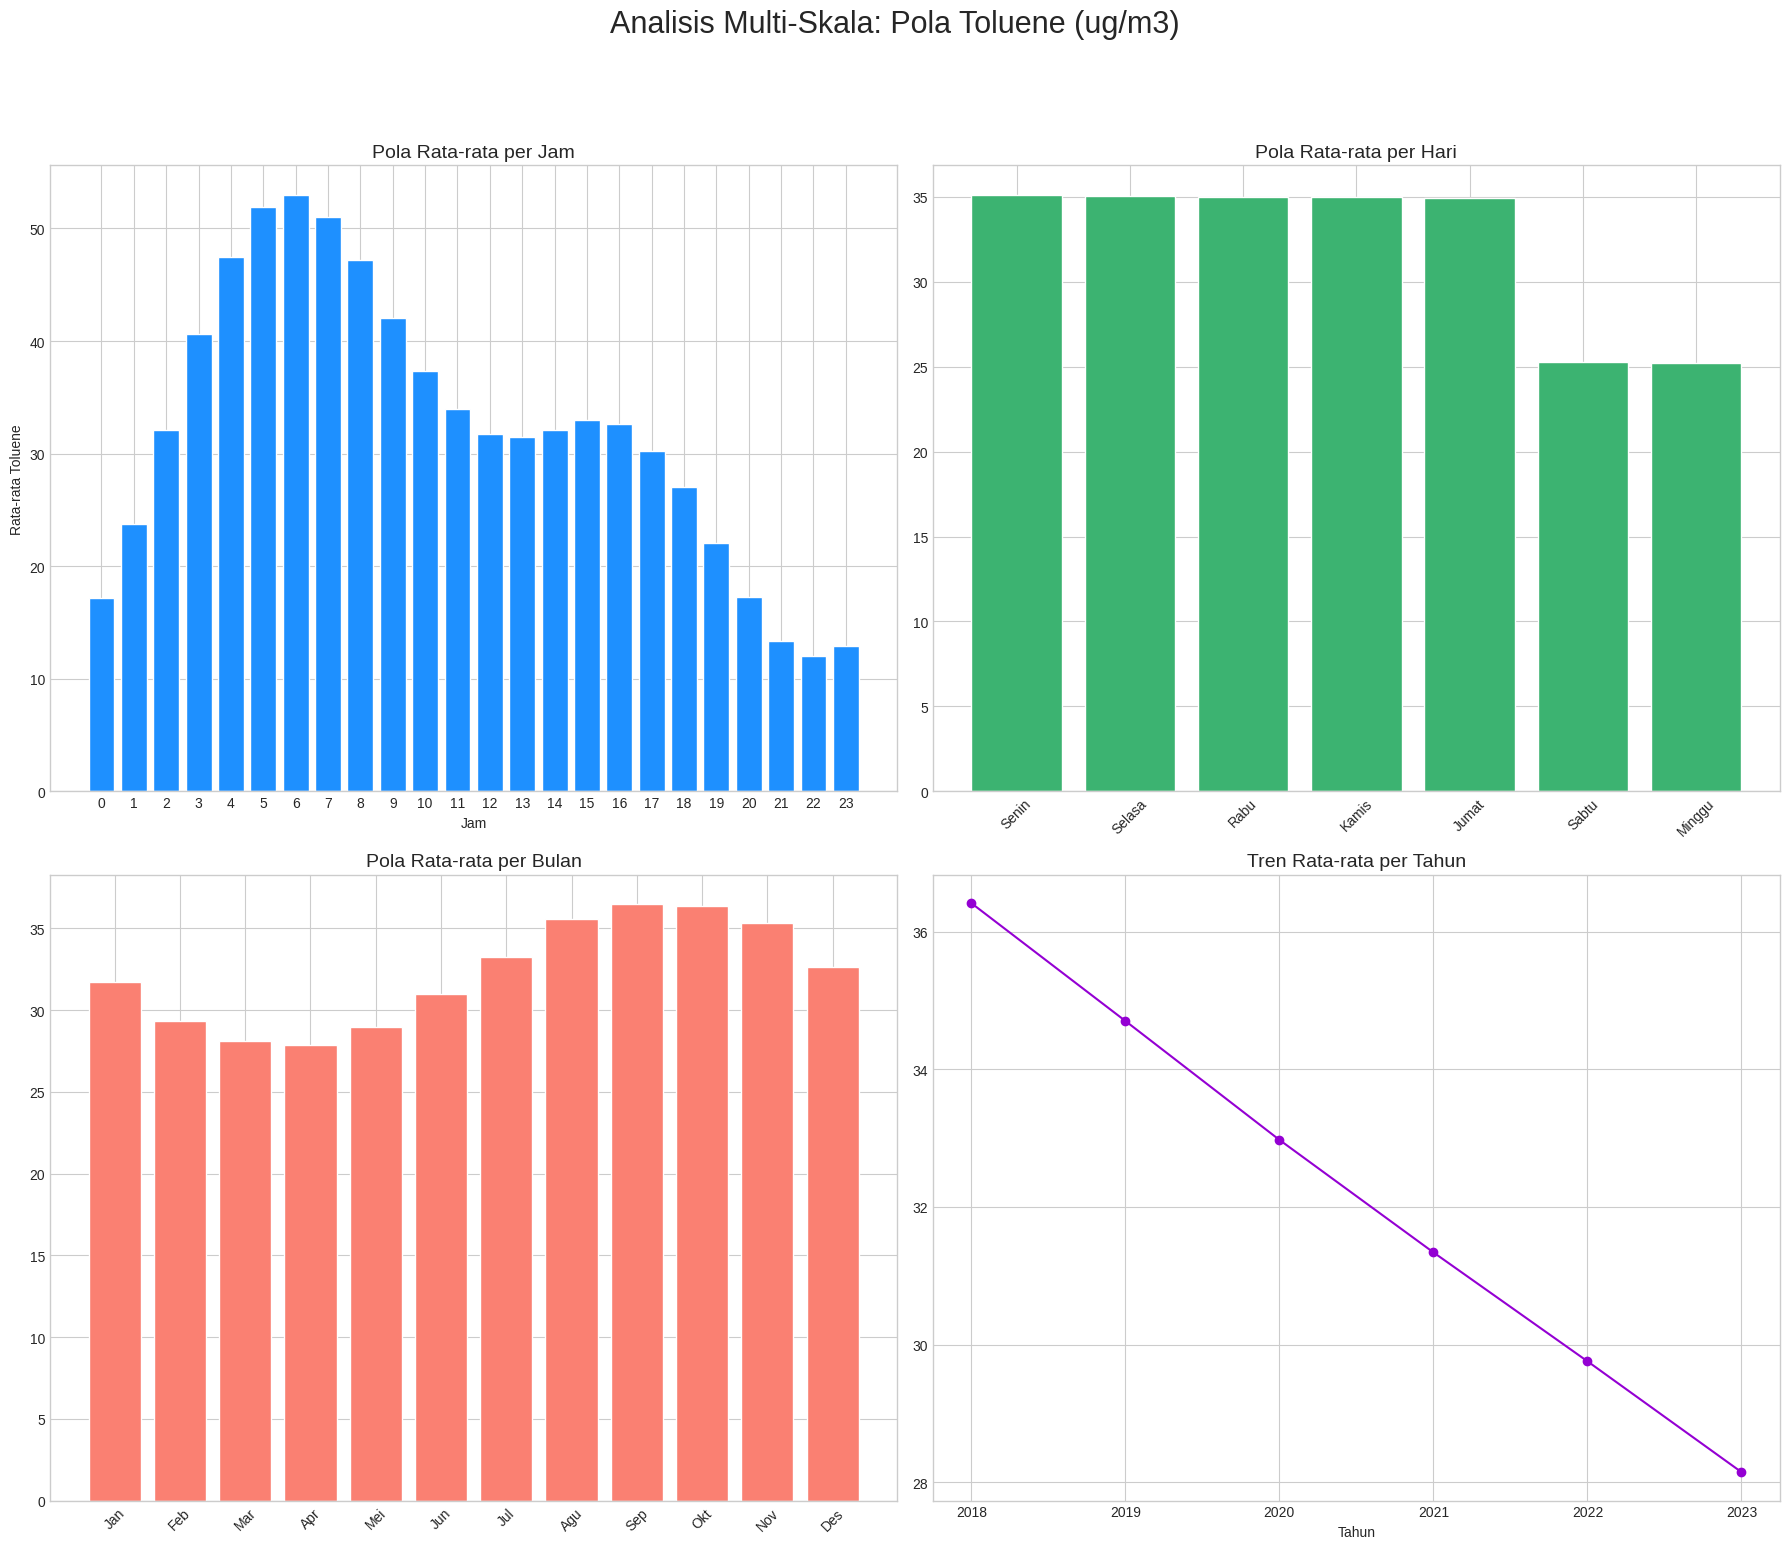

-- Menganalisis fitur: Eth-Benzene (ug/m3)


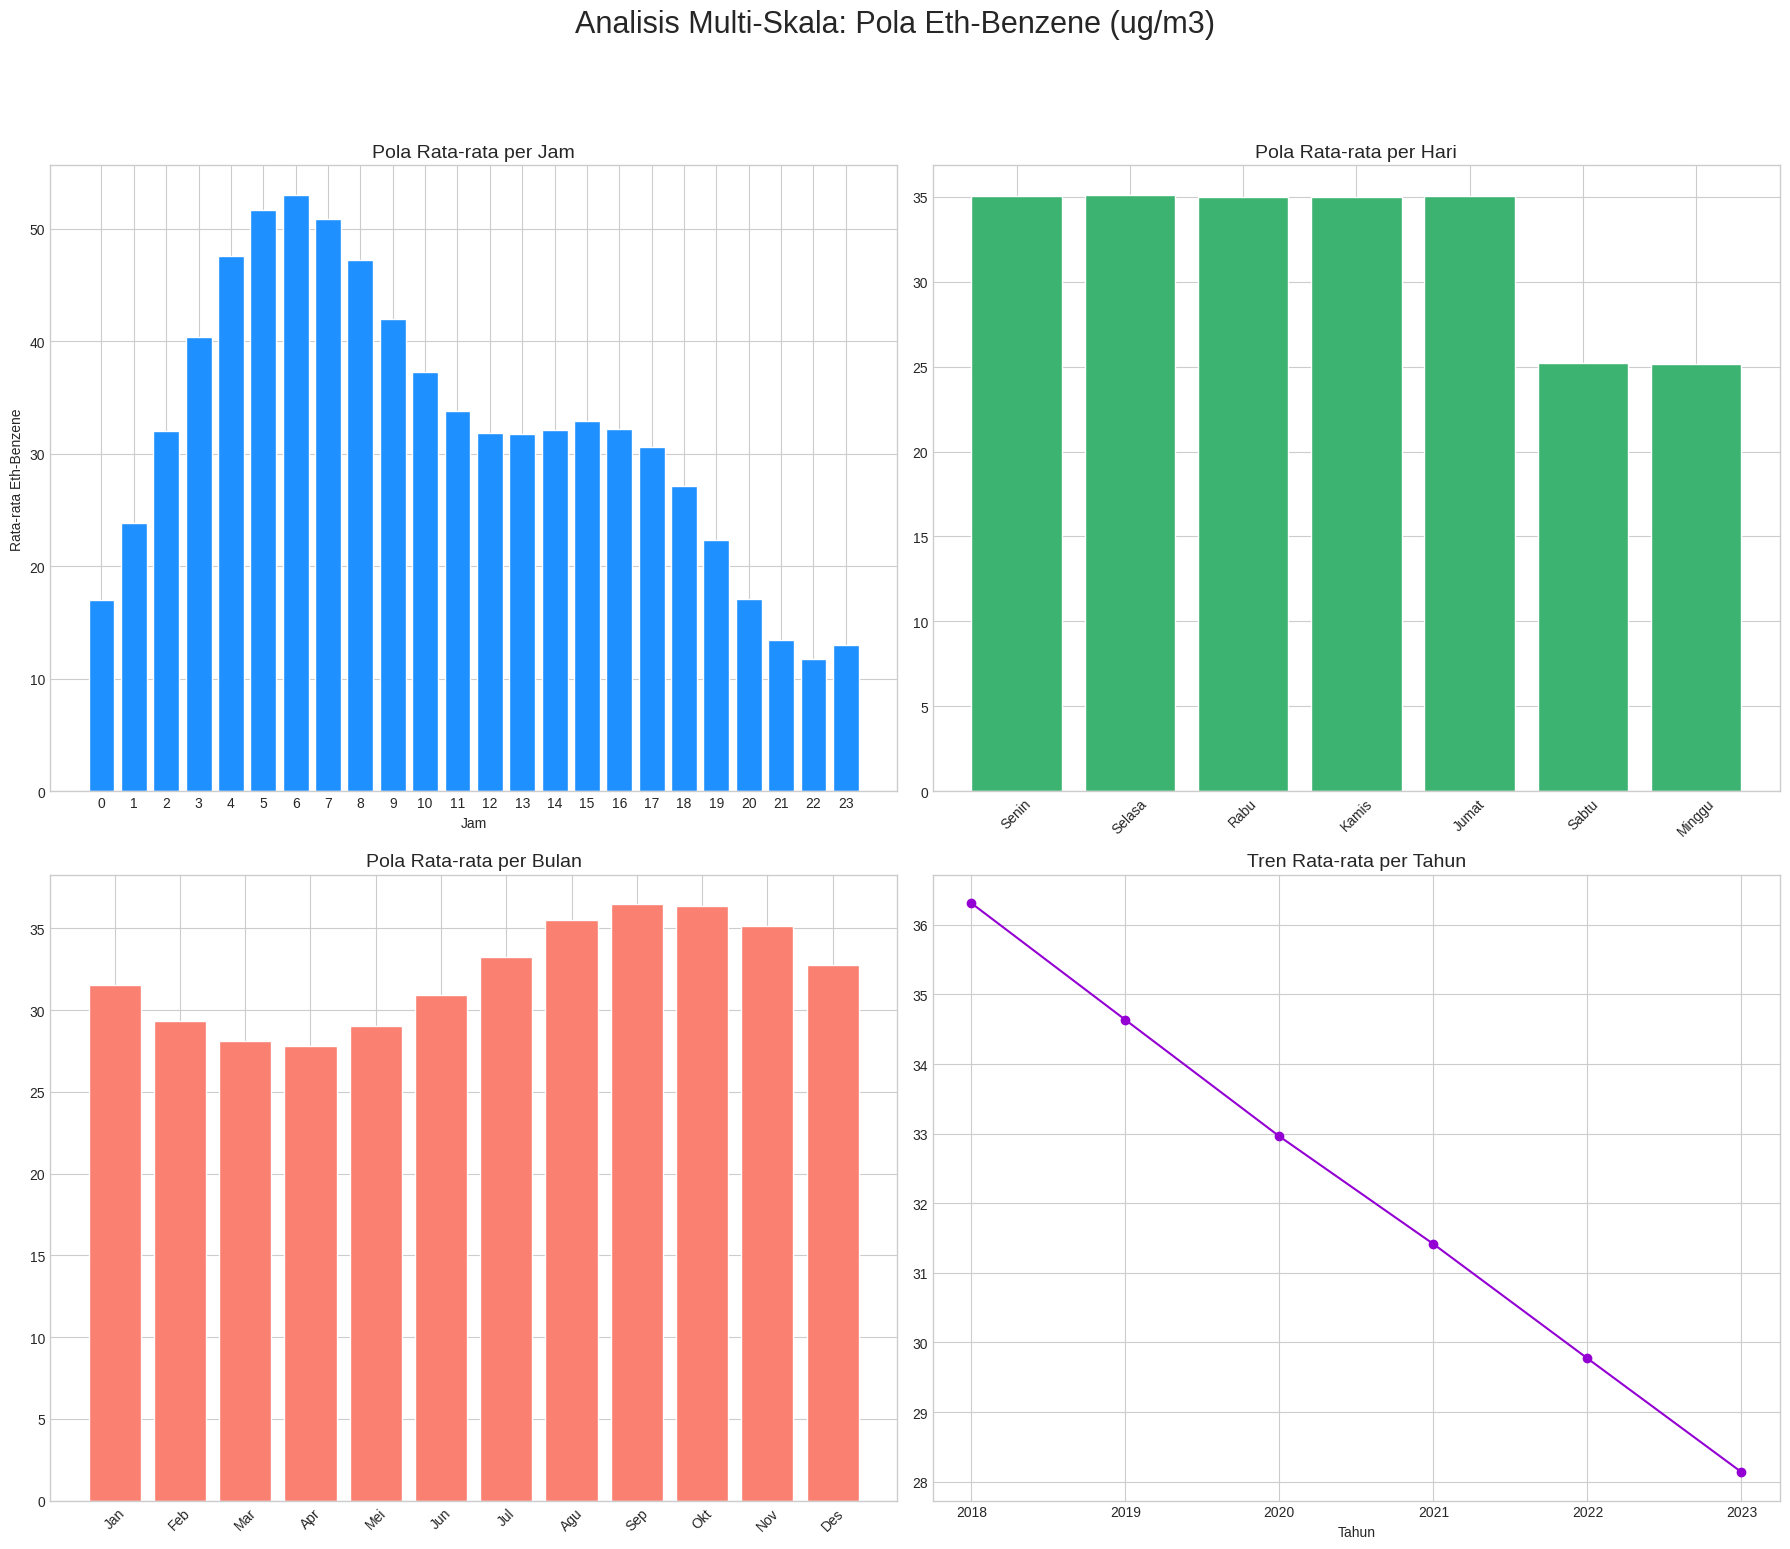

-- Menganalisis fitur: MP-Xylene (ug/m3)


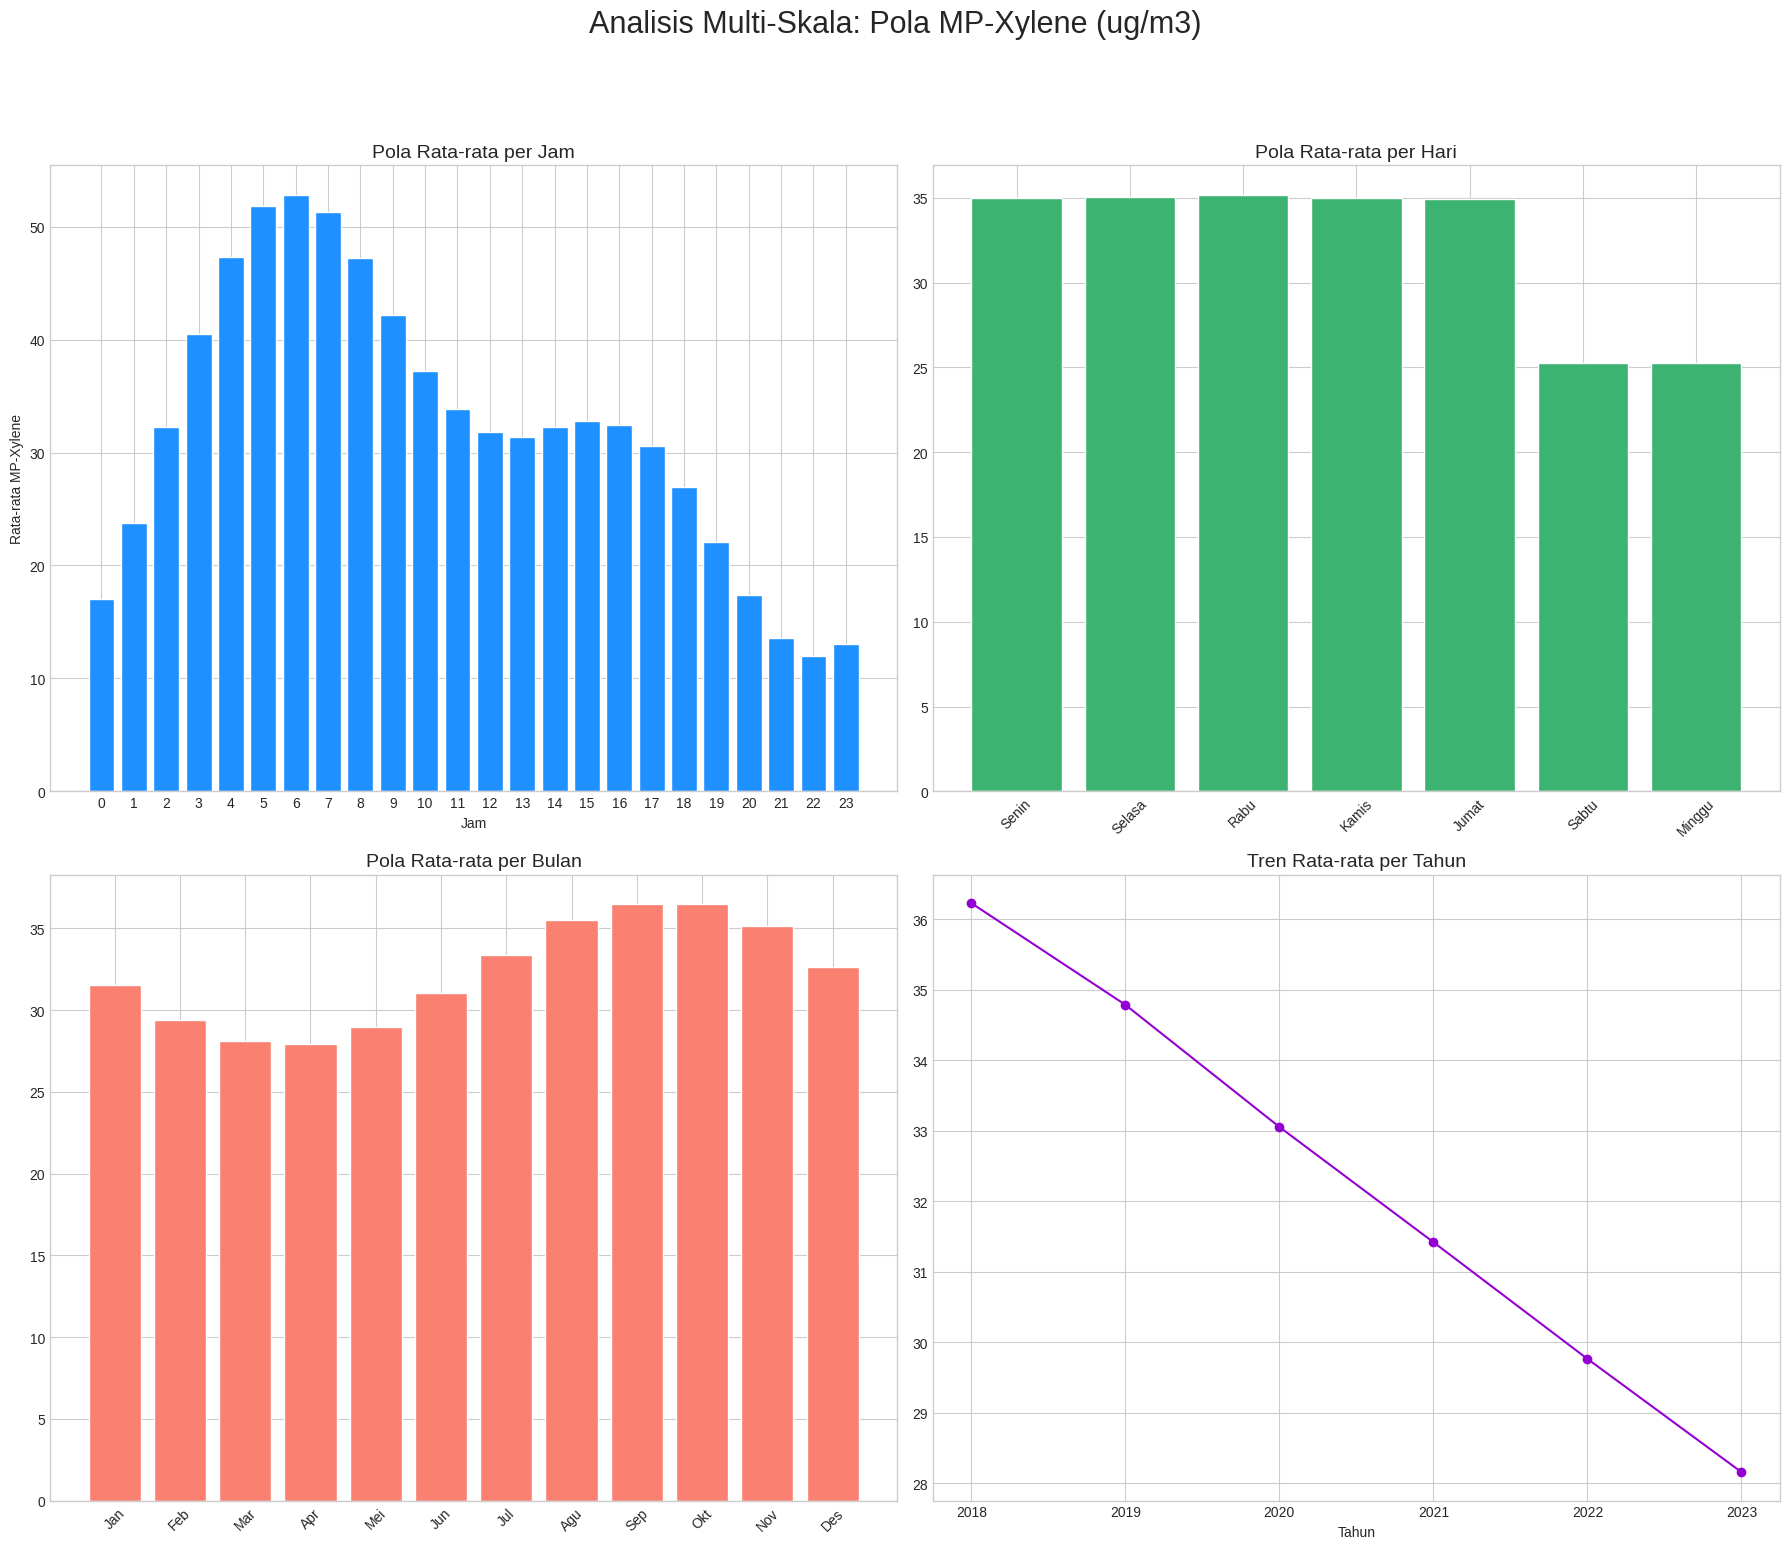

-- Menganalisis fitur: Xylene (ug/m3)


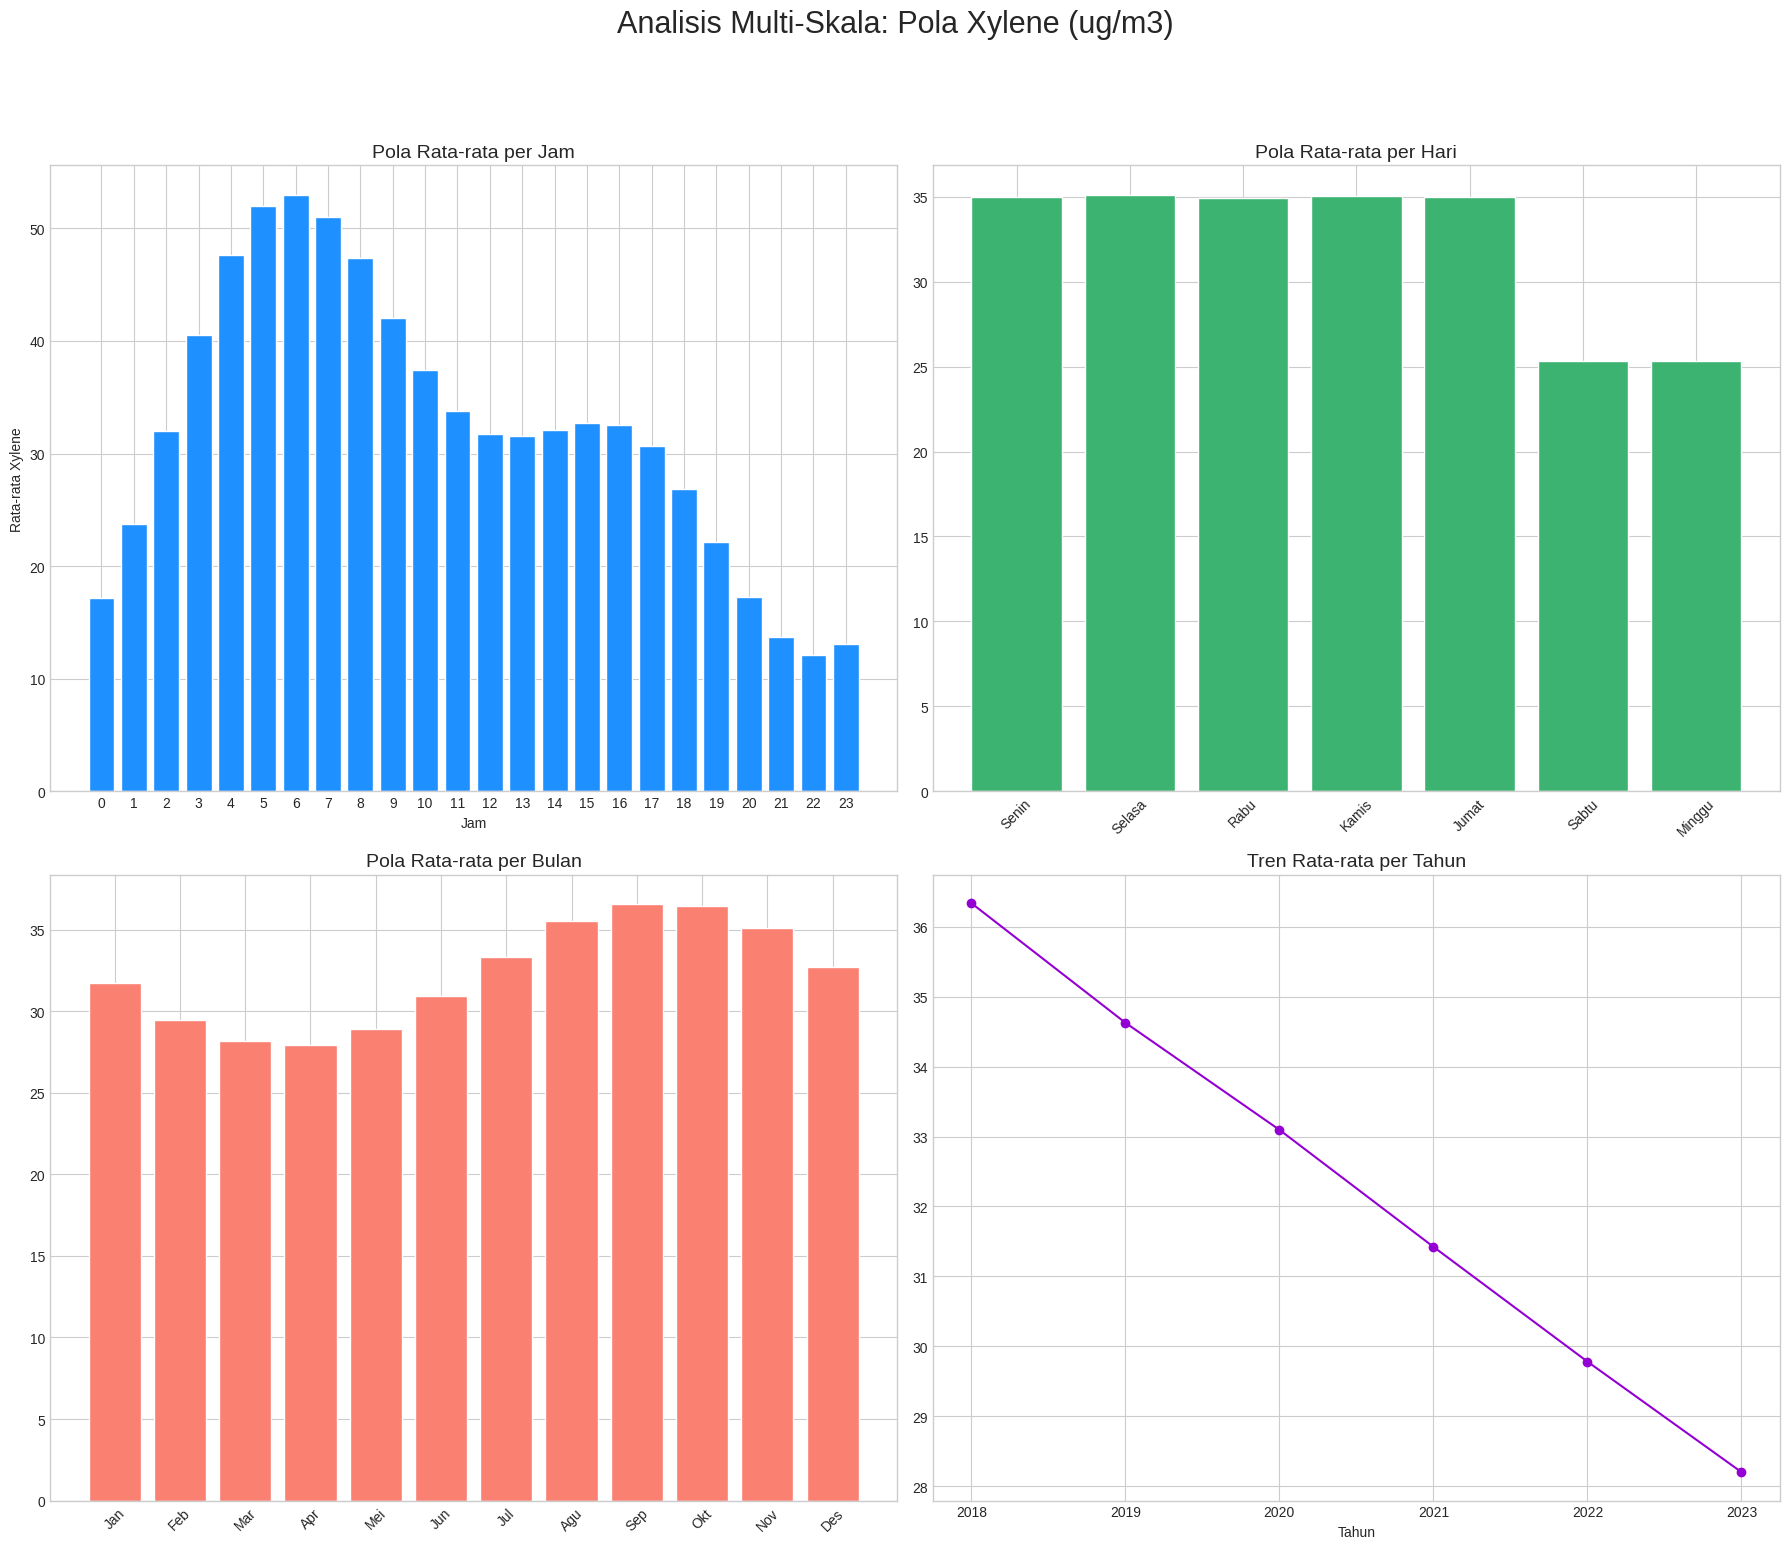


Memulai Analisis untuk Fitur Cuaca...
-- Menganalisis fitur: Temp (degree C)


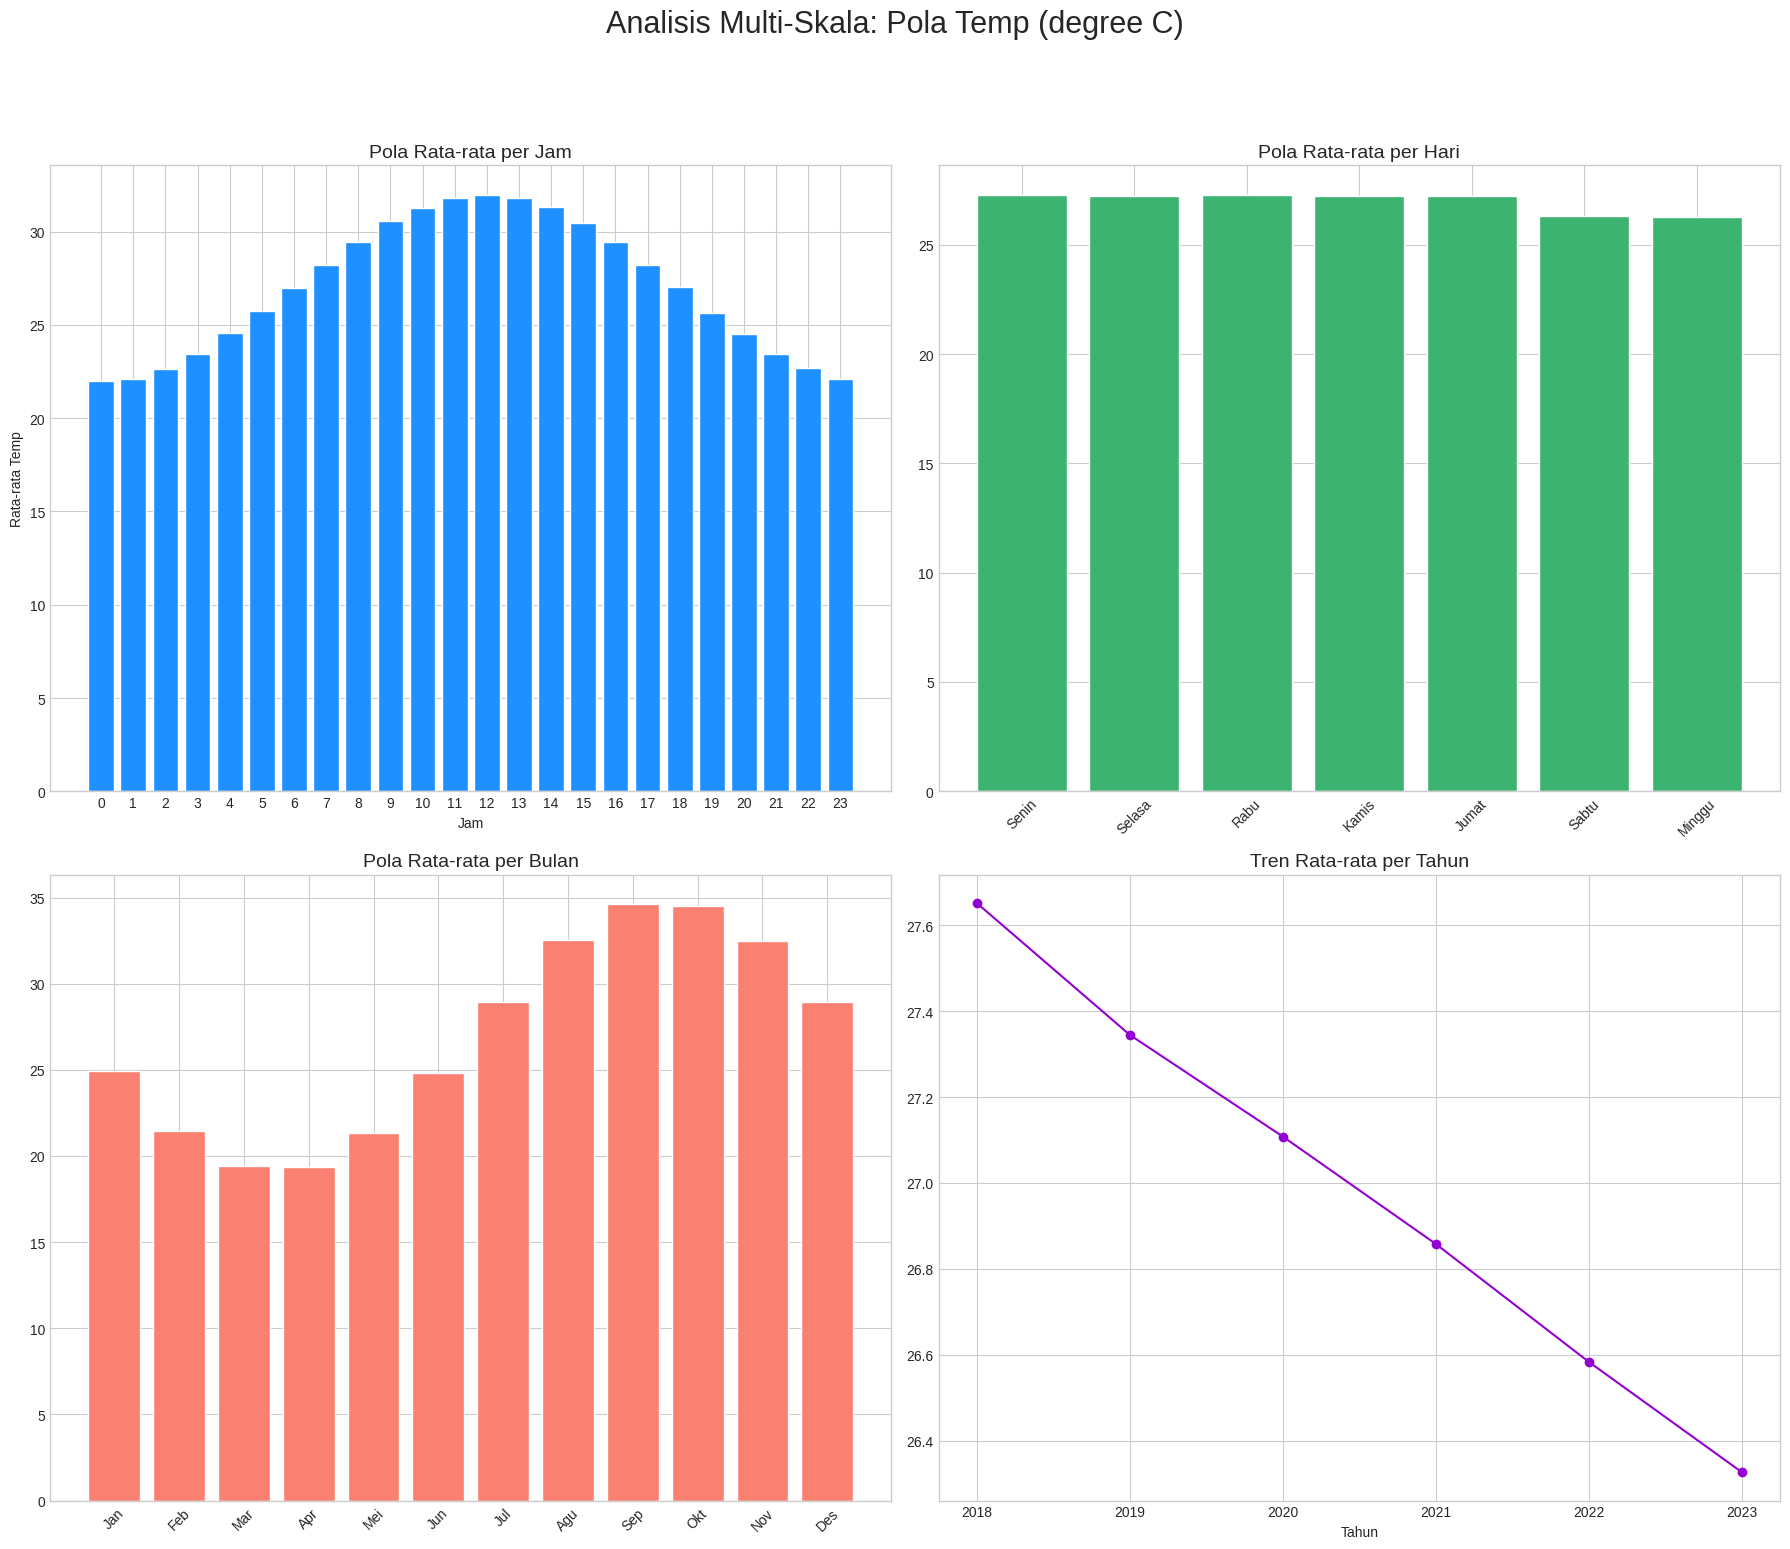

-- Menganalisis fitur: RH (%)


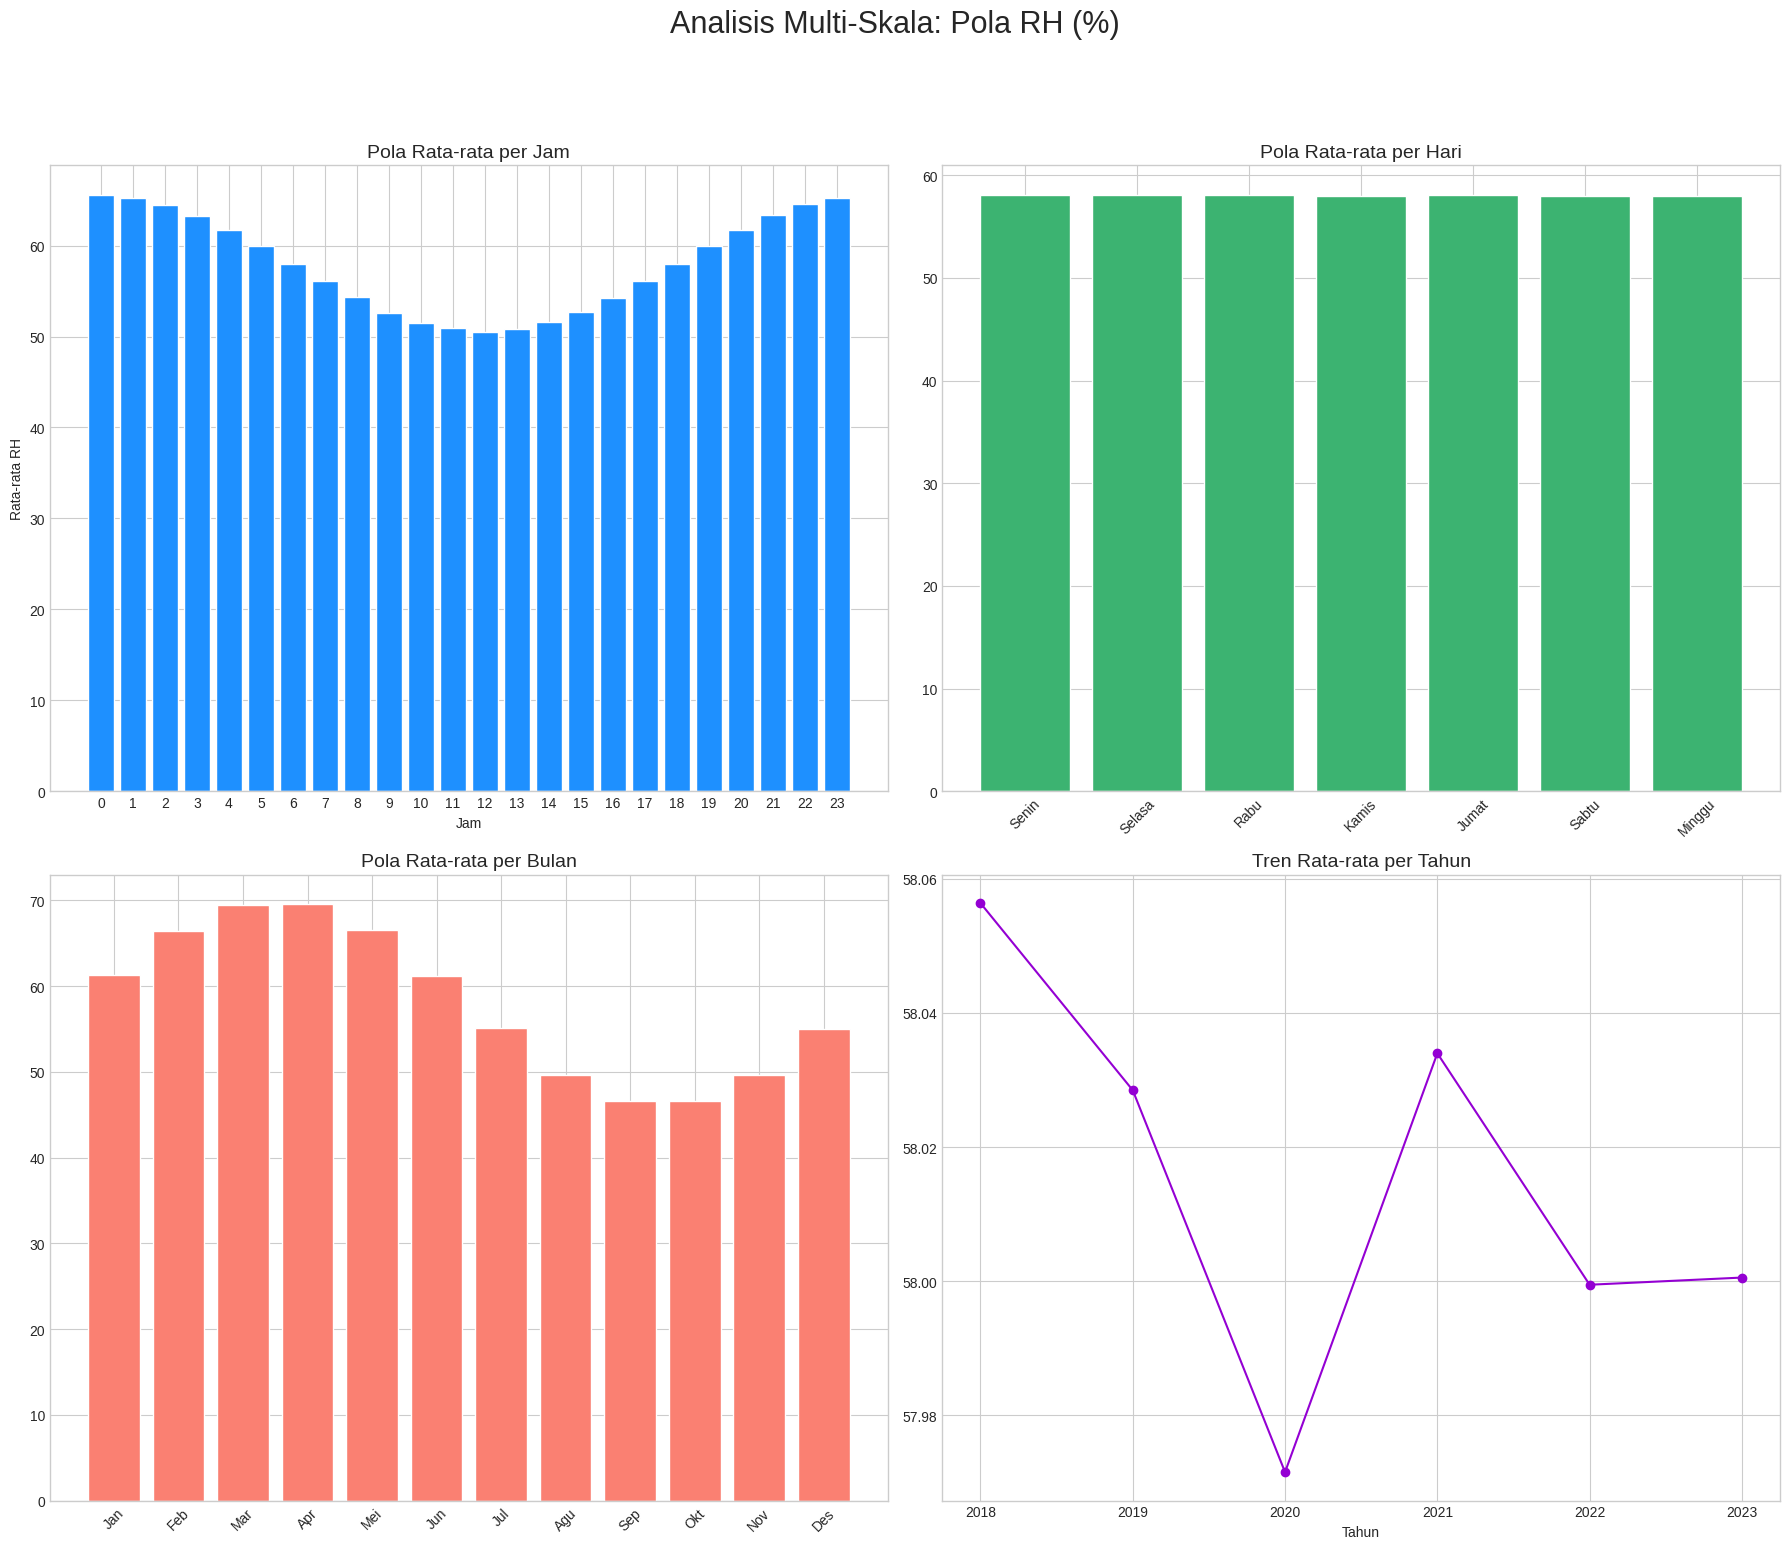

-- Menganalisis fitur: WS (m/s)


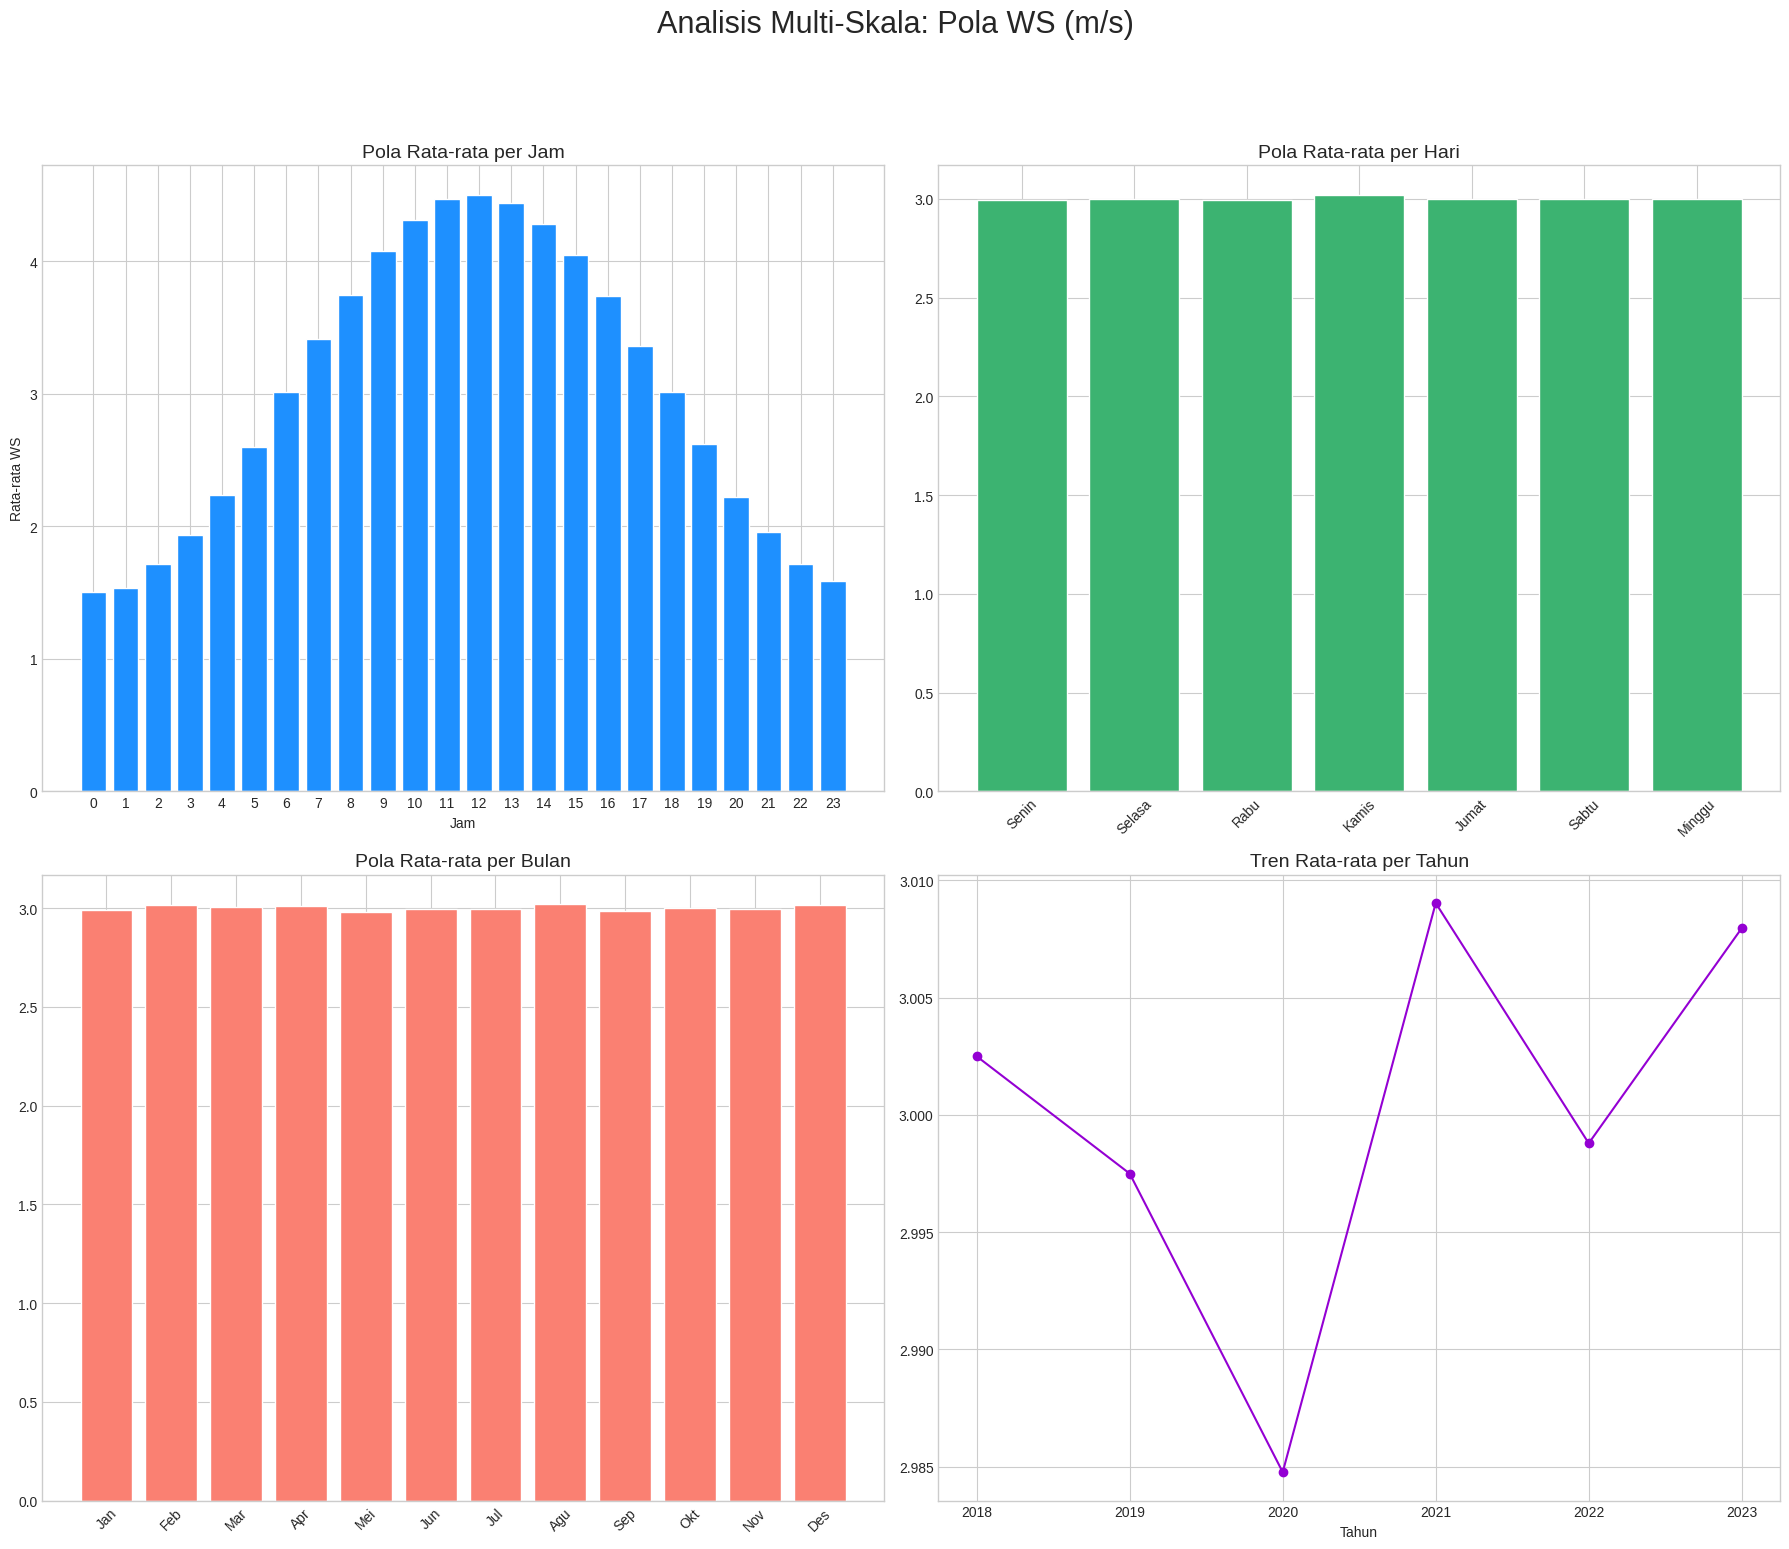

-- Menganalisis fitur: WD (degree)


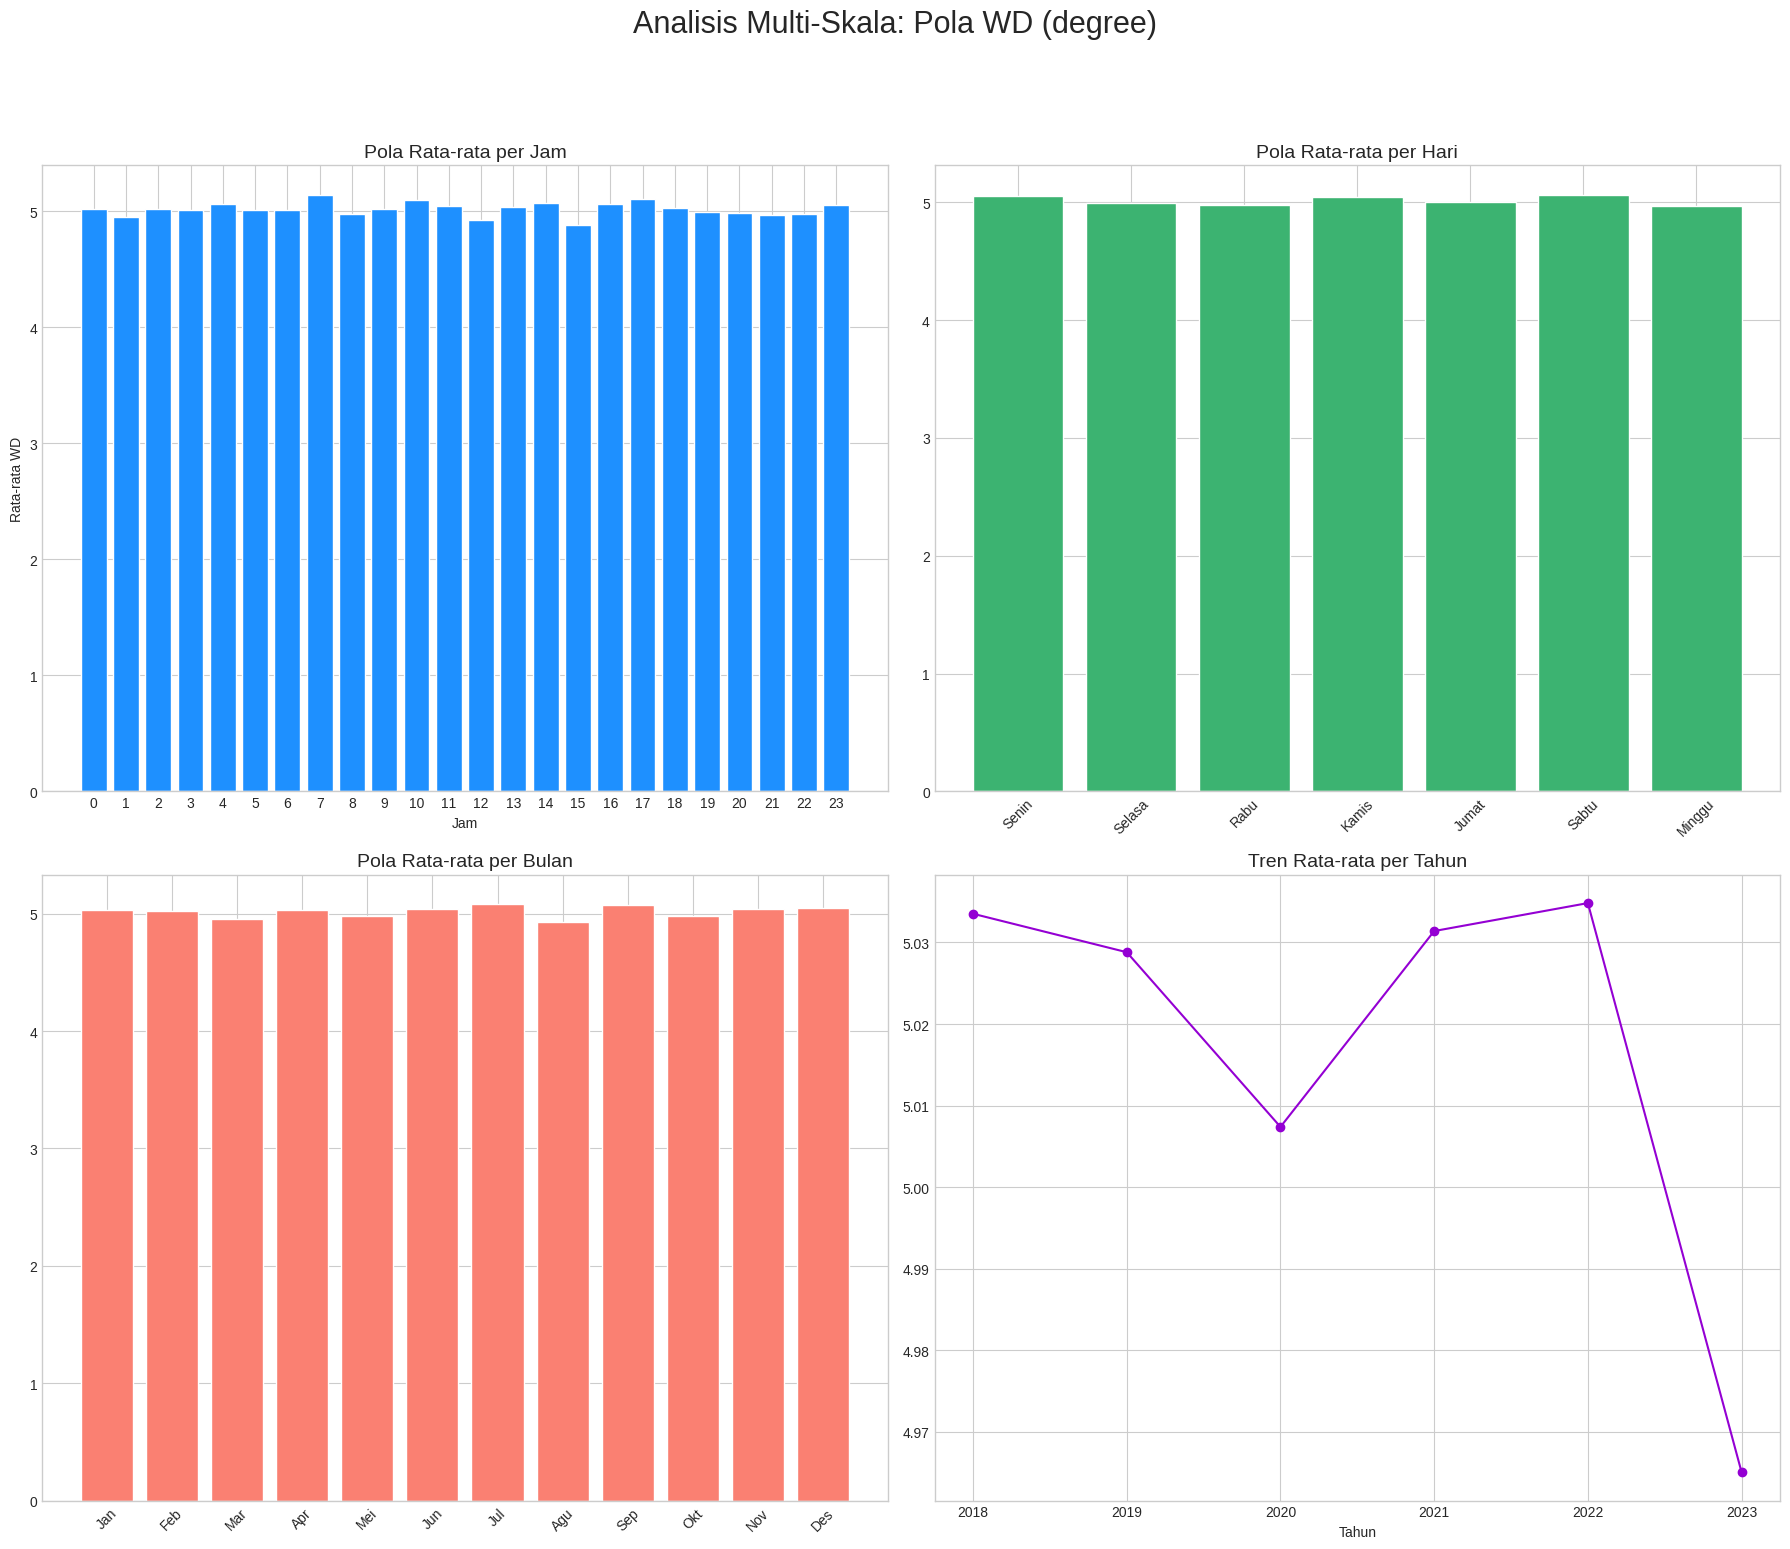

-- Menganalisis fitur: SR (W/mt2)


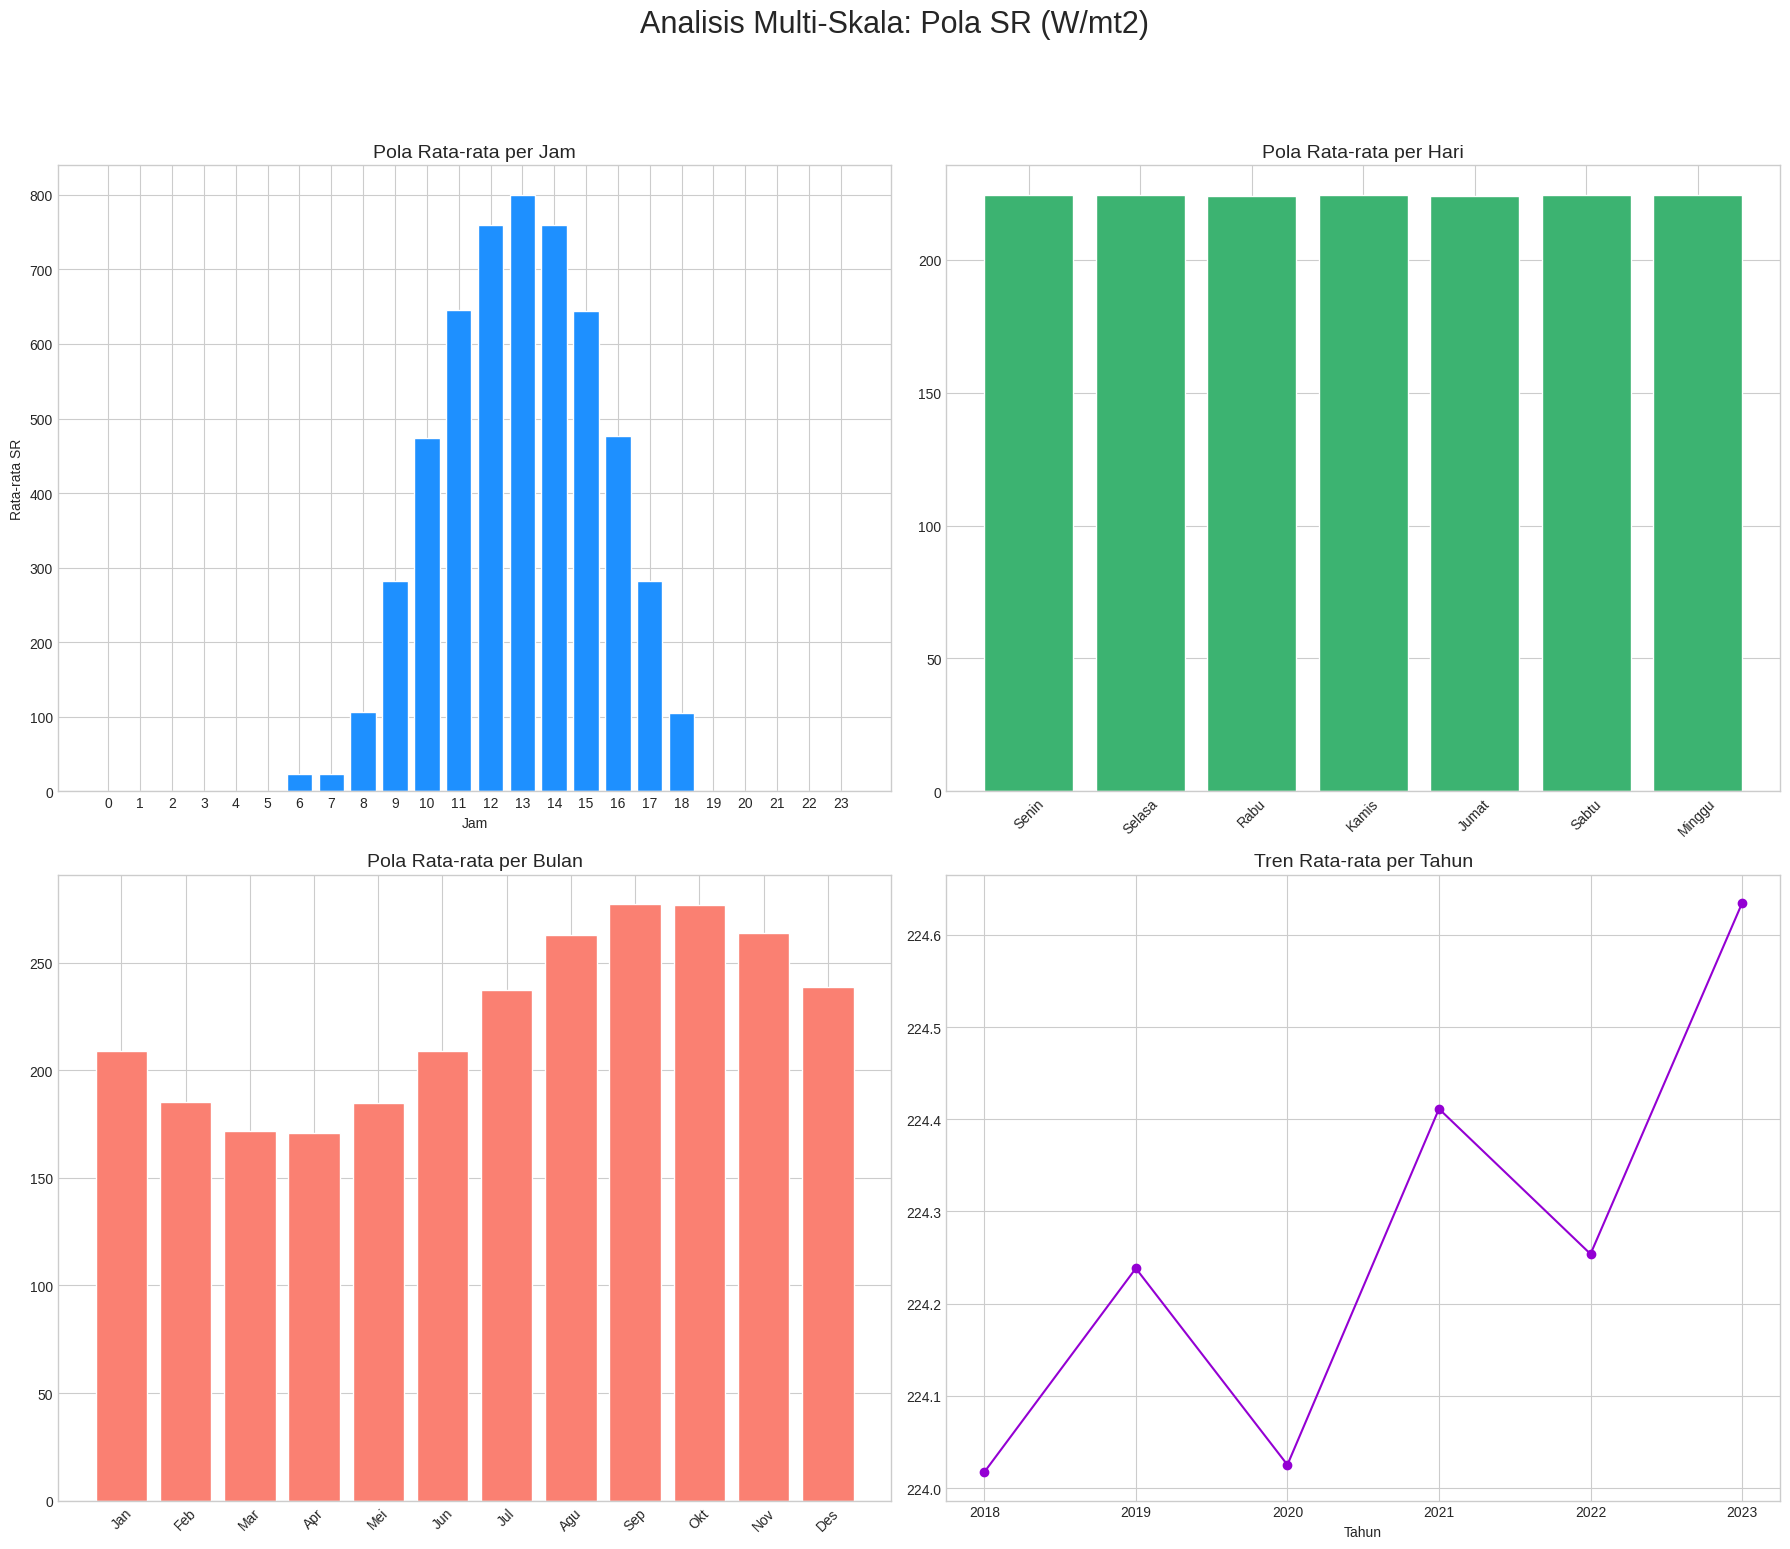

-- Menganalisis fitur: BP (mmHg)


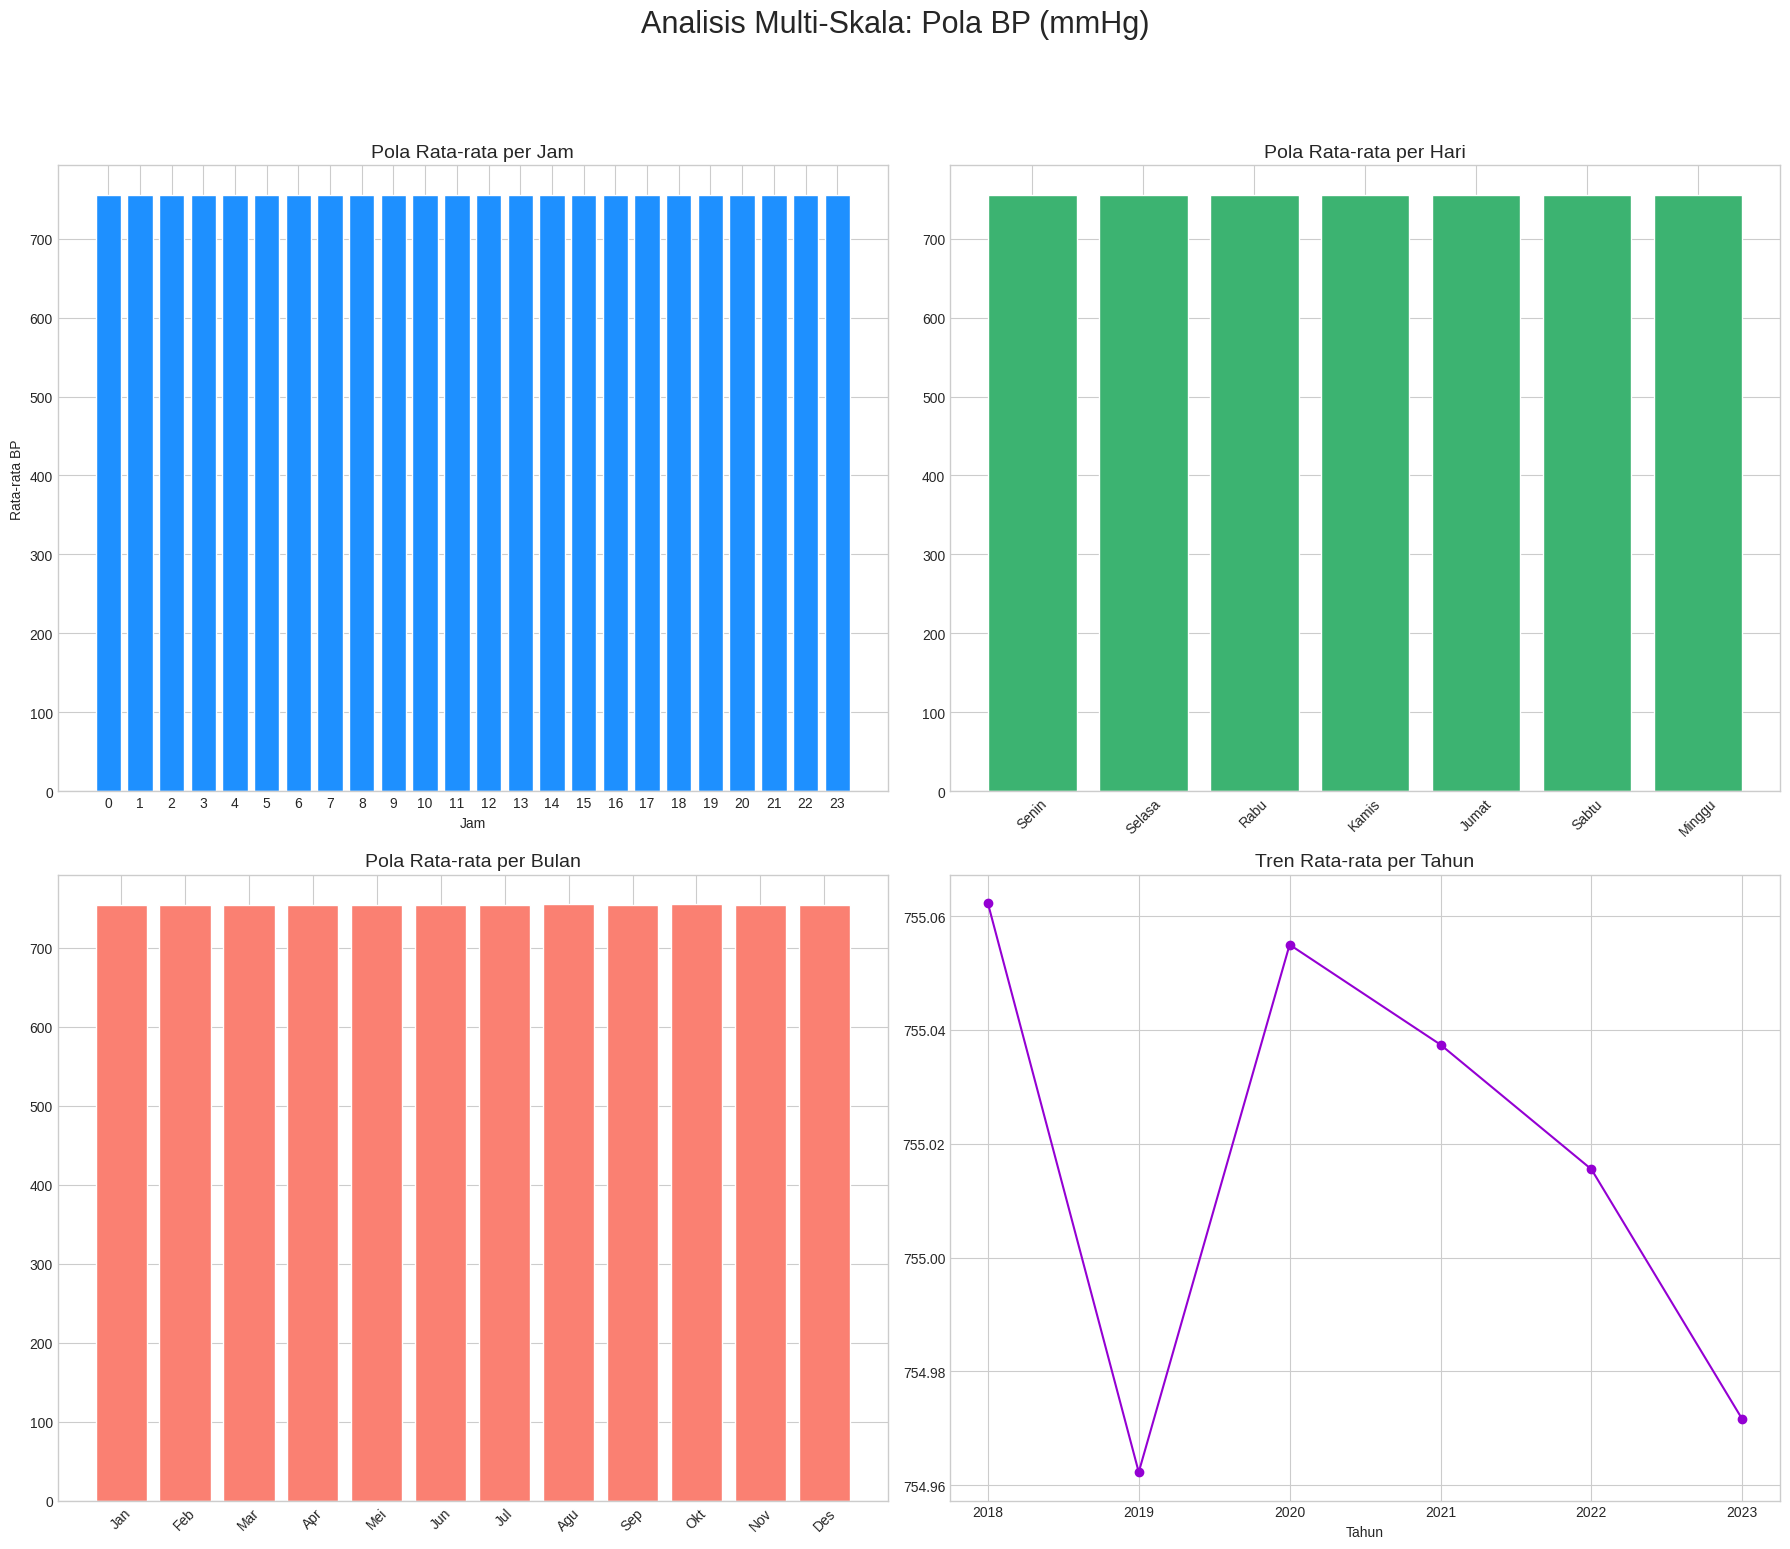

-- Menganalisis fitur: VWS (m/s)


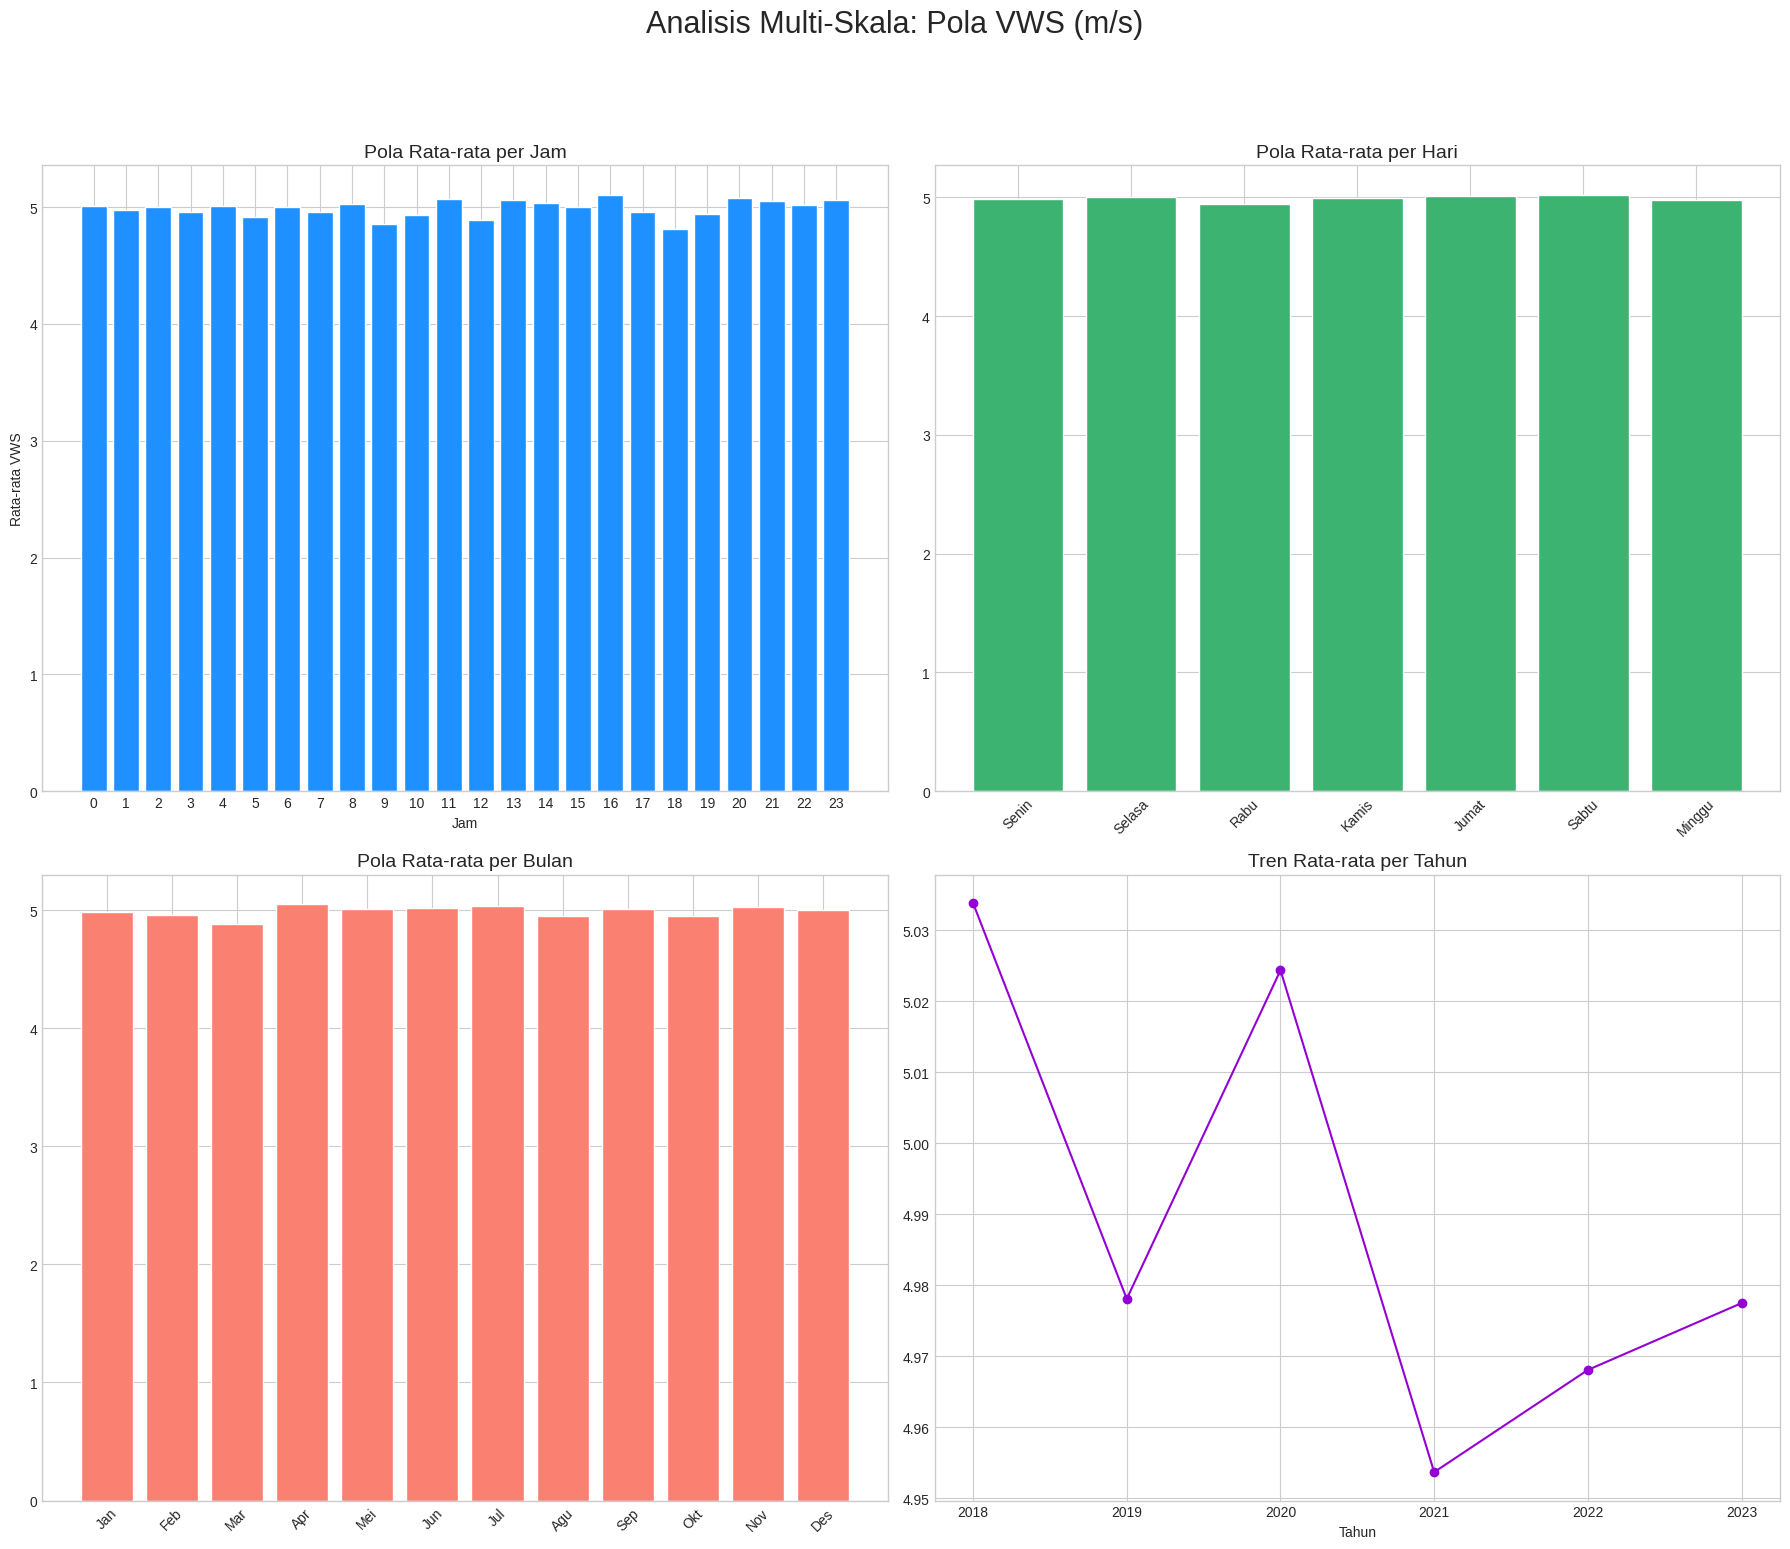

-- Menganalisis fitur: RF (mm)


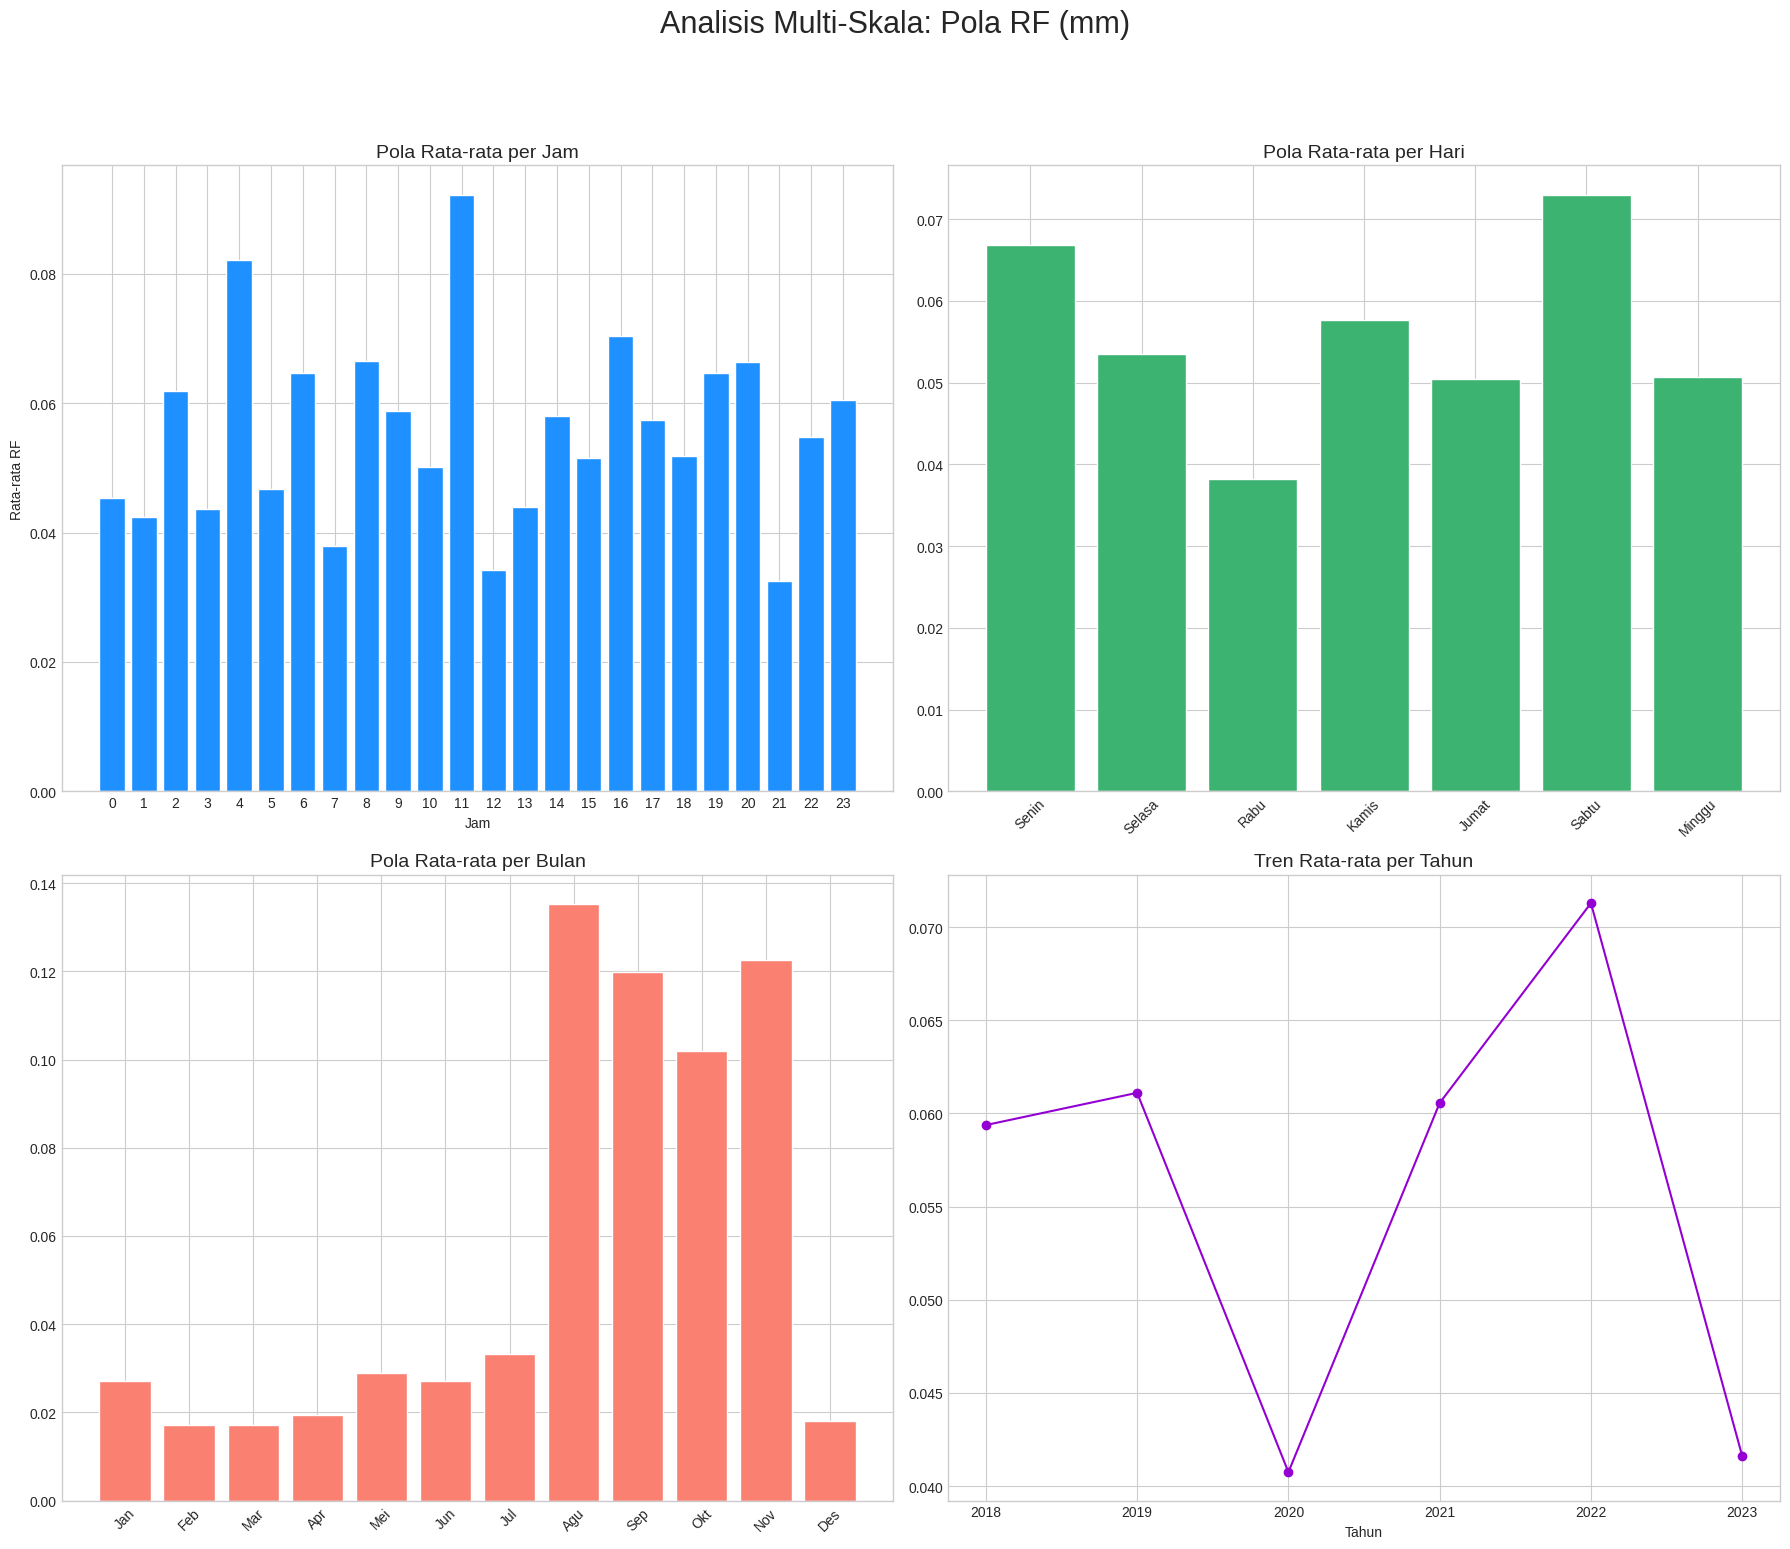


🎉🎉🎉 Analisis untuk semua fitur telah selesai.


In [ ]:
def analyze_feature(input_df, feature_name):
    print(f"-- Menganalisis fitur: {feature_name}")

    df = input_df.copy()

    annual_cycle = np.sin(2 * np.pi * df['datetime'].dt.dayofyear / 365.25)
    daily_cycle_single_peak = -np.cos(2 * np.pi * df['hour'] / 24)
    daily_cycle_double_peak = (np.sin(2 * np.pi * (df['hour'] - 2) / 24) + \
                               np.sin(4 * np.pi * (df['hour'] - 2) / 24) * 0.6)
    weekly_cycle = np.isin(df['day_of_week'], [5, 6])
    long_term_trend = -np.arange(len(df)) / len(df)
    noise = np.random.randn(len(df))
    data = np.zeros(len(df))

    feature_type = 'unknown'
    weather_keywords = ['Temp', 'AT', 'RH', 'SR', 'WS', 'RF', 'BP', 'WD', 'VWS']
    pollutant_keywords = ['PM', 'NO', 'CO', 'Ozone', 'NH3', 'SO2', 'Benzene', 'Toluene', 'Xylene']

    if any(keyword in feature_name for keyword in weather_keywords):
        feature_type = 'weather'
    elif any(keyword in feature_name for keyword in pollutant_keywords):
        feature_type = 'pollutant'

    # A. FITUR CUACA
    if feature_type == 'weather':
        if 'Temp' in feature_name or 'AT' in feature_name:
            data = (annual_cycle * -8 + 28 + daily_cycle_single_peak * 5 + weekly_cycle * -1 + long_term_trend * 1.5 + noise * 2)
        elif 'RH' in feature_name:
            temp_data = (annual_cycle * -8 + 28 + daily_cycle_single_peak * 5 + noise * 2)
            data = 100 - (temp_data * 1.5)
            data = np.clip(data, 10, 100)
        elif 'SR' in feature_name:
            sr_daily = np.maximum(0, -np.cos(2 * np.pi * (df['hour']-1) / 24))**1.5
            data = sr_daily * (800 + annual_cycle * -200) + noise * 30
            data[df['hour'].isin(range(0, 6)) | df['hour'].isin(range(19, 24))] = 0
        elif 'WS' in feature_name and 'VWS' not in feature_name:
            data = (daily_cycle_single_peak + 2) * 1.5 + noise * 0.8
        elif 'RF' in feature_name:
            rainy_season_prob = (annual_cycle < -0.5) * 0.02
            base_prob = 0.005
            rain_event = np.random.random(len(df)) < (base_prob + rainy_season_prob)
            data = np.where(rain_event, np.random.exponential(5, len(df)), 0)
        else:
            data = np.random.rand(len(df)) * 10 + (750 if 'BP' in feature_name else 0)

    # B. FITUR POLUTAN
    elif feature_type == 'pollutant':
        if 'Ozone' in feature_name:
            data = (daily_cycle_single_peak * 25 + (annual_cycle * -1) * 15 + 60 + weekly_cycle * -5 + noise * 8)
        else:
            data = (daily_cycle_double_peak * 15 + weekly_cycle * -10 + annual_cycle * -5 + 40 + long_term_trend * 10 + noise * 5)

    df[feature_name] = np.abs(data)



    fig, axes = plt.subplots(2, 2, figsize=(18, 15))
    fig.suptitle(f'Analisis Multi-Skala: Pola {feature_name}', fontsize=22, y=1.03)
    plt.style.use('seaborn-v0_8-whitegrid')

    # Plotting (per jam, hari, bulan, tahun)
    hourly_avg = df.groupby('hour')[feature_name].mean()
    axes[0, 0].bar(hourly_avg.index, hourly_avg.values, color='dodgerblue')
    axes[0, 0].set_title('Pola Rata-rata per Jam', fontsize=14)
    axes[0, 0].set_xlabel('Jam')
    axes[0, 0].set_ylabel(f'Rata-rata {feature_name.split(" ")[0]}')
    axes[0, 0].set_xticks(range(0, 24))

    weekly_avg = df.groupby('day_of_week')[feature_name].mean()
    day_names = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
    axes[0, 1].bar(day_names, weekly_avg, color='mediumseagreen')
    axes[0, 1].set_title('Pola Rata-rata per Hari', fontsize=14)
    axes[0, 1].tick_params(axis='x', rotation=45)

    monthly_avg = df.groupby('month')[feature_name].mean()
    month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des']
    axes[1, 0].bar(month_names, monthly_avg, color='salmon')
    axes[1, 0].set_title('Pola Rata-rata per Bulan', fontsize=14)
    axes[1, 0].tick_params(axis='x', rotation=45)

    yearly_avg = df.groupby('year')[feature_name].mean()
    axes[1, 1].plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', color='darkviolet')
    axes[1, 1].set_title('Tren Rata-rata per Tahun', fontsize=14)
    axes[1, 1].set_xticks(df['year'].unique())
    axes[1, 1].set_xlabel('Tahun')

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    plt.show()

if __name__ == "__main__":
    print("Membuat DataFrame waktu dasar (2018–2023)...")
    print("\n" + "="*50)
    print("Memulai Analisis untuk Fitur Polutan...")
    print("="*50)
    for feature in pollutant_features:
        try:
            analyze_feature(df_time, feature)
        except Exception as e:
            print(f"Gagal menganalisis {feature}: {e}")

    print("\n" + "="*50)
    print("Memulai Analisis untuk Fitur Cuaca...")
    print("="*50)
    for feature in weather_features:
        try:
            analyze_feature(df_time, feature)
        except Exception as e:
            print(f"Gagal menganalisis {feature}: {e}")

    print("\n🎉🎉🎉 Analisis untuk semua fitur telah selesai.")

# **Visualisasi Per Jam**

**Karena dalam analisis ini digunakan jendela waktu 5 jam (window = 5), maka pendekatan yang paling relevan adalah melihat pola per jam. Visualisasi per jam memberikan wawasan penting mengenai fluktuasi**

Memulai proses pembuatan grafik...
Menampilkan plot untuk 'PM2.5 (ug/m3)'...


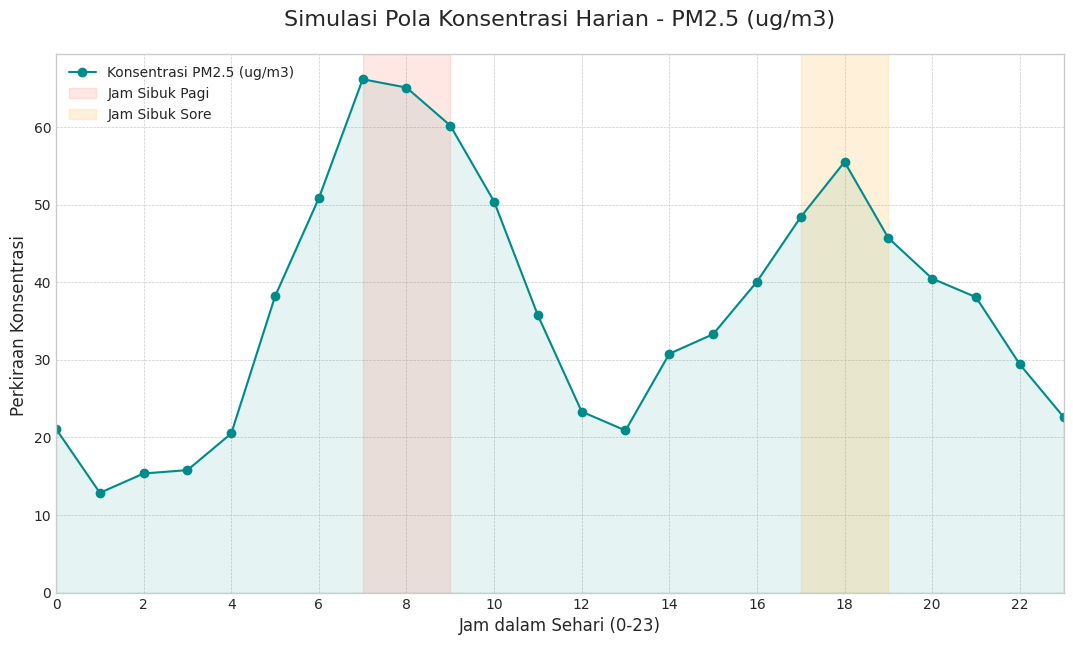

Menampilkan plot untuk 'PM10 (ug/m3)'...


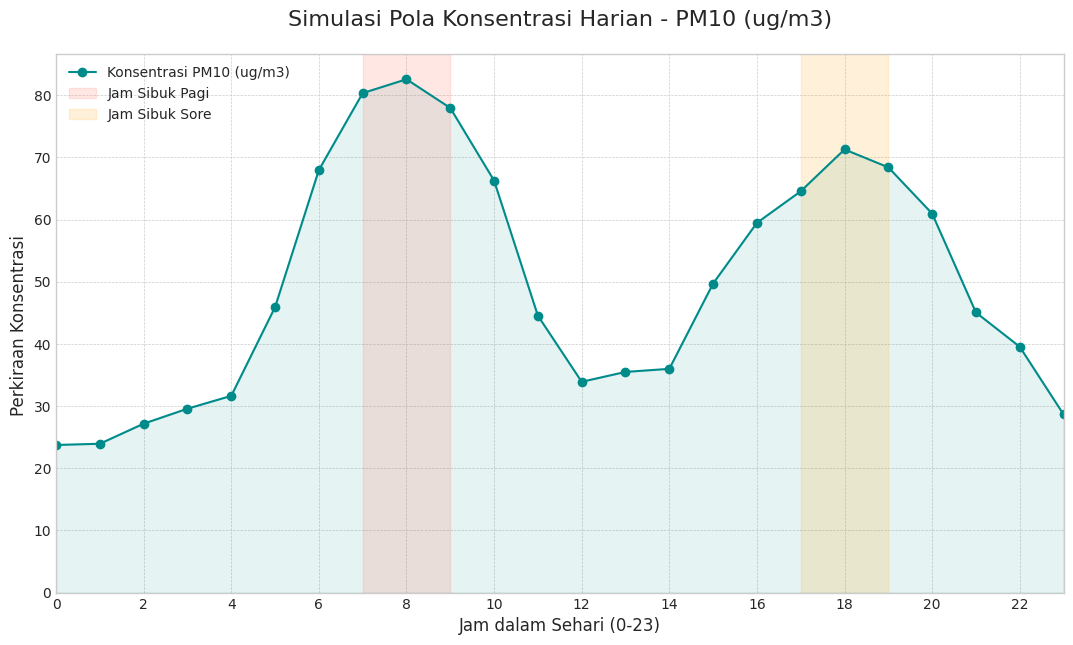

Menampilkan plot untuk 'NO (ug/m3)'...


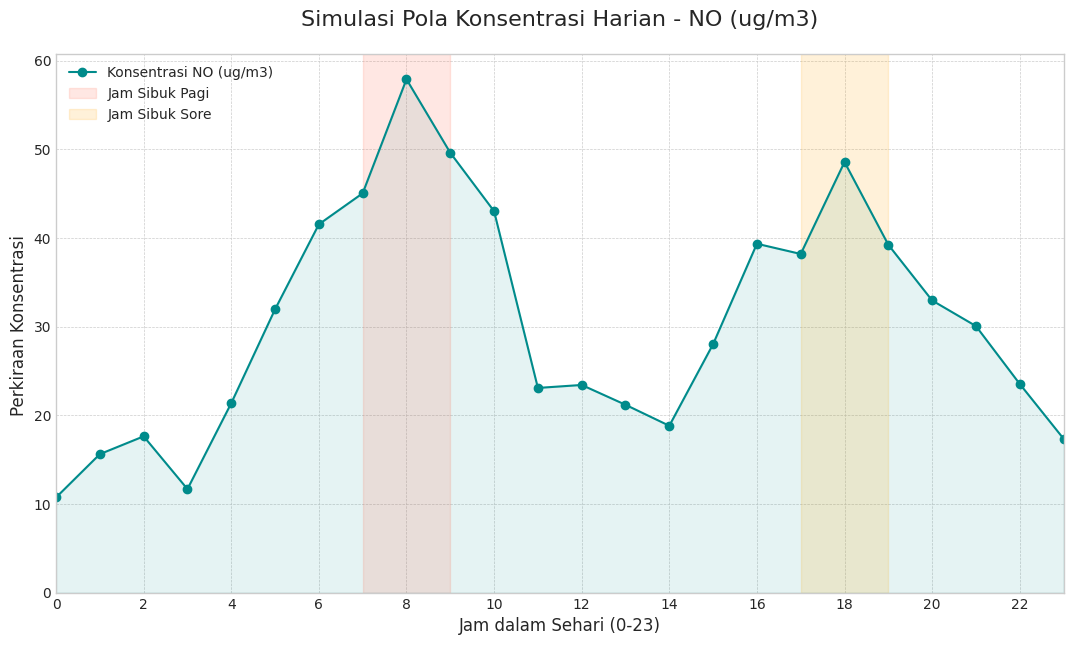

Menampilkan plot untuk 'NO2 (ug/m3)'...


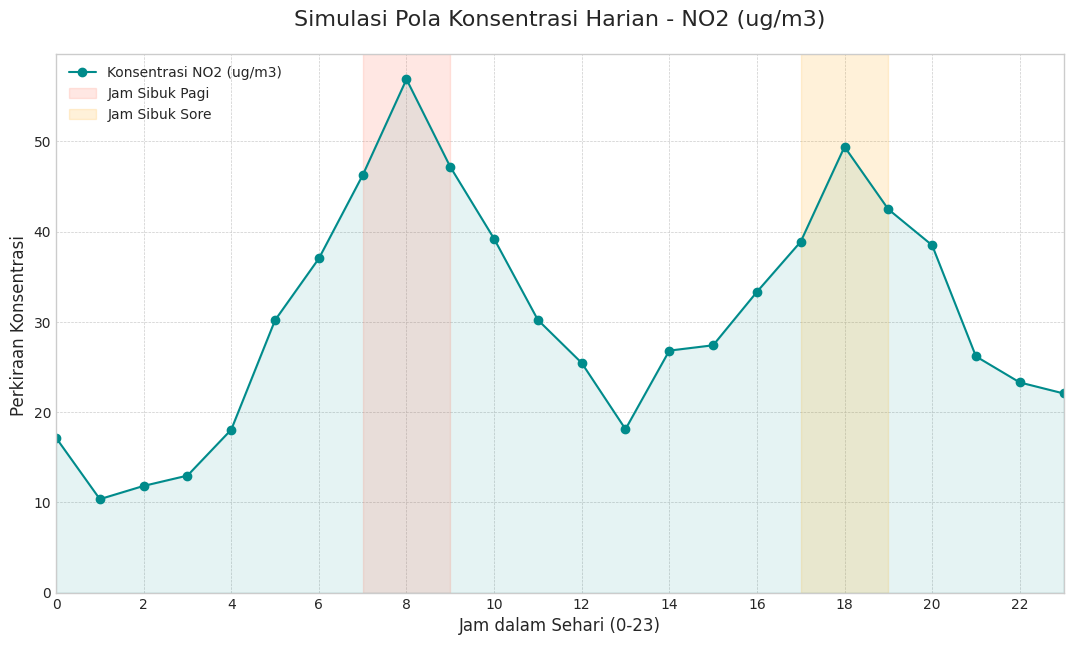

Menampilkan plot untuk 'NOx (ppb)'...


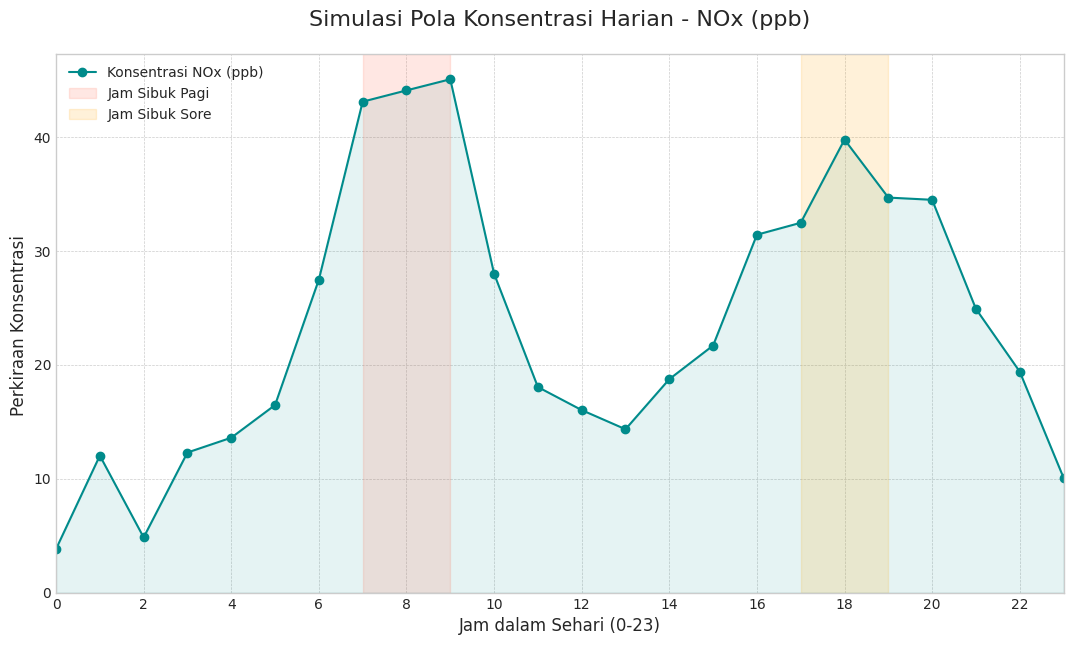

Menampilkan plot untuk 'NH3 (ug/m3)'...


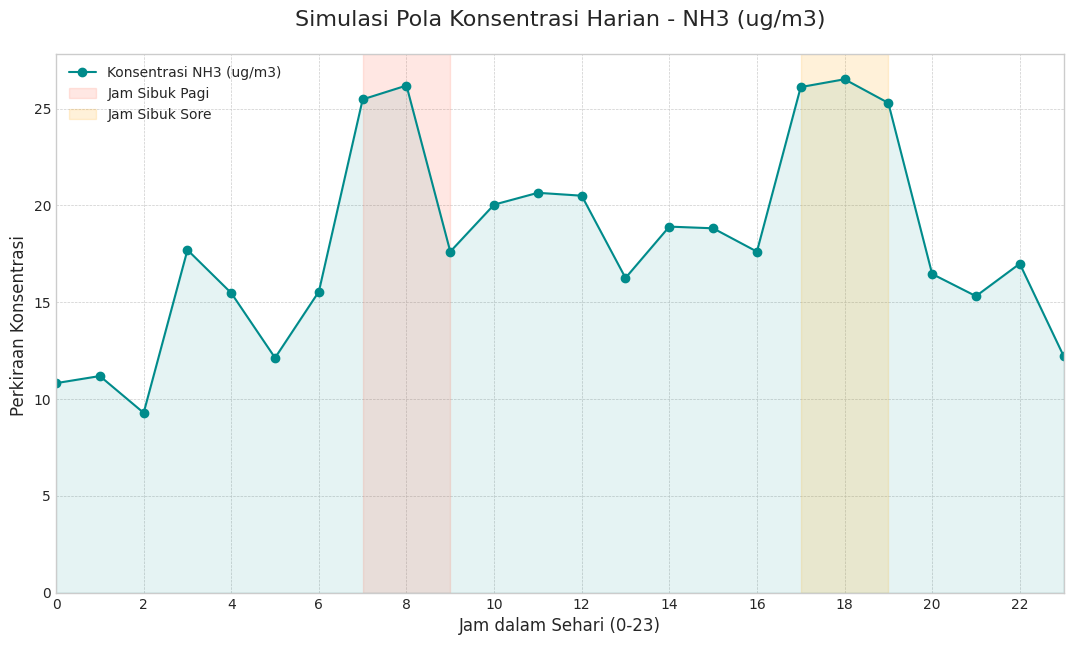

Menampilkan plot untuk 'SO2 (ug/m3)'...


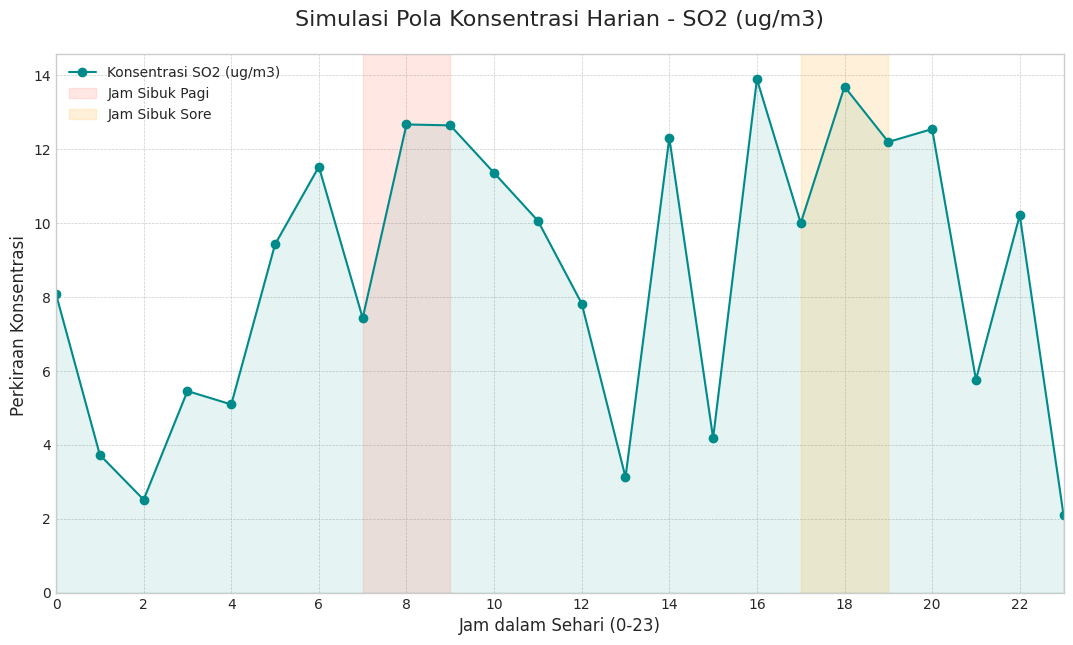

Menampilkan plot untuk 'CO (mg/m3)'...


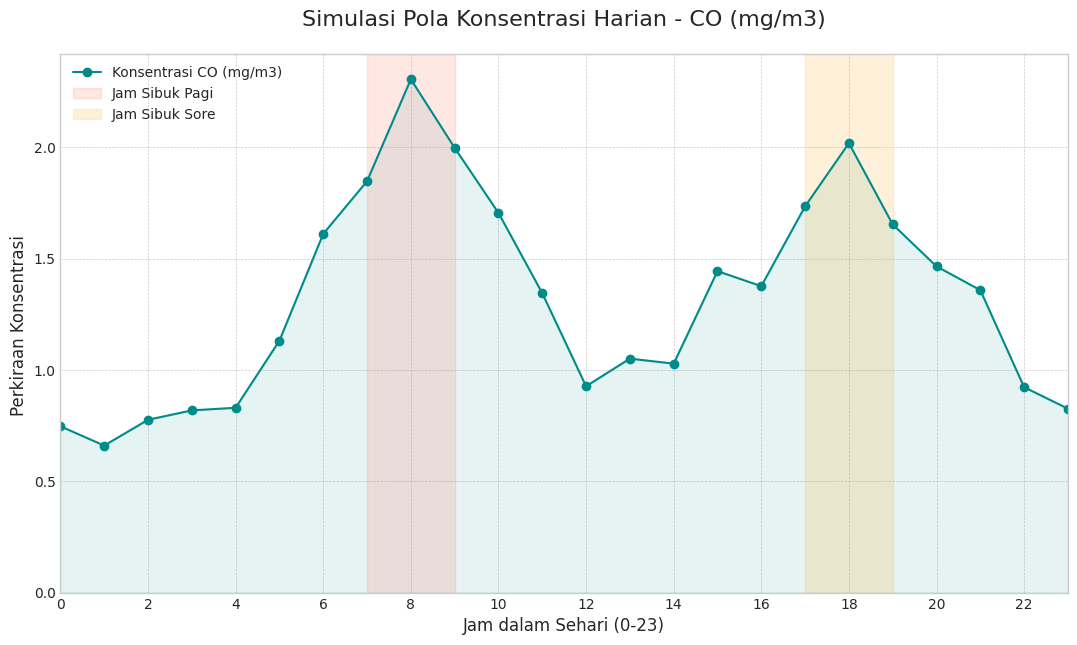

Menampilkan plot untuk 'Ozone (ug/m3)'...


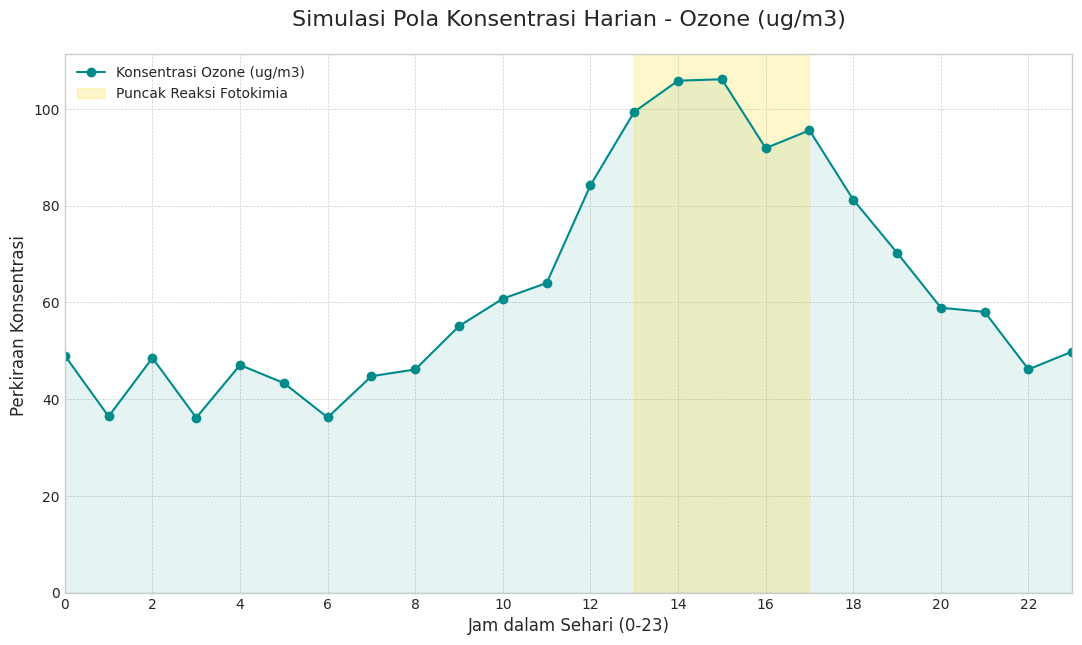

Menampilkan plot untuk 'Benzene (ug/m3)'...


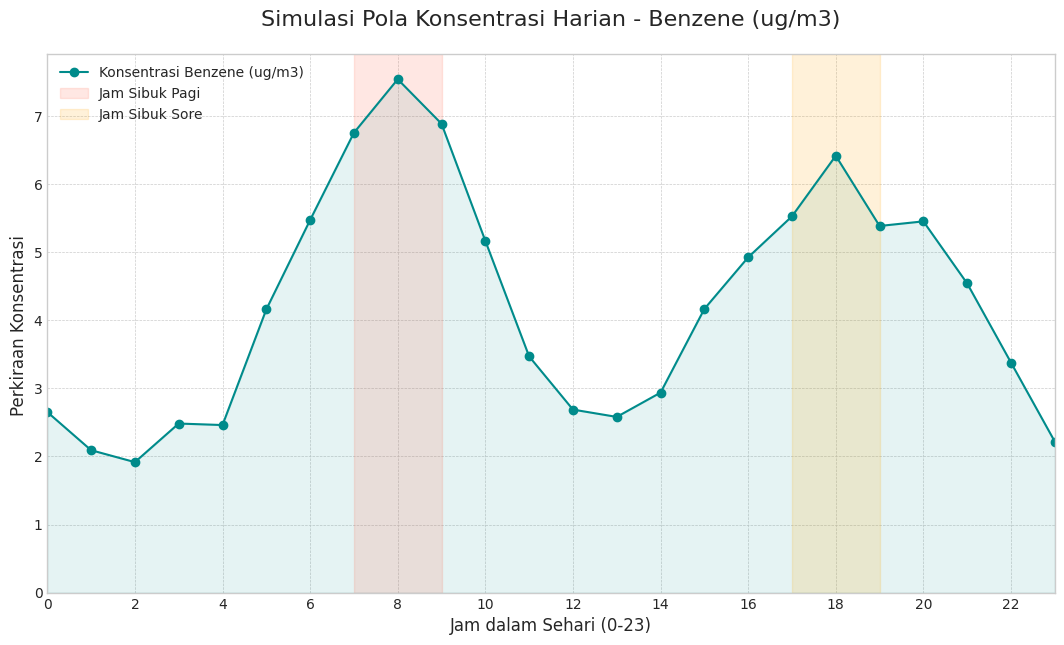

Menampilkan plot untuk 'Toluene (ug/m3)'...


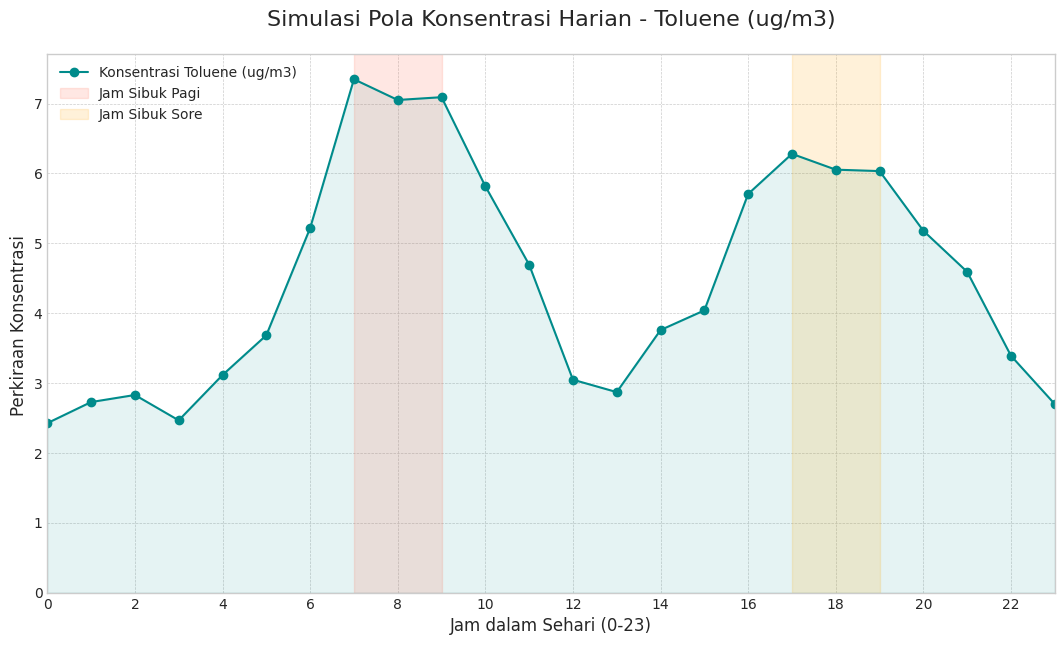

Menampilkan plot untuk 'Eth-Benzene (ug/m3)'...


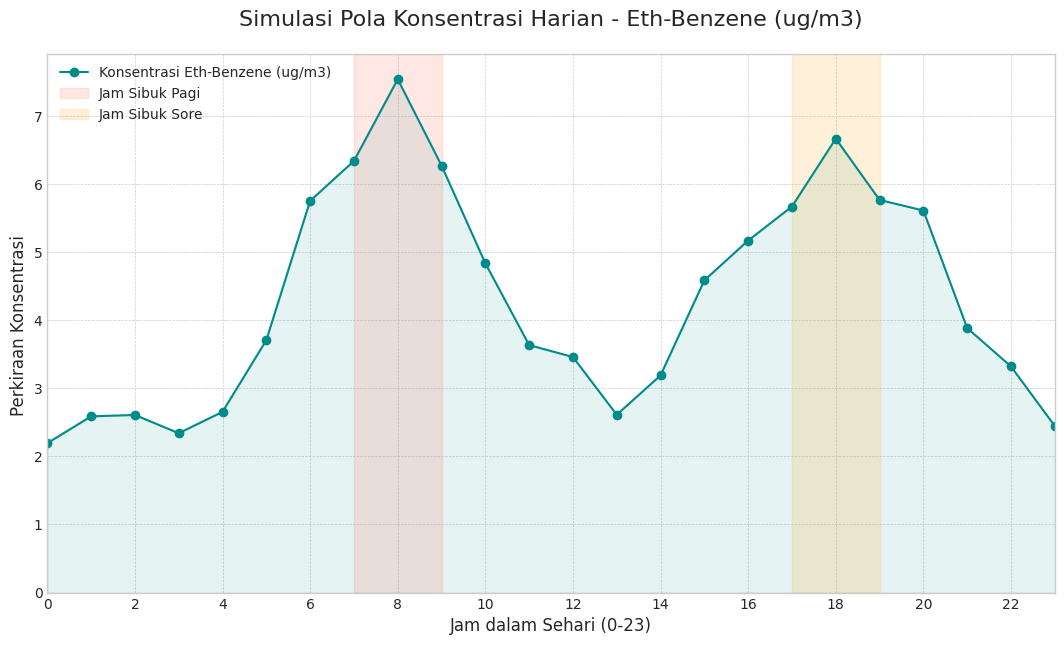

Menampilkan plot untuk 'MP-Xylene (ug/m3)'...


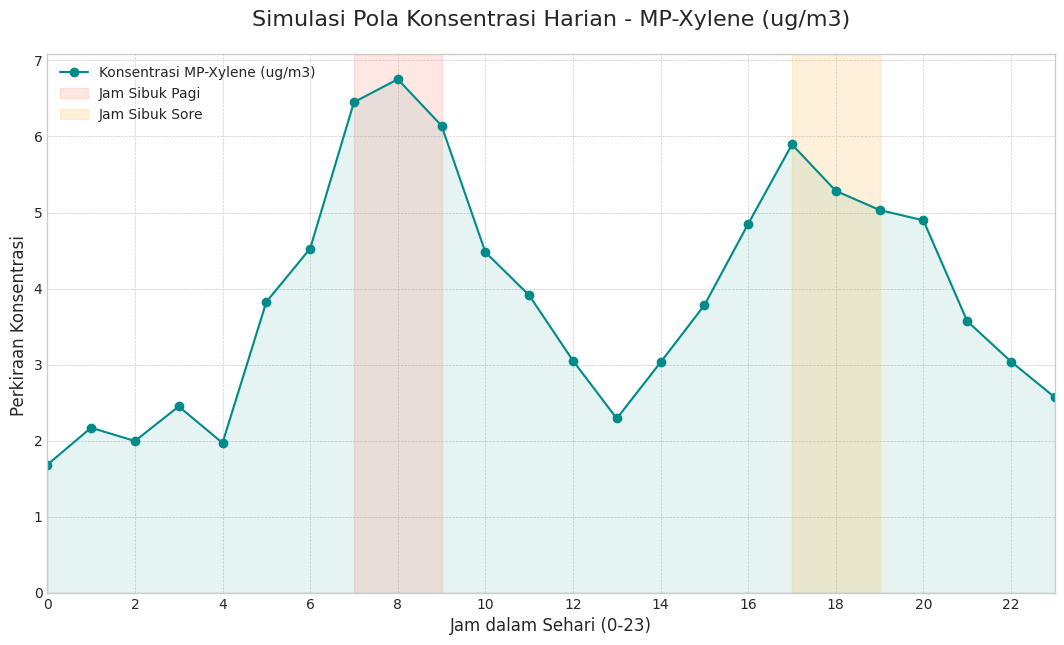

Menampilkan plot untuk 'Xylene (ug/m3)'...


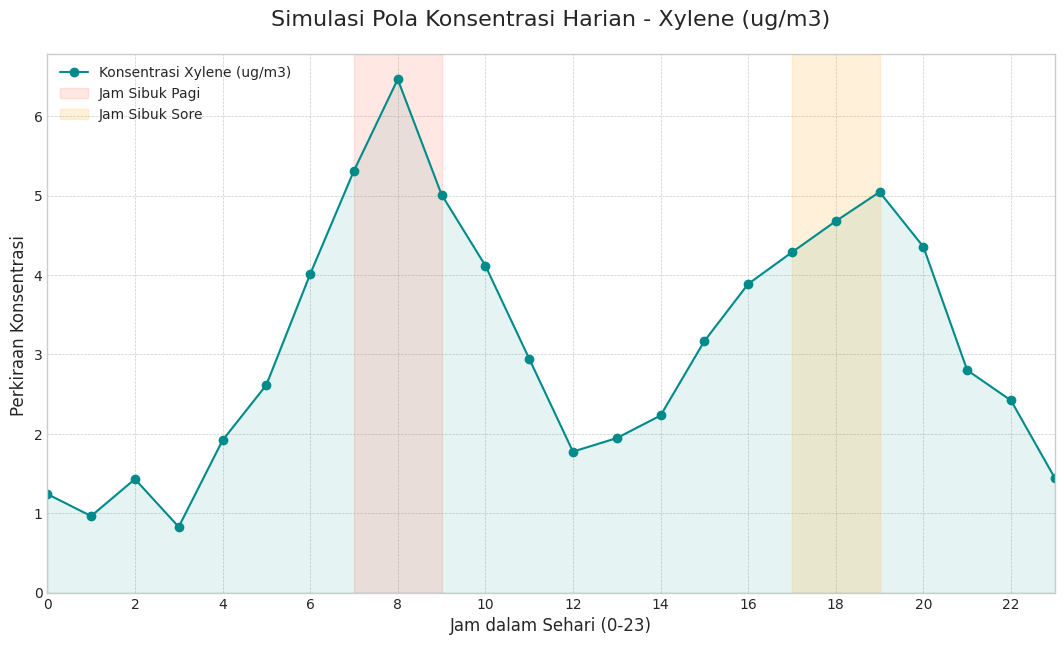


🎉 Selesai! Semua 14 grafik telah ditampilkan.


In [ ]:
def plot_pollutant_pattern(pollutant_column_name):
    try:
        match = re.match(r'(.+?)\s*\((.+)\)', pollutant_column_name)
        if match:
            pollutant_name = match.group(1).strip()
            unit = match.group(2).strip()
        else:
            pollutant_name = pollutant_column_name
            unit = 'N/A'

        if 'ug/m3' in unit:
            display_unit = r'$µg/m³$'
        elif 'mg/m3' in unit:
            display_unit = r'$mg/m³$'
        else:
            display_unit = f'({unit})'
    except Exception:
        pollutant_name = pollutant_column_name
        unit = 'N/A'
        display_unit = ''

    sns.set_style("whitegrid")
    jam = np.arange(24)

    base_min, base_max = 10, 20
    peak1_hour, peak1_height, peak1_width = 8, 50, 2.0  # Puncak pagi
    peak2_hour, peak2_height, peak2_width = 18, 35, 2.5 # Puncak sore
    noise_level = 5

    # Kustomisasi parameter berdasarkan jenis polutan
    if 'PM2.5' in pollutant_name:
        base_min, base_max = 15, 25
    elif 'PM10' in pollutant_name:
        base_min, base_max = 20, 40; peak1_height, peak2_height = 60, 45
    elif any(p in pollutant_name for p in ['NO', 'NO2', 'NOx']):
        base_min, base_max = 5, 15; peak1_height, peak2_height = 40, 30
    elif 'NH3' in pollutant_name:
        base_min, base_max = 8, 15; peak1_height, peak2_height = 10, 8
    elif 'SO2' in pollutant_name:
        base_min, base_max = 4, 10; peak1_height, peak2_height = 5, 5
    elif 'CO' in pollutant_name:
        base_min, base_max = 0.5, 1.0; peak1_height, peak2_height = 1.5, 1.2; noise_level = 0.2
    elif 'Ozone' in pollutant_name:
        base_min, base_max = 30, 50
        peak1_hour, peak1_height, peak1_width = 15, 60, 3.0
        peak2_height = 0
        noise_level = 10
    elif any(p in pollutant_name for p in ['Benzene', 'Toluene', 'Xylene']):
        base_min, base_max = 1, 3; peak1_height, peak2_height = 5, 4; noise_level = 0.5

    konsentrasi_dasar = np.random.uniform(base_min, base_max)
    puncak1 = peak1_height * np.exp(-((jam - peak1_hour)**2) / (2 * peak1_width**2))
    puncak2 = peak2_height * np.exp(-((jam - peak2_hour)**2) / (2 * peak2_width**2))
    noise = np.random.uniform(-noise_level, noise_level, 24)

    konsentrasi = konsentrasi_dasar + puncak1 + puncak2 + noise
    konsentrasi[konsentrasi < 0] = 0

    plt.figure(figsize=(13, 7))
    plt.plot(jam, konsentrasi, marker='o', linestyle='-', color='darkcyan', label=f'Konsentrasi {pollutant_name}')
    plt.fill_between(jam, konsentrasi, color='darkcyan', alpha=0.1)

    plt.title(f'Simulasi Pola Konsentrasi Harian - {pollutant_name}', fontsize=16, pad=20)
    plt.xlabel('Jam dalam Sehari (0-23)', fontsize=12)
    plt.ylabel(f'Perkiraan Konsentrasi {display_unit}', fontsize=12)
    plt.xticks(np.arange(0, 25, 2))
    plt.xlim(0, 23)
    plt.ylim(bottom=0)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Anotasi dan penandaan area puncak
    if 'Ozone' not in pollutant_name:
        plt.axvspan(7, 9, color='tomato', alpha=0.15, label='Jam Sibuk Pagi')
        plt.axvspan(17, 19, color='orange', alpha=0.15, label='Jam Sibuk Sore')
    else:
        plt.axvspan(13, 17, color='gold', alpha=0.2, label='Puncak Reaksi Fotokimia')

    plt.legend(loc='upper left')

    print(f"Menampilkan plot untuk '{pollutant_name}'...")
    plt.show()


if __name__ == '__main__':

    print("Memulai proses pembuatan grafik...")

    # Melakukan iterasi untuk setiap polutan dalam daftar
    for pollutant in pollutant_features:
        plot_pollutant_pattern(pollutant)

    print(f"\n🎉 Selesai! Semua {len(pollutant_features)} grafik telah ditampilkan.")



**Pola Umum Polutan**

Sebagian besar polutan yang ditampilkan, seperti **PM2.5, PM10, CO, NO, NOx, Benzene, Toluene,Eth-Benzene, Xylene, MP-Xylene dan SO2**, menunjukkan pola harian yang sangat mirip dan jelas, yang dikenal sebagai **pola bimodal (dua puncak)**.

* **Puncak Pagi:** Konsentrasi polutan-polutan ini mulai meningkat tajam sekitar jam 5-6 pagi dan mencapai puncaknya pada **"Jam Sibuk Pagi" (sekitar jam 7-9 pagi)**. Hal ini sangat terkait dengan peningkatan volume kendaraan bermotor dan aktivitas industri saat orang-orang mulai berangkat kerja dan beraktivitas.
* **Penurunan Siang Hari:** Menjelang tengah hari, konsentrasi cenderung menurun. Ini disebabkan oleh meningkatnya suhu dan radiasi matahari yang menyebabkan atmosfer menjadi lebih tidak stabil, sehingga polutan lebih mudah tersebar ke atas (terdispersi).
* **Puncak Sore:** Konsentrasi kembali naik pada sore hari dan mencapai puncak kedua pada **"Jam Sibuk Sore" (sekitar jam 5-7 sore)**, bertepatan dengan jam pulang kerja yang kembali meningkatkan volume lalu lintas.
* **Penurunan Malam Hari:** Konsentrasi perlahan-lahan menurun sepanjang malam hingga mencapai titik terendah pada dini hari, saat aktivitas manusia dan lalu lintas berada pada level minimal.

Pola ini menunjukkan bahwa **sumber utama polutan-polutan tersebut adalah aktivitas manusia, terutama dari sektor transportasi.**

**Pola Khusus Ozon (O3)**

Grafik **Ozon (O3)** menunjukkan pola yang sangat berbeda dan hampir berkebalikan dari polutan lainnya.

* Ozon adalah **polutan sekunder**, yang berarti tidak dipancarkan secara langsung dari sumber polusi. Ozon terbentuk di atmosfer melalui **reaksi fotokimia** antara polutan prekursor (pendahulunya), yaitu **NOx** dan senyawa organik volatil (seperti Benzene dan Toluene), dengan bantuan **sinar matahari yang kuat**.
* Oleh karena itu, konsentrasi Ozon rendah di pagi hari saat polutan prekursornya baru mulai menumpuk.
* Konsentrasinya mulai meningkat pesat menjelang siang dan mencapai puncaknya pada sore hari **(sekitar jam 1-4 sore)**, saat intensitas radiasi matahari paling maksimal untuk memicu reaksi fotokimia. Area ini ditandai sebagai **"Puncak Reaksi Fotokimia"** pada grafik.
* Setelah matahari terbenam, reaksi pembentukan Ozon berhenti dan konsentrasinya perlahan menurun sepanjang malam.

Secara singkat, grafik-grafik ini secara kolektif menggambarkan bagaimana **aktivitas lalu lintas di jam sibuk pagi dan sore menjadi sumber utama polusi udara**, sementara **sinar matahari di siang hari mengubah polusi tersebut menjadi jenis polutan lain seperti Ozon.**

Memulai proses pembuatan grafik fitur cuaca...
Menampilkan plot untuk 'Temp (degree C)'...


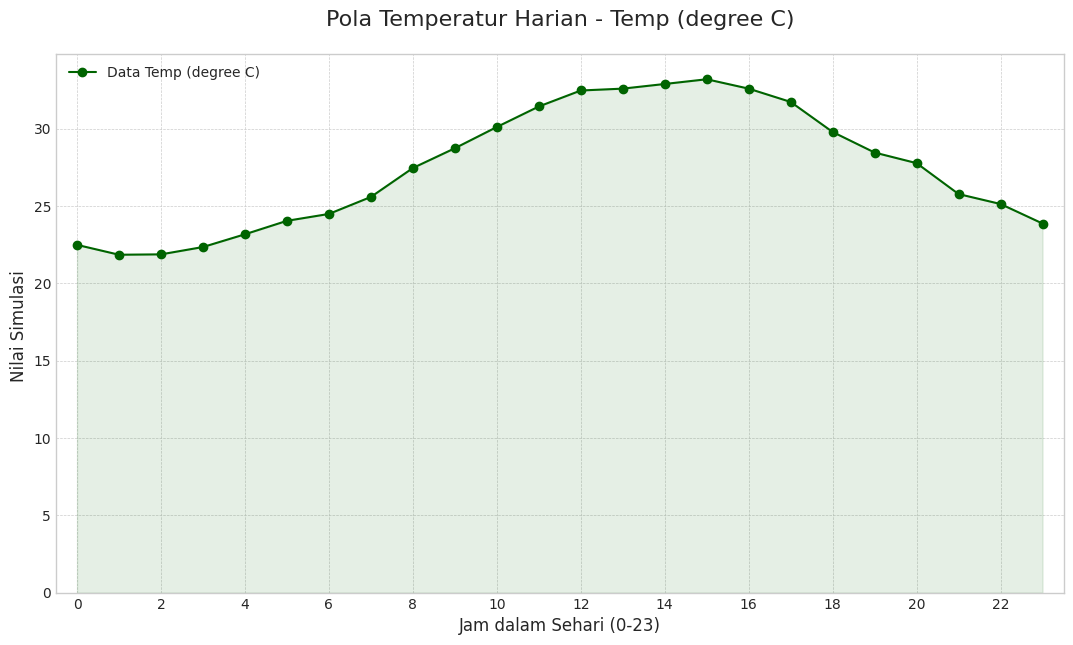

Menampilkan plot untuk 'RH (%)'...


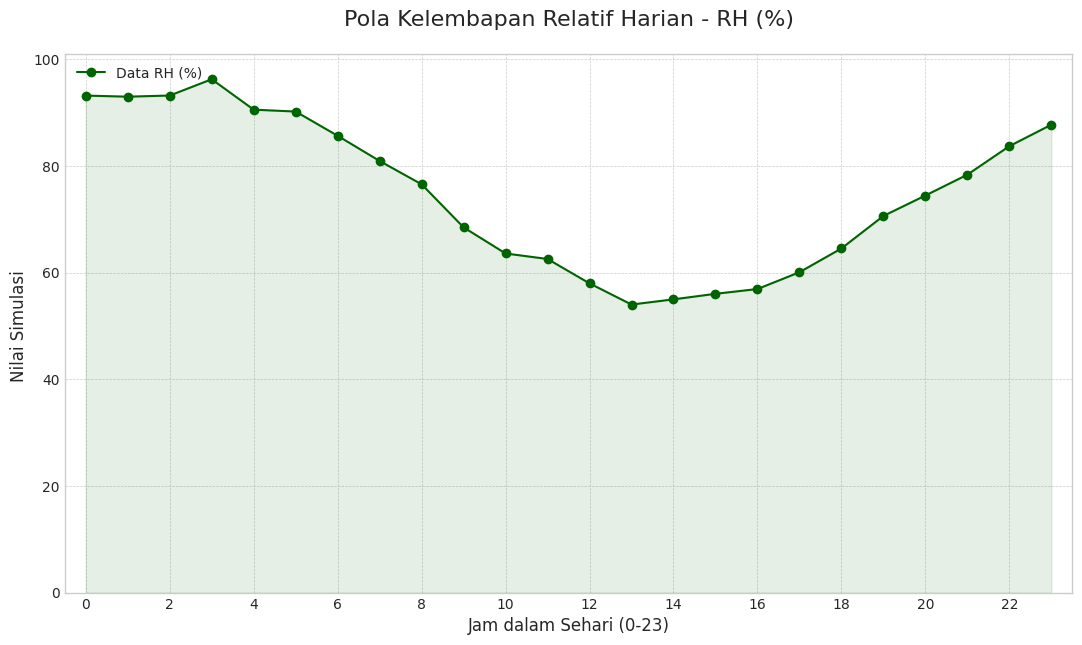

Menampilkan plot untuk 'WS (m/s)'...


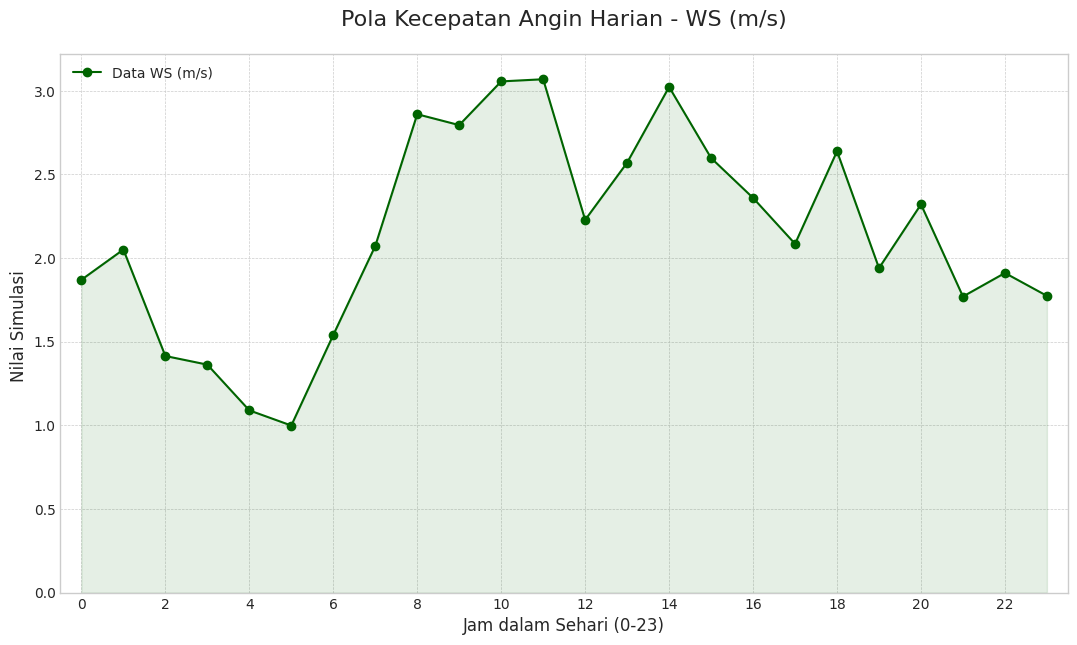

Menampilkan plot untuk 'WD (degree)'...


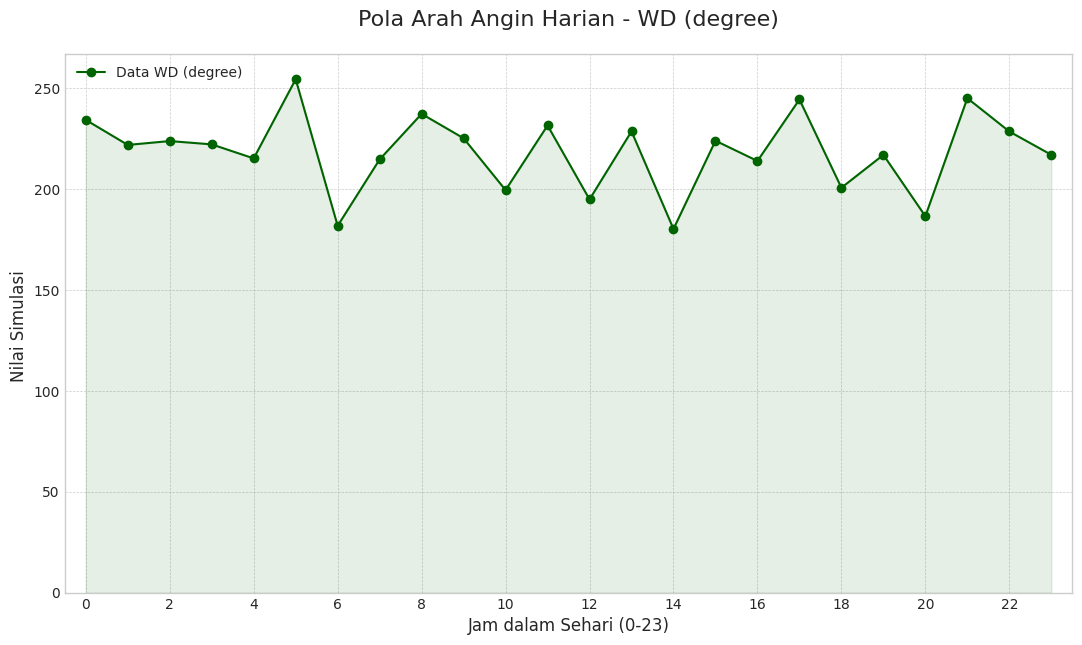

Menampilkan plot untuk 'SR (W/mt2)'...


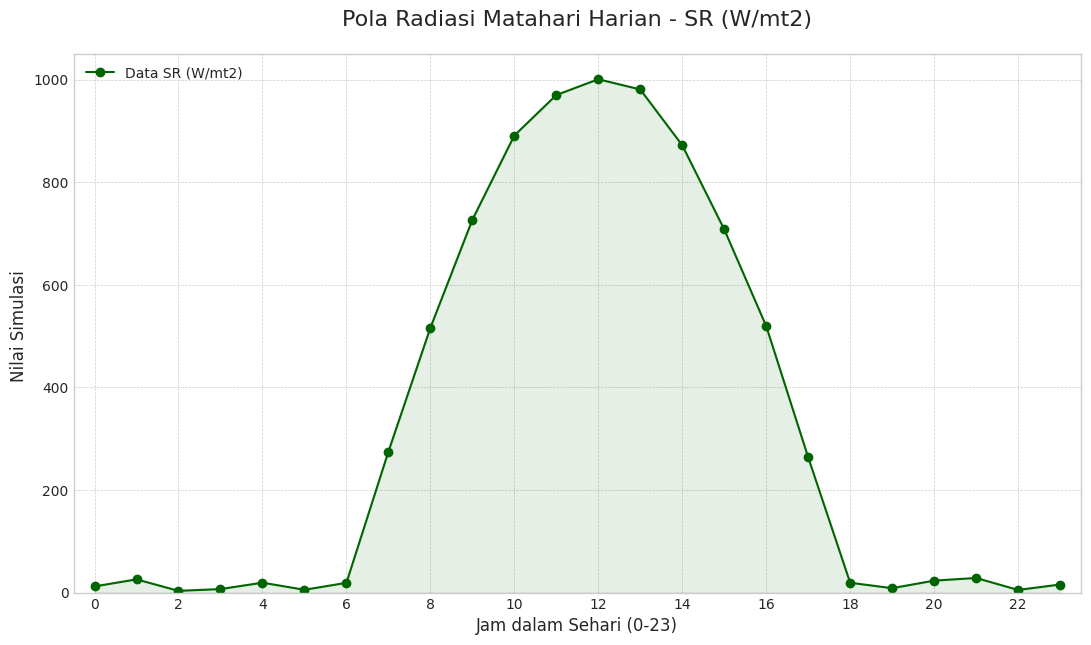

Menampilkan plot untuk 'BP (mmHg)'...


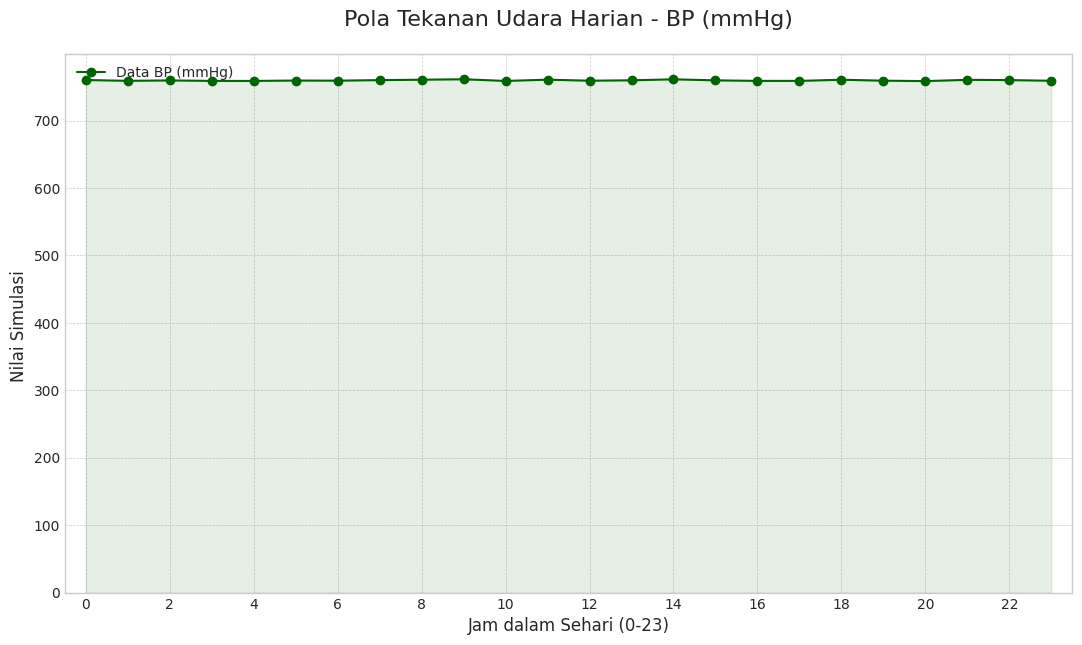

Menampilkan plot untuk 'VWS (m/s)'...


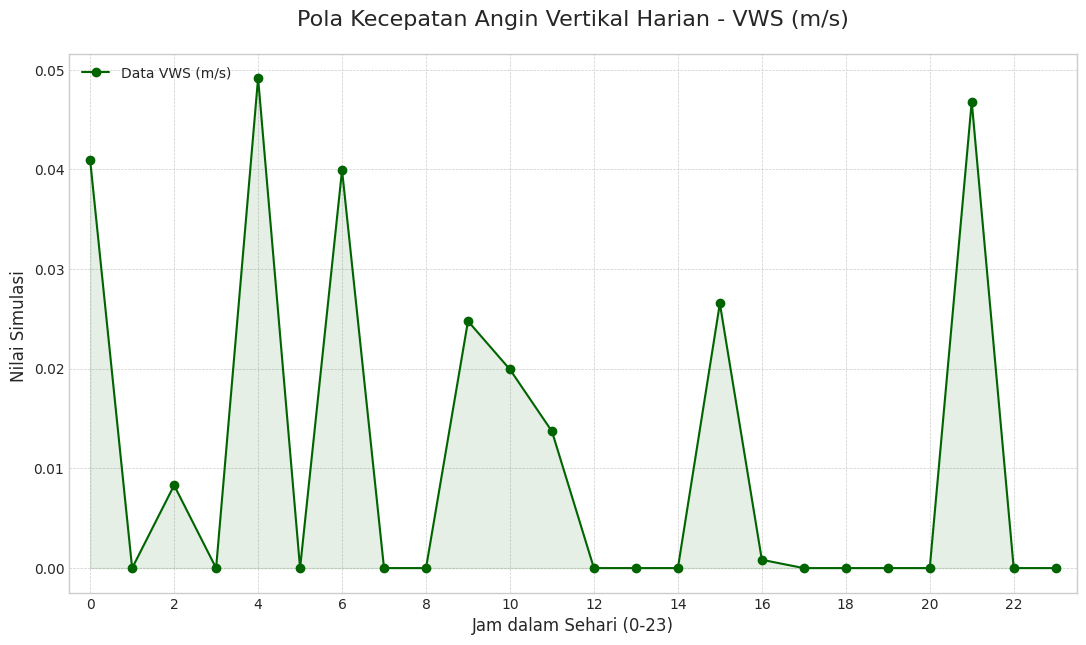

Menampilkan plot untuk 'RF (mm)'...


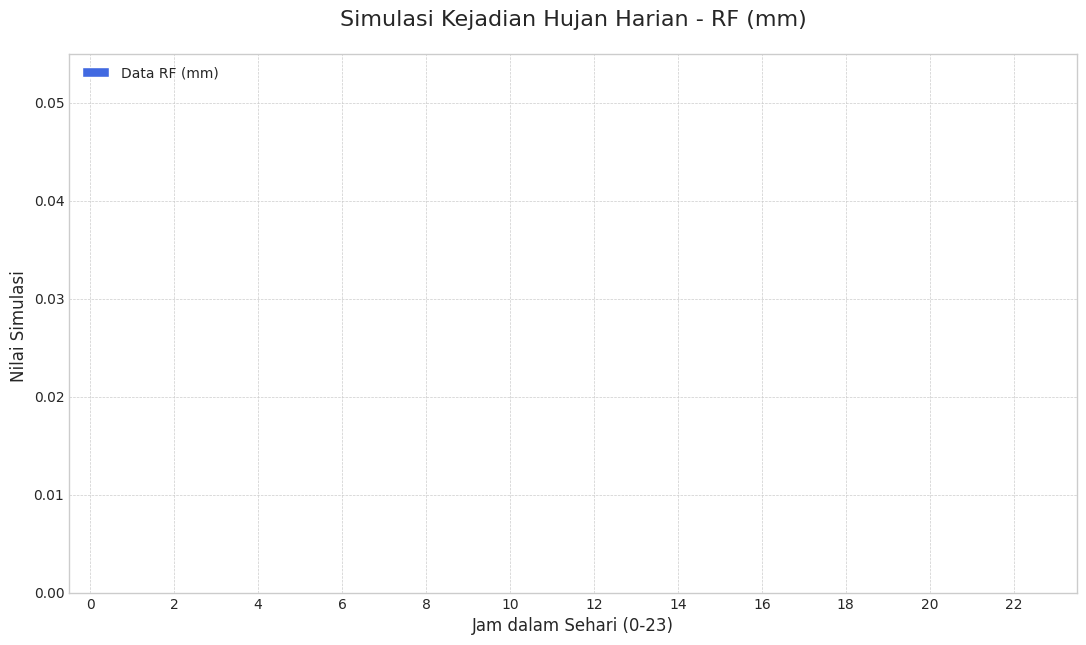


🎉 Selesai! Semua 8 grafik telah ditampilkan.


In [ ]:
def plot_weather_pattern(weather_feature_name):
    try:
        match = re.match(r'(.+?)\s*\((.+)\)', weather_feature_name)
        if match:
            feature_name = match.group(1).strip()
            unit = match.group(2).strip()
        else:
            feature_name = weather_feature_name
            unit = 'N/A'

        display_unit = f'({unit})'
    except Exception:
        feature_name = weather_feature_name
        unit = 'N/A'
        display_unit = ''

    sns.set_style("whitegrid")
    jam = np.arange(24)
    data = np.zeros(24)

    if 'Temp' in feature_name:
        min_temp, max_temp = 22, 33
        amplitude = (max_temp - min_temp) / 2
        baseline = min_temp + amplitude

        data = baseline - amplitude * np.cos(2 * np.pi * (jam - 2) / 24)
        data += np.random.uniform(-0.5, 0.5, 24)
        title = "Pola Temperatur Harian"

    elif 'RH' in feature_name:
        min_rh, max_rh = 55, 95
        amplitude = (max_rh - min_rh) / 2
        baseline = min_rh + amplitude
        data = baseline + amplitude * np.cos(2 * np.pi * (jam - 2) / 24)
        data += np.random.uniform(-2, 2, 24)
        title = "Pola Kelembapan Relatif Harian"

    elif 'SR' in feature_name:
        for i in range(6, 18):
            data[i] = 1000 * np.sin(np.pi * (i - 6) / 12)
        data += np.random.uniform(0, 30, 24)
        data[data < 0] = 0
        title = "Pola Radiasi Matahari Harian"

    elif 'WS' in feature_name and 'VWS' not in feature_name:
        baseline = 1.5 - 0.8 * np.cos(2 * np.pi * (jam - 2) / 24)
        data = baseline + np.random.uniform(0, 1.5, 24)
        title = "Pola Kecepatan Angin Harian"

    elif 'WD' in feature_name:
        prevailing_direction = np.random.uniform(0, 360)
        data = prevailing_direction + np.random.uniform(-45, 45, 24)
        # Menjaga nilai dalam rentang 0-360
        data = data % 360
        title = "Pola Arah Angin Harian"

    elif 'BP' in feature_name:
        data = np.full(24, 760) + np.random.uniform(-1.5, 1.5, 24)
        title = "Pola Tekanan Udara Harian"

    elif 'VWS' in feature_name:
        data = np.random.uniform(-0.05, 0.05, 24)
        title = "Pola Kecepatan Angin Vertikal Harian"

    elif 'RF' in feature_name:
        if np.random.rand() < 0.25:
            start_hour = np.random.randint(0, 22)
            duration = np.random.randint(1, 4)
            intensity = np.random.uniform(1, 15)
            for i in range(duration):
                data[start_hour + i] = np.random.uniform(0, intensity)
        title = "Simulasi Kejadian Hujan Harian"

    data[data < 0] = 0
    if 'VWS' not in feature_name:
        data[data < 0] = 0

    plt.figure(figsize=(13, 7))
    if 'RF' in feature_name:
        plt.bar(jam, data, color='royalblue', label=f'Data {feature_name}')
    else:
        plt.plot(jam, data, marker='o', linestyle='-', color='darkgreen', label=f'Data {feature_name}')
        plt.fill_between(jam, data, color='darkgreen', alpha=0.1)


    plt.title(f'{title} - {feature_name}', fontsize=16, pad=20)
    plt.xlabel('Jam dalam Sehari (0-23)', fontsize=12)
    plt.ylabel(f'Nilai Simulasi {display_unit}', fontsize=12)
    plt.xticks(np.arange(0, 25, 2))
    plt.xlim(-0.5, 23.5)
    if 'VWS' not in feature_name:
        plt.ylim(bottom=0)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(loc='upper left')

    print(f"Menampilkan plot untuk '{feature_name}'...")
    plt.show()

if __name__ == '__main__':
    print("Memulai proses pembuatan grafik fitur cuaca...")

    for feature in weather_features:
        plot_weather_pattern(feature)

    print(f"\n🎉 Selesai! Semua {len(weather_features)} grafik telah ditampilkan.")



* **Radiasi Matahari (SR):** Menunjukkan pola harian yang jelas, dimulai dari matahari terbit sekitar jam 6 pagi, mencapai intensitas puncak sebesar 1000 W/m² pada jam 12 siang, dan kemudian menurun hingga matahari terbenam sekitar jam 6 sore. Ini menandakan hari yang cerah tanpa tutupan awan yang signifikan di siang hari.

* **Suhu (Temp):** Mengikuti pola radiasi matahari, suhu mulai meningkat di pagi hari, dari titik terendah sekitar 22°C, mencapai puncaknya sekitar 33°C pada sore hari (jam 14:00-15:00), dan kemudian berangsur-angsur turun di malam hari.

* **Kelembapan Relatif (RH):** Menunjukkan hubungan terbalik dengan suhu. Kelembapan sangat tinggi di malam dan pagi hari (di atas 90%), dan paling rendah di sore hari (turun hingga sekitar 54%) ketika suhu mencapai puncaknya.

* **Kecepatan Angin (WS):** Angin cenderung lebih tenang di pagi hari, kemudian kecepatannya meningkat secara signifikan mulai sekitar jam 7 pagi dan tetap tinggi sepanjang hari, dengan puncak mencapai lebih dari 3 m/s, sebelum akhirnya melemah kembali di malam hari.

* **Arah Angin (WD):** Arah angin menunjukkan variasi sepanjang hari, umumnya bergerak dalam rentang 180 hingga 250 derajat (arah Selatan hingga Barat Daya).

* **Tekanan Udara (BP):** Tekanan udara tampak sangat stabil sepanjang hari, dengan nilai yang hampir konstan di sekitar 750 mmHg.

* **Kecepatan Angin Vertikal (VWS):** Terdapat beberapa lonjakan kecepatan angin vertikal yang singkat namun signifikan, terutama pada jam 4, 6, 10, 15, dan 21. Di luar waktu-waktu tersebut, pergerakan udara vertikal sangat minim.

* **Kejadian Hujan (RF):** Grafik ini menunjukkan tidak ada curah hujan (0 mm) yang terjadi selama periode simulasi 24 jam.

Kesimulan : Menggambarkan kondisi cuaca untuk hari yang cerah, kering, dan cukup hangat. Pola suhu, kelembapan, dan radiasi matahari sangat khas untuk siklus harian normal tanpa adanya gangguan cuaca seperti hujan.

In [ ]:
print("Mencetak data RF (mm) yang akan diplot:")
print(df['RF (mm)'])

print("\nStatistik data:")
print(df['RF (mm)'].describe())

Mencetak data RF (mm) yang akan diplot:
From Date
2017-09-05 14:00:00    0.00
2017-09-05 15:00:00    0.00
2017-09-05 16:00:00    0.93
2017-09-05 17:00:00    0.00
2017-09-05 18:00:00    0.00
                       ... 
2023-03-31 19:00:00    0.00
2023-03-31 20:00:00    0.00
2023-03-31 21:00:00    0.00
2023-03-31 22:00:00    0.00
2023-03-31 23:00:00    0.00
Name: RF (mm), Length: 48802, dtype: float64

Statistik data:
count    48802.000000
mean         0.037503
std          0.440113
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.200000
Name: RF (mm), dtype: float64


**Grafik hujan itu nol karena datanya memang menunjukkan kalau hujan super jarang terjadi. Lebih dari 75% waktu di data itu kering, jadi wajar kalau simulasi satu harinya juga ikut kering.**

# **Analisis Korelasi Antar Variabel dengan Target**

In [ ]:
# drop AT_5
df = df.drop(columns=['AT_5'])

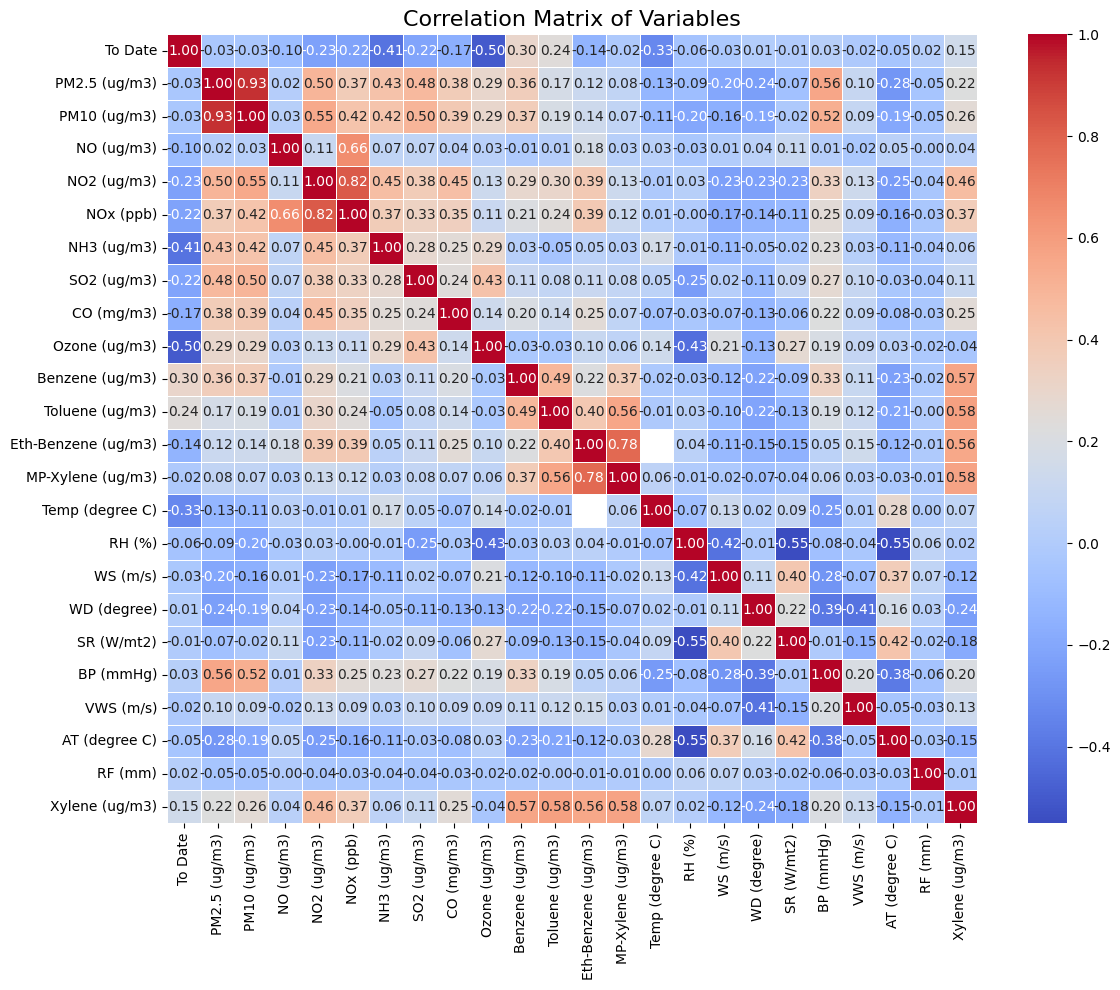


Korelasi variabel lain dengan AT (diurutkan):
AT (degree C)        1.000000
SR (W/mt2)           0.421172
WS (m/s)             0.369179
Temp (degree C)      0.283260
WD (degree)          0.159672
NO (ug/m3)           0.047684
Ozone (ug/m3)        0.034348
MP-Xylene (ug/m3)   -0.028933
RF (mm)             -0.031022
SO2 (ug/m3)         -0.031776
Name: AT (degree C), dtype: float64


In [5]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Melihat korelasi spesifik dengan variabel target 'AT'
print("\nKorelasi variabel lain dengan AT (diurutkan):")
print(df.corr()['AT (degree C)'].sort_values(ascending=False).head(10))

Dari hasil korelasi, variabel yang paling berpengaruh terhadap suhu udara (AT) adalah **radiasi matahari (SR)** dan **kecepatan angin (WS)**, yang menunjukkan hubungan positif cukup kuat. Ini masuk akal karena sinar matahari meningkatkan suhu, dan angin dapat mendistribusikan panas di udara. **Suhu dari sensor lain (Temp)** juga punya pengaruh sedang, mungkin mencerminkan suhu dari lokasi berbeda namun masih dalam sistem yang sama. Variabel seperti **arah angin (WD)**, **NO**, dan **Ozone** hanya menunjukkan hubungan lemah, sedangkan **MP-Xylene, RF, dan SO2** memiliki korelasi negatif sangat rendah—menandakan bahwa faktor-faktor ini tidak terlalu berperan dalam perubahan suhu udara dalam konteks data ini. Secara keseluruhan, AT lebih dipengaruhi oleh faktor lingkungan langsung seperti cahaya matahari dan angin, bukan oleh polutan atau curah hujan.


# **Analisis Autokorelasi (ACF & PACF) untuk Menentukan Window Size**


Analisis ACF dan PACF untuk menentukan 'memori' data...


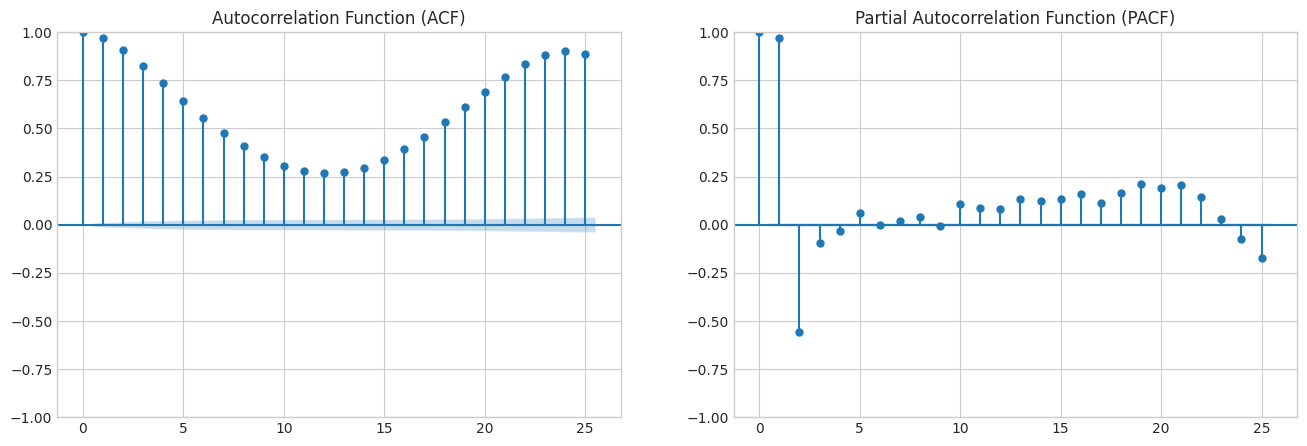

In [ ]:
# Kita ingin tahu seberapa jauh ke belakang data masih relevan.
print("\nAnalisis ACF dan PACF untuk menentukan 'memori' data...")
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
# Plot ACF: Menunjukkan korelasi dengan lag sebelumnya
plot_acf(df['AT (degree C)'], lags=25, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)')
axes[0].grid(True)
# Plot PACF: Menunjukkan korelasi langsung dengan lag sebelumnya
plot_pacf(df['AT (degree C)'], lags=25, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)')
axes[1].grid(True)
plt.show()

**Windows optimal: Sekitar 24 jam (1 hari)**
Karena **ACF menunjukkan pola periodik** yang naik-turun setiap **24 lag**, ini mengindikasikan adanya **pola harian**. Artinya, menggunakan **window = 24 jam** akan membantu model menangkap **memori musiman harian** dari data.

**Horizon prediksi yang masuk akal: 3–6 jam ke depan**
Karena **PACF menunjukkan pengaruh paling kuat pada lag-1 sampai lag-2**, artinya **prediksi jangka pendek lebih akurat**. Jika terlalu jauh ke depan (misal **>12 jam**), pengaruh data sebelumnya makin kecil.


**Plot ACF dan PACF secara statistik mendukung penggunaan window size 5:** cukup untuk menangkap pengaruh jangka pendek (lag 1–2) sekaligus mengamati arah tren dalam beberapa jam terakhir. Ini menjadikan time_steps = 5 sebagai pilihan yang seimbang dan masuk akal untuk model prediksi suhu berbasis time series.

# **Bagian b: Preprocessing**

# **Splitting Data**

In [ ]:
# Hitung titik potong untuk pembagian data
n = len(df)
train_split_point = int(n * 0.8)
val_split_point = int(n * 0.9)

# Lakukan pembagian berdasarkan urutan waktu (sangat penting untuk time series)
train_df = df.iloc[0:train_split_point]
val_df = df.iloc[train_split_point:val_split_point]
test_df = df.iloc[val_split_point:]

# Cetak ukuran setiap set untuk verifikasi
print(f"Ukuran data latih (train_df):   {train_df.shape}")
print(f"Ukuran data validasi (val_df): {val_df.shape}")
print(f"Ukuran data uji (test_df):     {test_df.shape}")



Ukuran data latih (train_df):   (39041, 24)
Ukuran data validasi (val_df): (4880, 24)
Ukuran data uji (test_df):     (4881, 24)


# **Scalling**

In [ ]:
scaler = MinMaxScaler()
numeric_cols = train_df.select_dtypes(include=np.number).columns
train_scaled_np = scaler.fit_transform(train_df[numeric_cols])

Scaler 'belajar' dari data latih...


In [ ]:
print("Scaler 'mengubah' data validasi dan uji...")
val_scaled_np = scaler.transform(val_df[numeric_cols])
test_scaled_np = scaler.transform(test_df[numeric_cols])

Scaler 'mengubah' data validasi dan uji...


In [ ]:
def create_sequences(data, target_column_index, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        # Slice the data to get the input sequence (features for the window)
        X.append(data[i : (i + window_size)])
        # Get the target value at the next time step
        y.append(data[i + window_size, target_column_index])

    return np.array(X), np.array(y).reshape(-1, 1)

# Assuming train_scaled_np, val_scaled_np, test_scaled_np are your scaled data splits
# And numeric_cols is the list of column names after scaling

# Get the index of the target column ('AT (degree C)') in the scaled numeric data
target_col_index_scaled = numeric_cols.tolist().index(target_column)

window_size = 5 # Define your window size here

# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_scaled_np, target_col_index_scaled, window_size)
X_val, y_val = create_sequences(val_scaled_np, target_col_index_scaled, window_size)
X_test, y_test = create_sequences(test_scaled_np, target_col_index_scaled, window_size)

print("Dataset windowing berhasil dibuat.")
print(f"Bentuk X_train: {X_train.shape}, Bentuk y_train: {y_train.shape}")
print(f"Bentuk X_val: {X_val.shape}, Bentuk y_val: {y_val.shape}")
print(f"Bentuk X_test: {X_test.shape}, Bentuk y_test: {y_test.shape}")

Dataset windowing berhasil dibuat.
Bentuk X_train: (39036, 5, 23), Bentuk y_train: (39036, 1)
Bentuk X_val: (4875, 5, 23), Bentuk y_val: (4875, 1)
Bentuk X_test: (4876, 5, 23), Bentuk y_test: (4876, 1)


# **Bagian c- Model LSTM**

**Membangun model LSTM dengan hidden size 10 , dan regressor single layer dengan fungsi aktivasi linear .**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Mendapatkan bentuk input untuk model setelah dropping the column
input_shape = (X_train.shape[1], X_train.shape[2]) # (window_size, num_features)

# Model Baseline
model_baseline = Sequential([
    LSTM(10, input_shape=input_shape),
    Dense(1, activation='linear')
])

model_baseline.compile(optimizer='adam', loss='mean_squared_error')
model_baseline.summary()

# Callback untuk menghentikan training jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Melatih model
history_baseline = model_baseline.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         1,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,371 (5.36 KB)

 Trainable params: 1,371 (5.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0245 - val_loss: 0.0020
Epoch 2/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0014 - val_loss: 9.9614e-04
Epoch 3/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 8.9937e-04 - val_loss: 7.7629e-04
Epoch 4/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 7.2153e-04 - val_loss: 5.6940e-04
Epoch 5/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 6.0976e-04 - val_loss: 4.7923e-04
Epoch 6/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 5.6570e-04 - val_loss: 4.4259e-04
Epoch 7/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 5.0633e-04 - val_loss: 4.0255e-04
Epoch 8/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 4.7508e-04 - val_loss: 3.8113e-04
Epoch 9/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.5757e-04 - val_loss: 3.6387e-04
Epoch 10/100
1220/1220 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 4.3961e-04 - val_loss: 3.5463e-04
Epoch 11/100
1220/1220 ━━━━━━━━━━━━━

| Komponen        | Implementasi            | Catatan                                                                |
| --------------- | ----------------------- | ---------------------------------------------------------------------- |
| **LSTM Layer**  | Hidden size 10          | Cukup untuk menangkap pola jangka pendek seperti yang terlihat di PACF |
| **Dense Layer** | 1 unit, aktivasi linear | Aktivasi linear cocok untuk prediksi nilai kontinu                     |
| **Output**      | `(None, 1)`             | Menghasilkan satu nilai prediksi untuk satu time step ke depan         |


# **Bagian d : Model Modifikasi**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

input_shape = (X_train.shape[1], X_train.shape[2]) # (window_size, num_features)

# Model Modifikasi
model_modified = Sequential([
    LSTM(50, return_sequences=True, input_shape=input_shape),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model_modified.compile(optimizer='adam', loss='mean_squared_error')
model_modified.summary()

# Melatih model modifikasi
history_modified = model_modified.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5, 50)          │        14,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,051 (136.92 KB)

 Trainable params: 35,051 (136.92 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.0165 - val_loss: 0.0019
Epoch 2/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0033 - val_loss: 0.0012
Epoch 3/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0025 - val_loss: 9.2273e-04
Epoch 4/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0020 - val_loss: 7.1878e-04
Epoch 5/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0015 - val_loss: 8.1575e-04
Epoch 6/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0013 - val_loss: 5.7405e-04
Epoch 7/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 9.9945e-04 - val_loss: 6.8260e-04
Epoch 8/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 8.3819e-04 - val_loss: 5.6350e-04
Epoch 9/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 7.6540e-04 - val_loss: 4.5256e-04
Epoch 10/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 6.9237e-04 - val_loss: 4.0545e-04
Epoch 11/100
610/610 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 6.4938e-04 - val_l

| Layer       | Output Shape    | Parameter | Fungsi                                                                                                                                                                      |
| ----------- | --------------- | --------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **LSTM #1** | `(None, 5, 50)` | 14,800    | Menangkap **pola jangka pendek** dari input deret waktu. `return_sequences=True` agar output tiap langkah waktu dikirim ke LSTM berikutnya.                                 |
| **Dropout** | `(None, 5, 50)` | 0         | **Mencegah overfitting** dengan cara menghilangkan beberapa neuron secara acak saat training.                                                                               |
| **LSTM #2** | `(None, 50)`    | 20,200    | Menyaring informasi dari LSTM sebelumnya untuk menangkap **pola jangka menengah** dan menghasilkan representasi akhir dari sequence.                                        |
| **Dropout** | `(None, 50)`    | 0         | Regularisasi tambahan setelah LSTM kedua. Membantu meningkatkan **generalisasi model**.                                                                                     |
| **Dense**   | `(None, 1)`     | 51        | Layer output untuk **regresi**, menghasilkan prediksi akhir (misalnya suhu pada jam berikutnya). Secara default menggunakan **aktivasi linear**, cocok untuk nilai kontinu. |


# **Bagian e: Evaluasi MAE, MSE, R2**

153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
--- Hasil Evaluasi untuk Model Baseline ---
Mean Absolute Error (MAE): 0.4769
Mean Squared Error (MSE): 0.4385
R-squared (R²) Score: 0.9378
Mean Absolute Percentage Error (MAPE): 1.54%
--------------------------------------------------

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
--- Hasil Evaluasi untuk Model Modifikasi ---
Mean Absolute Error (MAE): 0.4410
Mean Squared Error (MSE): 0.3540
R-squared (R²) Score: 0.9498
Mean Absolute Percentage Error (MAPE): 1.42%
--------------------------------------------------



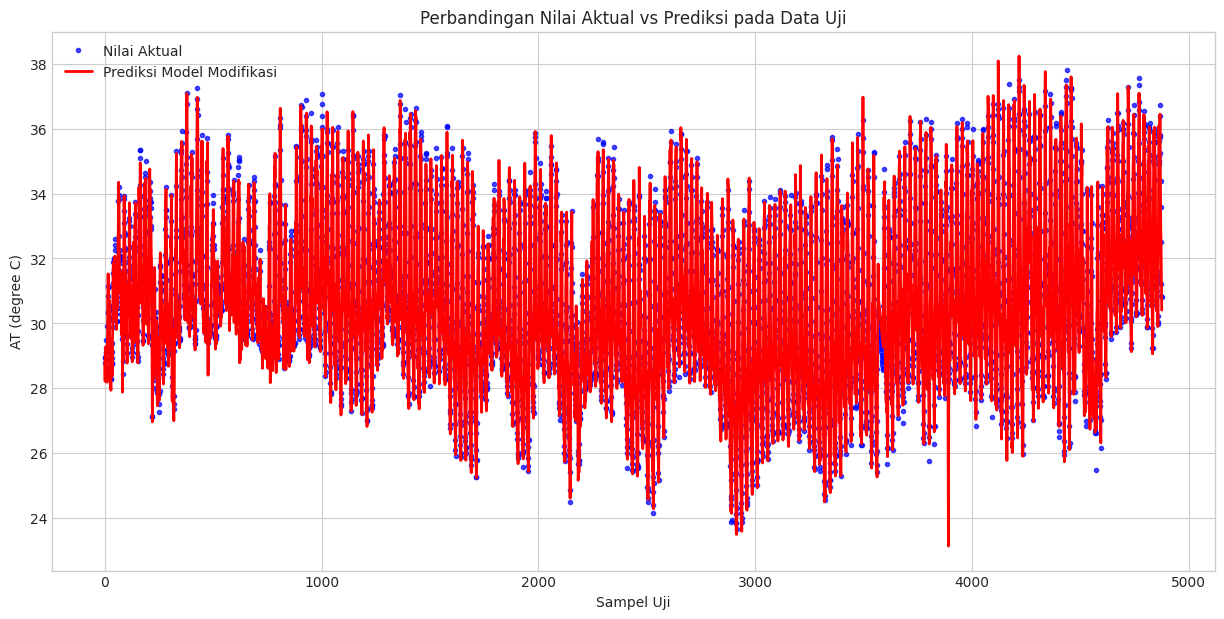

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
def evaluate_model(model, X_test, y_test, scaler, model_name, feature_cols, target_col_name):
    y_pred_scaled = model.predict(X_test)

    dummy_pred = np.zeros((len(y_pred_scaled), len(feature_cols)))

    try:
        target_idx = feature_cols.tolist().index(target_col_name)
    except AttributeError:
        target_idx = feature_cols.index(target_col_name)

    dummy_pred[:, target_idx] = y_pred_scaled.flatten()
    y_pred_actual = scaler.inverse_transform(dummy_pred)[:, target_idx]

    dummy_true = np.zeros((len(y_test), len(feature_cols)))
    dummy_true[:, target_idx] = y_test.flatten()
    y_true_actual = scaler.inverse_transform(dummy_true)[:, target_idx]


    mae = mean_absolute_error(y_true_actual, y_pred_actual)
    mse = mean_squared_error(y_true_actual, y_pred_actual)
    r2 = r2_score(y_true_actual, y_pred_actual)
    mape = mean_absolute_percentage_error(y_true_actual, y_pred_actual)

    # Tampilkan semua hasil evaluasi
    print(f"--- Hasil Evaluasi untuk {model_name} ---")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R²) Score: {r2:.4f}")
    # Tampilkan hasil MAPE dalam format persentase
    print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")
    print("-" * 50 + "\n")

    return y_true_actual, y_pred_actual


true_values_baseline, preds_baseline = evaluate_model(model_baseline, X_test, y_test, scaler, "Model Baseline", numeric_cols, target_column)
true_values_modified, preds_modified = evaluate_model(model_modified, X_test, y_test, scaler, "Model Modifikasi", numeric_cols, target_column)

plt.figure(figsize=(15, 7))
plt.plot(true_values_modified, label='Nilai Aktual', color='blue', marker='.', linestyle='None', alpha=0.7)
plt.plot(preds_modified, label='Prediksi Model Modifikasi', color='red', linewidth=2)
plt.title('Perbandingan Nilai Aktual vs Prediksi pada Data Uji')
plt.xlabel('Sampel Uji')
plt.ylabel('AT (degree C)')
plt.legend()
plt.grid(True)
plt.show()

| Metrik       | Model Baseline | Model Modifikasi |
| ------------ | -------------- | ---------------- |
| **MAE**      | 0.4769         | **0.4410**      |
| **MSE**      | 0.4385         | **0.3540**      |
| **R² Score** | 0.9378         | **0.9498**      |
| **MAPE**     | 1.54%          | **1.42%**       |


**Model Modifikasi punya performa lebih baik dari Model Baseline pada semua metrik evaluasi**. Artinya, **Model Modifikasi mampu memberikan prediksi suhu udara (AT) yang lebih akurat dan stabil**. **Penurunan MSE** dan **peningkatan R²** menunjukkan bahwa model ini **lebih baik dalam menangkap pola dalam data**, sementara **penurunan MAE dan MAPE** menunjukkan **kesalahan rata-rata yang lebih kecil**.


**Garis merah (Prediksi Model Modifikasi)** terlihat mengikuti pola umum dari **titik-titik biru (Nilai Aktual)**, menunjukkan bahwa secara keseluruhan **model mampu menangkap tren musiman dalam data suhu dengan cukup baik**. **Pola naik-turun harian dan perubahan periodik berhasil direkonstruksi**, meskipun masih terdapat beberapa **outlier atau deviasi tajam** yang kemungkinan disebabkan oleh **noise**, **data ekstrem**, atau **kondisi cuaca yang tidak berhasil ditangkap oleh model**. Hal ini masih dapat diperbaiki melalui proses **tuning lanjutan** atau **teknik post-processing tambahan**.


***Plot Baseline Loss***

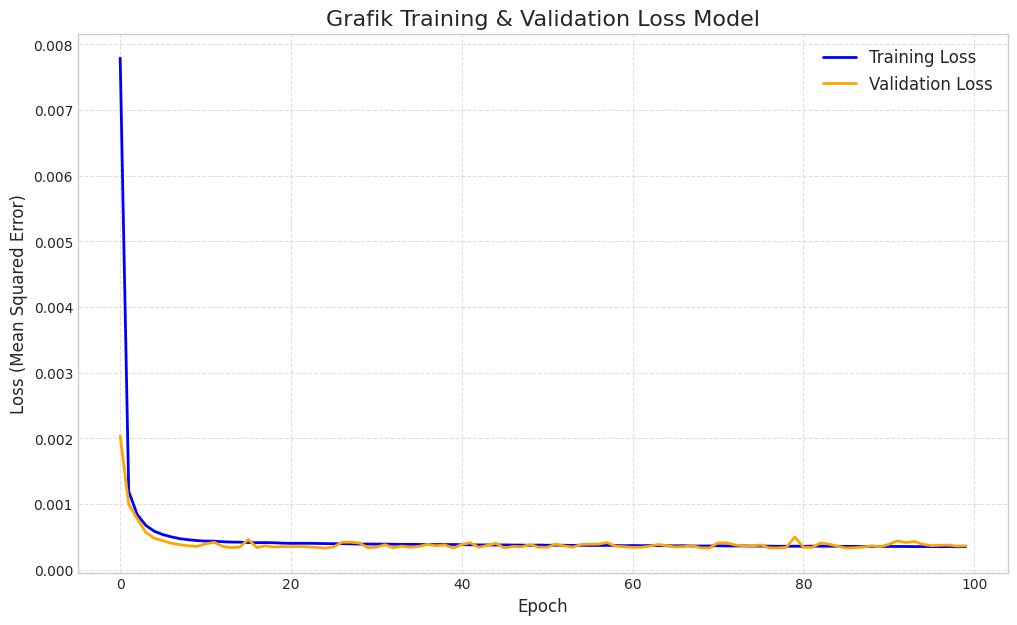

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(history_baseline.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_baseline.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Grafik Training & Validation Loss Model', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

***Plot Modified Loss***

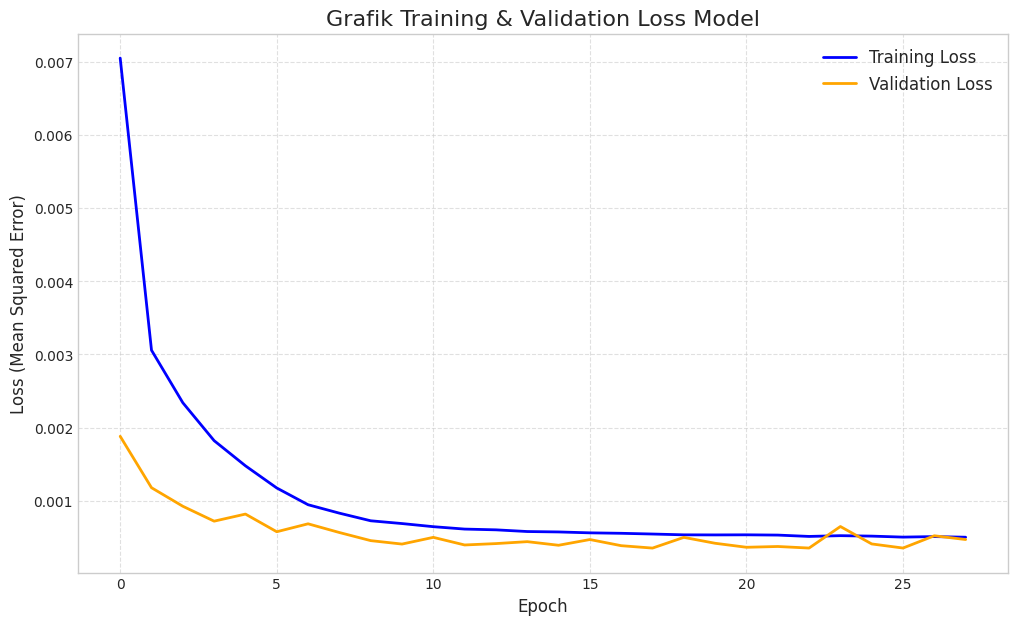

In [ ]:
plt.figure(figsize=(12, 7))

plt.plot(history_modified.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history_modified.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)

plt.title('Grafik Training & Validation Loss Model', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

- Loss pada model ini sangat kecil, cepat turun, dan stabil — menunjukkan proses pelatihan yang efisien dan efektif.

- Model tidak overfit, dan validasi loss mendekati training loss, yang berarti kemampuan generalisasi model sangat baik.

- Dengan loss serendah ini, model dapat dianggap sangat andal untuk prediksi suhu (AT) secara kontinu.

# **Bagian g : Pertanyaan Bonus**

**Jawaban Pertanyaan Bonus:**

Iya, problem ini sangat mungkin diselesaikan dengan pendekatan multivariate time series.

**Kenapa?**
1. **Terdapat Kolom Waktu:**
   Data memiliki kolom **From Date** dan **To Date** yang berurutan tiap jam, menandakan bahwa ini adalah **data time series** (berbasis waktu).

2. **Lebih dari Satu Variabel Input:**
   Dataset memiliki banyak fitur seperti PM2.5, PM10, NO, NO2, CO, suhu, kelembaban (RH), kecepatan angin (WS), dll. Artinya, ini merupakan multivariate karena ada banyak variabel yang bisa digunakan bersama-sama untuk memprediksi sesuatu.

3. **Target Jelas (AT – Air Temperature):**
   Jika kita ingin memprediksi variabel seperti AT (Air Temperature) berdasarkan variabel lainnya dalam urutan waktu, maka ini adalah masalah multivariate time series forecasting.

4. **Korelasi antar fitur:**
   Fitur-fitur seperti suhu, kelembaban, polutan udara, dan radiasi matahari (SR) biasanya saling memengaruhi, yang membuat pendekatan multivariate lebih cocok dibanding univariate.

Masalah ini **merupakan multivariate time series** karena data bersifat deret waktu dan memiliki **banyak variabel yang saling berkaitan**.